# Исследование авторынка Казахстана


## Автор исследования

Солнцева Наталья

## Описание проекта

**Заказчик исследования:** исследовательский pet-проект

**Объект исследования:**  данные по продажам автомобилей в Казахстане за 2019 год, содержащие сведения о месяце и сумме продажи автомобиля, характеристики проданного автомобиля в разрезе диллеров

**Цели исследования:** выявление тенденций авторынка Казахстана по состоянию на 2019 год

**Задачи, которые должны быть решены в ходе исследования:**
- Загрузка данных из источника 
- Предобработка данных:
    - Проверка наименований столбцов датасета и при необходимости их переименование 
    - Анализ пропусков в столбцах датасета, оценка возможности их заполнения 
    - Проверка корректности типов данных, их изменение при необходимости 
    - Проверка дубликатов в датасете (полных и неявных) и при необходимости их удаление 
    - Проверка на корреткность и аномалии значений количественных и качетсвенных параметров датасета 
- Проведение исследовательского анализа данныз (EDA):
    - Предварительная подготовка данных для исследования, добавление новых столбцов датасета при необходимости 
    - Исследование количественных параметров - базовые статистические параметры, гистограмма, проверка аномалий и выбросов в значениях 
    - Исследование качественных параметров - частота значений параметров 
    - При необходимости удаление выбросов и аномалий в данных 
    - Общий анализ авторынка Казахстана - топ самых продаваемых марок, динамика продаж,  
    - Операционные показатели в сравнении между отстающим диллером и лидерами
- Формулирование ключевых результатов исследования по тенденциям авторынка Казахстана

## Импорт библиотек для проекта и загрузка данных

In [1]:
import pandas as pd

# библиотеки для построения графиков
#!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns

# библиотеки для работы с математическими операциями
import math
import numpy as np

# уберем ограничения при выводе таблиц на экран, чтобы было удобней оценивать выборки по аномалиям

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', 1000)
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)
# Сброс ограничений на количество элементов в списке
pd.set_option('display.max_seq_items', None)

# отключаем вывод всех предупреждений
import warnings
warnings.filterwarnings("ignore")

Загрузим файл с данными в датасет

In [2]:
try:
    df_auto = pd.read_csv('kz_2019_final_all_dirt.csv', index_col=0)
    print('Загрузка данных из локального диска')
except FileNotFoundError:
    df_auto = pd.read_csv('kz_2019_final_all_dirt.csv', index_col=0)
    print('Загрузка данных из альтернативного каталога')

Загрузка данных из локального диска


Получим общую инфу о датасете


In [3]:
df_auto.head()

Год Месяц     Компания Бренд Модель      Модификация Год выпуска  \
0  2019  Март  Mercur Auto  Audi     A3     Audi A3 TFSI        2017   
1  2019   Май  Mercur Auto  Audi     A3             TFSI        2018   
2  2019  Июнь  Mercur Auto  Audi     A3             TFSI        2018   
3  2019  Июль  Mercur Auto  Audi     A3             TFSI        2017   
4  2019  Июль  Mercur Auto  Audi     A4  A4 Allroad TFSI        2017   

  Страна-производитель Вид топлива Объём двиг, л, Коробка передач Тип привода  \
0             Германия      Бензин            1.4        S-tronic         NaN   
1             Германия      Бензин            1.4        S-Тronic         FWD   
2             Германия      Бензин            1.4         S-Тroic         FWD   
3             Германия      Бензин            1.4         S-troic    передний   
4             Германия      Бензин              2         S-troic     quattro   

                       Сегмент  Регион Наименование дилерского центра  \
0  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
1  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
2  Легковые автомобили Premium  Алматы             Mercur Auto Астана   
3  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
4  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   

  Тип клиента Форма расчета  Количество     Цена, USD  Продажа, USD   Область  \
0   Физ. Лицо   безналичный         1.0  31250.000000  31250.000000  г.Алматы   
1   Физ. Лицо      наличный         1.0  30581.000000  30581.000000  г.Алматы   
2   Физ. Лицо      наличный         1.0  35087.719000  35087.719000  г.Алматы   
3   Физ. Лицо      наличный         1.0  26608.232900  26608.232900  г.Алматы   
4    Юр. Лицо   безналичный         1.0  48343.982648  48343.982648  г.Алматы   

       Сегментация 2013 Класс 2013 Сегментация Eng Локализация производства  
0  Легковые автомобили    C класс                C                   Импорт  
1  Легковые автомобили    C класс                C                   Импорт  
2  Легковые автомобили    C класс                C                   Импорт  
3  Легковые автомобили    C класс                C                   Импорт  
4  Легковые автомобили    D класс                D                   Импорт

In [4]:
# поучим общую инфу о датасете
print(df_auto.info())
print(df_auto.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             32854 non-null  int64  
 1   Месяц                           32854 non-null  object 
 2   Компания                        32854 non-null  object 
 3   Бренд                           32854 non-null  object 
 4   Модель                          32854 non-null  object 
 5   Модификация                     29729 non-null  object 
 6   Год выпуска                     32700 non-null  object 
 7   Страна-производитель            32854 non-null  object 
 8   Вид топлива                     31942 non-null  object 
 9   Объём двиг, л,                  30968 non-null  object 
 10  Коробка передач                 31662 non-null  object 
 11  Тип привода                     30589 non-null  object 
 12  Сегмент                         

Датасет содержит 32854 строк и 25 столбцов

In [5]:
# сохраним исходный размер датасета в отдельной переменной 
shape_init = df_auto.shape

## Предобработка данных

### Переименование столбцов

Название столбцов содержат русское обозначение, не будет менять его на англиское в "змеином" стиле, посольку это не мешает анализу и никак его не ускорит. Изменим только те названия, которые содержат запятые и пробелы

In [6]:
# сохраним список названий столбцов в отдельный список
col_name = df_auto.columns.tolist()
#col_name

In [7]:
# сохраним в новый список измененные названия столбцов
col_name_new = []
for i in col_name:
    i = i.replace(',', '')
    i = i.replace(' ', '_')
    i = i.lower()
    col_name_new.append(i)
col_name_new

['год',
 'месяц',
 'компания',
 'бренд',
 'модель',
 'модификация',
 'год_выпуска',
 'страна-производитель',
 'вид_топлива',
 'объём_двиг_л',
 'коробка_передач',
 'тип_привода',
 'сегмент',
 'регион',
 'наименование_дилерского_центра',
 'тип_клиента',
 'форма_расчета',
 'количество',
 'цена_usd',
 'продажа_usd',
 'область',
 'сегментация_2013',
 'класс_2013',
 'сегментация_eng',
 'локализация_производства']

In [8]:
change_col_dict = {k:v for k, v in zip(col_name, col_name_new)}

df_auto.rename(columns=change_col_dict, inplace = True)

In [9]:
df_auto.head(1)

год месяц     компания бренд модель   модификация год_выпуска  \
0  2019  Март  Mercur Auto  Audi     A3  Audi A3 TFSI        2017   

  страна-производитель вид_топлива объём_двиг_л коробка_передач тип_привода  \
0             Германия      Бензин          1.4        S-tronic         NaN   

                       сегмент  регион наименование_дилерского_центра  \
0  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   

  тип_клиента форма_расчета  количество  цена_usd  продажа_usd   область  \
0   Физ. Лицо   безналичный         1.0   31250.0      31250.0  г.Алматы   

       сегментация_2013 класс_2013 сегментация_eng локализация_производства  
0  Легковые автомобили    C класс                C                   Импорт

### Анализ пропусков

Проверим колчиество пропущенных значений

In [10]:
# функция по выводу графика с процентами наличия пропусков

def check_pass_value_percent_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh',
                  figsize = (20,5),
                  legend = False,
                  fontsize = 16,
                  color = '#DDA0DD', xlabel='Название столбца', ylabel='Процент пропусков')
            .set_title('Процент пропусков от общего числа значений \n', fontsize = 21, color = '#DA70D6')

        );
    except:
        print('пропусков не осталось!')

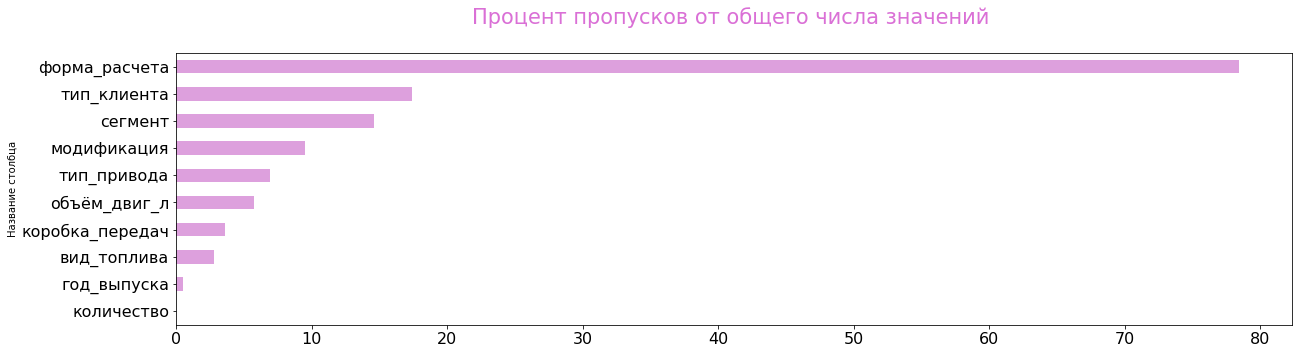

In [11]:
# выведем график пропусков
check_pass_value_percent_barh(df_auto)

In [12]:
df_auto.isnull().sum()

год                                   0
месяц                                 0
компания                              0
бренд                                 0
модель                                0
модификация                        3125
год_выпуска                         154
страна-производитель                  0
вид_топлива                         912
объём_двиг_л                       1886
коробка_передач                    1192
тип_привода                        2265
сегмент                            4788
регион                                0
наименование_дилерского_центра        0
тип_клиента                        5730
форма_расчета                     25775
количество                            5
цена_usd                              0
продажа_usd                           0
область                               0
сегментация_2013                      0
класс_2013                            0
сегментация_eng                       0
локализация_производства              0


В Форме рассчета потчи 80% пропусков - этот столбец можно удалить. Процент пропуска в остальных столбцах небольшой, поэтому пока оставим их и что с ними делать дальше решим в ходе анализа  

In [13]:
df_auto.drop('форма_расчета', axis=1, inplace=True)

In [14]:
#df_auto.head(1)

### Анализ значений в столбцах

Перед заменой типов посмотрим на перечень уникальных значений в столбцах, за исключением столбцов Цена USD и Продажа USD

In [15]:
# выведем перечень уникальных значений для категоориальных столбцов с типом object
for i in df_auto.columns:
    if df_auto[i].dtype == 'object':
        display(i)
        try:
            display(df_auto[i].sort_values().unique())
        except:
            display(df_auto[i].unique())

'месяц'

array(['Август', 'Апрель', 'Июль', 'Июнь', 'Май', 'Март', 'Сентябрь',
       'Февраль', 'Январь'], dtype=object)

'компания'

array(['Allur Auto', 'Astana Motors', 'Autokapital', 'Caspian Motors',
       'Daewoo Bus Kazakhstan', 'Eurasia Motor Premium',
       'Hino Motors Kazakhstan', 'Hyundai Com Trans Kazakhstan ',
       'Jaguar Land Rover', 'MAN Truck & Bus Kazakhstan', 'MMC RUS',
       'Mercur Auto', 'Nissan Manufacturing RUS', 'Renault Россия', 'SMC',
       'Scandinavian Motors', 'Scania Central Asia',
       'Sivi Finance Consulting', 'Subaru Kazakhstan',
       'Toyota Motor Kazakhstan', 'Автомир ГК', 'Автоцентр-Бавария',
       'Алматы АТО', 'БИПЭК АВТО', 'Вираж', 'Каспиан Моторс',
       'Лифан Моторс Рус', 'ММС Рус', 'СВС', 'СВС-ТРАНС', 'СемАЗ',
       'ТК КАМАЗ', 'ТК Рос-Авто', 'УзАвто-Казахстан',
       'Хино Моторс Казахстан'], dtype=object)

'бренд'

array(['ANKAI', 'Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Daewoo', 'Ford',
       'Foton', 'GAZ', 'Hino', 'Hyundai', 'Hyundai Truck & Bus',
       'Infiniti', 'Isuzu', 'Iveco', 'Jac', 'Jaguar', 'KAMAZ', 'Kia',
       'Lada', 'Land Rover', 'Lexus', 'Lifan', 'MAN', 'Mazda',
       'Mercedes-Benz', 'Mercedes-Benz Trucks', 'Mini', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Porsche', 'Ravon', 'Renault', 'Rolls Royce',
       'Scania', 'Shacman', 'Skoda', 'SsangYong', 'Subaru', 'Suzuki',
       'Toyota', 'UAZ', 'Volkswagen', 'Volvo', 'МАЗ', 'Урал'],
      dtype=object)

'модель'

array(['1 серия', '2 серия', '2206', '2217', '2310', '2360', '2705',
       '2752', '3', '3 серия', '300', '3008', '301', '3151', '3221',
       '3302', '3303', '3308', '3309', '3741', '3909', '3962', '4 серия',
       '4308', '43114', '43118', '4320', '4320-1951-60', '43206-0551',
       '43253', '43502', '44108', '45142', '45143', '4x4', '4x4 Pickup',
       '5 серия', '500', '508', '53215', '5350', '53504', '53605', '5490',
       '5516Х5', '5557', '5814', '6', '6 серия', '6460', '65111', '65115',
       '65116', '65117', '6520', '65206', '65224', '65225', '65806',
       '66052', '66062', '66065', '7 серия', '911 Carrera S', 'A-Class',
       'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'ASX', 'Accent', 'Actros',
       'Almera', 'Amarok', 'Aveo', 'BJ1032V3JB3-S', 'BJ3143DKPGA-1',
       'BJ3253DMPKB-AD', 'BJ5032V3BB3-S', 'BJ5163VKCHN-1', 'BS 106 A',
       'BS 106 D', 'Boxter', 'C-Class', 'C-HR', 'CLA-Class', 'CX-5',
       'CX-9', 'Camry', 'Captiva', 'Caravelle', 'Cargo', 'Cayenne',
     

'модификация'

array([' "Foton BJ3253DMPKB-AD" (25 тонн)', ' 1.4T  GLX 4WD ',
       ' Comfort MT', ..., 'промтоварный фургон', 'шасси', nan],
      dtype=object)

'год_выпуска'

array(['2017', '2018', '2016', '2011', '2015', nan, '2014', '2013',
       '2012', '2\xa0018', '2\xa0017', '2\xa0016', 2018, 2017, 2015, 2016],
      dtype=object)

'страна-производитель'

array(['UK', 'Австрия', 'Белоруссия', 'Венгрия', 'Вьетнам', 'Германия',
       'Корея', 'Нидерланды', 'Республика Казахстан',
       'Российская Федерация', 'США', 'Таиланд', 'Турция', 'Узбекистан',
       'Швеция', 'Япония'], dtype=object)

'вид_топлива'

array(['0', 'Бензин', 'Газовый', 'Дизель', 'Электрический', 'гибрид',
       'дизель ', nan], dtype=object)

'объём_двиг_л'

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '0', '1.8', '1.596',
       '1596', '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', '1600', '1.998', '1.598',
       '1.248', '2.359', '2359', '1999', '3.8', '3800', '1.591', '1.368',
       '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774',
       '1598', '1774', '4.9', '4.6', '3,5', '5.7', '10.5', '6.7', '2/2,5',
       '4', '5.5', '12', '1.2', '3.6', '6.5', '4.5', '1.25', '1.3',
       '0.002', '0.0016', '1998', '13', '16', '1400', '2.3', '1.33',
       '2,4G', '2.693', '2693', '2.235', '2235', '2.0', '14860', '14.8',
       '17.5', '1,2T', '4.88', 4.88, 4.0, 2.0, 6.6, 7.8, 2.8, 3.6],
      dtype=object)

'коробка_передач'

array([' -', '-', '0', '12AT', '4 АТ', '4AT', '4АТ', '5 МТ', '5-ступМТ',
       '5AT', '5M', '5MT', '5MТ', '5АТ', '5М', '5МТ', '6 AT', '6 DSG',
       '6 MT', '6 АТ', '6 МТ', '6-ступАКПП', '6A', '6AT', '6AT/MT',
       '6Aатомат', '6Aвтомат', '6DSG', '6M/T', '6M/Т', '6MT', '6MТ', '6А',
       '6АT', '6АТ', '6М/Т', '6МТ', '7 DCT', '7 DSG', '7AT', '7DCT',
       '7DCТ', '7DSG', '7DSG4МoТion', '7АT', '7АТ', '8', '8 AT 4Motion',
       '8 АТ', '8-ступ АКПП', '8AT', '8АКПП', '8АТ', '8АТ4МoТion', '9AT',
       '9АТ', 'A/T', 'AMT', 'AT', 'AT (автомат)', 'CVT', 'CVT (вариатор)',
       'CVT(вариATор)', 'CVT(вариатор)', 'CVТ', 'CVТ(вАриАтор)',
       'CVТ(вариатор)', 'MT', 'MТ', 'N', 'PDK', 'Powershift S6',
       'PowershiftS6', 'PowershifТS6', 'S-troic', 'S-tronic', 'S-Тroic',
       'S-Тronic', 'Steptronic', 'SТepТronic', 'Tiptronic', 'АT', 'АКПП',
       'АКПП4', 'АКПП6', 'АКПП8', 'АТ', 'АТ (автомат)', 'Автомат', 'МКПП',
       'МКПП4', 'МКПП5', 'МТ', 'МТ (механика)', 'Мех.', 'Механическая'

'тип_привода'

array([' -', '-', '0', '2 WD', '2WD', '2WD/4WD', '2х4', '4 WD', '4Motion',
       '4WD', '4x2', '4x4', '4х2', '4х2.2', '4х4', 'AWD', 'CVT', 'FF',
       'FR', 'FWD', 'P/TIME', 'Quattro', 'RWD', 'quattro', 'Задний',
       'Передний', 'Полный', 'Полный ', 'задний', 'передний', 'передний ',
       'полный', nan], dtype=object)

'сегмент'

array(['4 doors AWD', '5 doors', '5 doors AWD', '9 мест', 'A класс ', 'B',
       'B класс ', 'B-SUV', 'C', 'C класс', 'C класс ', 'C-SUV', 'CUV',
       'CV', 'Compact SUV', 'D', 'D класс', 'D класс ', 'D-SUV', 'E',
       'E класс', 'E класс ', 'E-Premium', 'F класс', 'F-Premium',
       'False', 'HCV', 'LCV', 'Large SUV', 'MPV', 'Medium SUV', 'Pick-Up',
       'Pick-ups', 'Premium PC', 'Premium Sedan', 'Premium sedan?!',
       'SUV', 'SUV ', 'SUV AWD', 'SUV cars', 'Sportcar', 'VAN',
       'premium SUV', 'sedan', 'Внедорожник Premium', 'Внедорожники ',
       'Внедорожники Premium', 'Грузовой', 'Грузовой автомобиль',
       'Грузовые авто', 'Коммерчерческиая техника',
       'Коммерческие автомобили', 'Коммерческие автомобили ',
       'Компактные SUV ', 'Крупнотоннажные', 'Леггковые автомобили ',
       'Легковые', 'Легковые автомобили', 'Легковые автомобили ',
       'Легковые автомобили Premium', 'МCV', 'Магистральный тягач',
       'Малотоннажные грузовики ', 'Микроавтобусы ', 

'регион'

array(['Аксай', 'Актау', 'Актобе', 'Алматы', 'Астана', 'Атырау',
       'Караганда', 'Кокшетау', 'Костанай', 'Кызылорда', 'Павлодар',
       'Петропавловск', 'Риддер', 'Рудный', 'Семей', 'Талдыкорган',
       'Тараз', 'Уральск', 'Усть-Каменогорск', 'Шемонаиха', 'Шымкент',
       'Щучинск', 'ЭКСПОРТ', 'Экибастуз'], dtype=object)

'наименование_дилерского_центра'

array(['ABS-INVEST', 'ALAN MOTORS', 'ALAN MOTORS\xa0Усть-Каменогорск',
       'ART Auto', 'ASTER AUTO CЕМЕЙ', 'ASTER AUTO Актау',
       'ASTER AUTO Алматы', 'ASTER AUTO Шымкент',
       'ASTER Auto Петропавловск', 'ASTRUM AUTO', 'Aktobe Hyundai Motors',
       'Allur Auto Almaty', 'Allur Auto Astana', 'Allur Auto Rus',
       'Allur Auto Актау', 'Allur Auto Костанай', 'Allur Auto Кызылорда',
       'Allur Auto Щучинск', 'Almaty Motors Premium',
       'Astana Motor Aktau', 'AutoGood Караганда', 'Best-Avto',
       'Blue Star of Kazakhstan', 'CBC Алматы', 'CBC Астана',
       'Cadillac Almaty', 'Caspian Motors', 'Concept Auto',
       'Daewoo Bus Kazakhstan', 'Das Auto', 'Eurasia Motor Kazakhstan',
       'Eurasia Motor Zhaik', 'Eurasia Motor Актау',
       'Eurasia Motor Атырау', 'Eurasia Motors Uralsk', 'EvroStar',
       'Ford Алматы', 'Gold Star Motors', 'HYUNDAI AUTO ASTANA',
       'HYUNDAI MOTOR AKTAU', 'Hino Motors Kazakhstan',
       'Hyundai Auto Aktobe', 'Hyundai Auto Almaty

'тип_клиента'

array([' ', 'Физ. Лицо', 'Юр. Лицо', nan], dtype=object)

'область'

array(['Акмолинская область', 'Актюбинская область',
       'Алматинская область', 'Атырауская область',
       'Восточно-Казахстанская область', 'Жамбылская область',
       'Западно-Казахстанская область', 'Карагандинская область',
       'Костанайская область', 'Кызылординская область',
       'Мангистауская область', 'Павлодарская область',
       'Северо-Казахстанская область', 'Экспорт область',
       'Южно-Казахстанская область', 'г.Алматы', 'г.Астана'], dtype=object)

'сегментация_2013'

array(['Внедорожники ', 'Коммерческие автомобили ',
       'Легковые автомобили ', 'Минивэны', 'Пикапы '], dtype=object)

'класс_2013'

array(['A класс ', 'B класс ', 'C класс ', 'D класс ', 'E класс ',
       'F класс ', 'Pick-ups', 'Большие автобусы ', 'Компактвэн',
       'Компактные SUV ', 'Крупнотоннажные грузовики ',
       'Малотоннажные грузовики ', 'Микроавтобусы ',
       'Полноразмерные SUV ', 'Полноразмерный Минивэн ',
       'Развозные автомобили ', 'Спортивные автомобили ',
       'Среднеразмерные SUV ', 'Среднетоннажные грузовики ',
       'Средние автобусы ', 'Стандартные SUV ', 'Субкомпактные SUV '],
      dtype=object)

'сегментация_eng'

array(['A', 'B', 'C', 'D', 'E', 'F', 'G1', 'G2', 'I', 'K1', 'K2', 'K3',
       'K4', 'L1', 'L2', 'M', 'N', 'O'], dtype=object)

'локализация_производства'

array(['Импорт', 'Локальное производство'], dtype=object)

In [16]:
df_auto['количество'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 46., 56., 91., nan])

In [17]:
df_auto['год'].sort_values().unique()

array([2019])

Выявленные проблемы:

- 'Компания' - есть дубликаты 'Caspian Motors' - 'Каспиан Моторс', 'MMC RUS' - 'ММС Рус', 'Hino Motors Kazakhstan' - 'Хино Моторс Казахстан', надо выбрать одно из значений
- 'Модификация' - содержит слишком много значений для проверки, но видно что есть проблемы с начальными и конечными пробелами, надо их удалить
- 'Год выпуска' - есть неправильно написания для годов '2\xa0018', '2\xa0017', '2\xa0016', надо заменить на корректные
- 'Страна-производитель' - есть латинское наименование UK - нужно исправить на русское написание. Также на основе данных из этого столбца можно ввести новый категориальный столбец с кодировкой стран в alpha3
- 'Вид топлива' - есть дубликаты 'Дизель' - 'дизель ' (надо выбрать одно из значений) и непонятное значение 0 (надо посмотреть несколько машин с таким значением и принять решение, куда его отнести или оставить как есть)
- 'Объём двиг л' - есть значения требующие проверки по модели и корректировки '1.596', '1596', '3000', '2400', '1800', '1400 turbo', '1,4 Turbo', '3.933', '1,6 T-GDI', '1600', '1.998', '1.598', '1.248', '2.359', '2359', '1999', '3800', '1.591', '1.368', '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774', '1598', '1774', '2/2,5', '0.002', '0.0016', '1998', '1400', '2,4G', '2.693', '2693', '2.235', '2235', '14860'. '1,2T'
- 'Коробка передач':
    - убрать начальные и конечные пробелы.
    - заменить ' -', '-', '0' и nan на "Не задано"
    - убрать дубли:
        - '4 АТ' - '4AT', '4АТ' 'АКПП4'
        - '5 МТ', '5-ступМТ', '5M', '5MT', '5MТ', '5М', '5МТ'
        - '5AT' '5АТ'
        - '6 AT', '6 АТ', '6-ступАКПП', '6A', '6AT', '6Aатомат', '6Aвтомат', '6АT', '6АТ', '6А', 'АКПП6'
        - '6 MT', '6 МТ', '6M/T', '6M/Т', '6MT', '6MТ', '6М/Т', '6МТ',
        - '6 DSG', '6DSG'
        - '7 DSG' '7DSG' '7DSG4МoТion'
        - '7АT', '7АТ', '7AT'
        - '8 АТ', '8-ступ АКПП', '8AT', '8АКПП', '8АТ', '8АТ4МoТion' '8', '8 AT 4Motion', 'АКПП8'
        - 'A/T', 'AMT', 'AT', 'AT (автомат)', 'АT', 'АКПП', 'АТ', 'АТ (автомат)', 'Автомат'
        - '7 DCT' '7DCT' '7DCТ'
        - '9AT', '9АТ'
        - 'CVT', 'CVT (вариатор)', 'CVT(вариATор)', 'CVT(вариатор)', 'CVТ', 'CVТ(вАриАтор)', 'CVТ(вариатор)'
        - 'MT', 'MТ', 'МКПП' 'МКПП4' 'МКПП5' 'МТ', 'МТ (механика)', 'Мех.', 'Механическая'
        - 'Powershift S6', 'PowershiftS6', 'PowershifТS6'
        - 'S-troic', 'S-tronic', 'S-Тroic', 'S-Тronic'
        - 'Steptronic', 'SТepТronic'
        - 'Tiptronic', 'ТipТronic'
        
    - На основе данных из этого столбца можно ввести новый категориальный столбец с делением на тип коробки передач Механика/Автомат/Робот/Не задано       
       
- 'Тип привода' - убрать начальные и конечные пробелы, есть дубликаты, которые можно объединить в одну категорию:
    - '2 WD' - '2WD' - '4x2' - '4х2', - '4х2.2', (значения для монопривода)
    - '4 WD' - '4WD' - 'Полный' - 'Полный ' - 'полный' - '4x4' - '4х4' (вероятно написание разными алфавитами), 4Motion, 'AWD', 2WD/4WD, P/TIME, Quattro,  (значения для полного привода)
    - 'RWD' - FR - 'Задний' -  'задний', (значения для заднего привода)
    - 'FWD' - FF -'Передний' - 'передний' - 'передний ' (значение для переднего привода)
    - CVT - это тип коробки передач, а не привода, надо смотреть на марку автомобиля для которой указано это значение
    - '-', '0', nan (значения для неизвестного привода)
- 'Тип клиента' - nan и ' ' можно заменить на "незадано"
- 'Сегментация 2013' - убрать начальные и конечные пробелы
- 'Класс 2013' - убрать начальные и конечные пробелы

Также принято решение не удалять столбцы, потому что они могут пригодиться при дальнейшем анализе

#### Правка значений в столбце Компания

In [18]:
# исправляем дубли в столбце Компания
df_auto.loc[df_auto['компания'] == 'Каспиан Моторс', 'Компания'] = 'Caspian Motors'
df_auto.loc[df_auto['компания'] == 'ММС Рус', 'Компания'] = 'MMC RUS'
df_auto.loc[df_auto['компания'] == 'Хино Моторс Казахстан', 'Компания'] = 'Hino Motors Kazakhstan'

df_auto['компания'].sort_values().unique()

array(['Allur Auto', 'Astana Motors', 'Autokapital', 'Caspian Motors',
       'Daewoo Bus Kazakhstan', 'Eurasia Motor Premium',
       'Hino Motors Kazakhstan', 'Hyundai Com Trans Kazakhstan ',
       'Jaguar Land Rover', 'MAN Truck & Bus Kazakhstan', 'MMC RUS',
       'Mercur Auto', 'Nissan Manufacturing RUS', 'Renault Россия', 'SMC',
       'Scandinavian Motors', 'Scania Central Asia',
       'Sivi Finance Consulting', 'Subaru Kazakhstan',
       'Toyota Motor Kazakhstan', 'Автомир ГК', 'Автоцентр-Бавария',
       'Алматы АТО', 'БИПЭК АВТО', 'Вираж', 'Каспиан Моторс',
       'Лифан Моторс Рус', 'ММС Рус', 'СВС', 'СВС-ТРАНС', 'СемАЗ',
       'ТК КАМАЗ', 'ТК Рос-Авто', 'УзАвто-Казахстан',
       'Хино Моторс Казахстан'], dtype=object)

#### Правка значений в столбце Модификация

In [19]:
# удаляем пробелы в столбце Модификация
df_auto['модификация'] = df_auto['модификация'].str.strip()

df_auto['модификация'].sort_values().unique()

array(['"Foton BJ3253DMPKB-AD" (25 тонн)', '-', '0A', ...,
       'промтоварный фургон', 'шасси', nan], dtype=object)

#### Правка значений в столбце Год выпуска

In [20]:
# исправляем неправильное написание года в столбце Год выпуска
df_auto.loc[df_auto['год_выпуска'] == '2\xa0018', 'год_выпуска'] = '2018'
df_auto.loc[df_auto['год_выпуска'] == '2\xa0017', 'год_выпуска'] = '2017'
df_auto.loc[df_auto['год_выпуска'] == '2\xa0016', 'год_выпуска'] = '2016'

df_auto['год_выпуска'].unique()

array(['2017', '2018', '2016', '2011', '2015', nan, '2014', '2013',
       '2012', 2018, 2017, 2015, 2016], dtype=object)

#### Правка значений в столбце Страна-производитель

In [21]:
# исправляем написание UK в столбце Страна-производитель
df_auto.loc[df_auto['страна-производитель'] == 'UK', 'страна-производитель'] = 'Соединенное Королевство'

df_auto['страна-производитель'].sort_values().unique()

array(['Австрия', 'Белоруссия', 'Венгрия', 'Вьетнам', 'Германия', 'Корея',
       'Нидерланды', 'Республика Казахстан', 'Российская Федерация',
       'США', 'Соединенное Королевство', 'Таиланд', 'Турция',
       'Узбекистан', 'Швеция', 'Япония'], dtype=object)

#### Добавление нового столбца country_alpha3

In [22]:
# добавляем новый столбец с кодировкой alpha3

# считаем данные о кодировке стран с сайта Артемия Лебедева
df_country_code = pd.read_table('https://www.artlebedev.ru/country-list/tab/')

In [23]:
#посмотрим тип данных, считанных из источника
type(df_country_code)

pandas.core.frame.DataFrame

In [24]:
# посмотрим размерность, чтобы убедиться что скачались все строчки
df_country_code.shape

(251, 8)

In [25]:
# смотрим первые строчки датасета
df_country_code.head()

name                fullname     english alpha2 alpha3  iso  \
0      Абхазия      Республика Абхазия    Abkhazia     AB    ABH  895   
1    Австралия                     NaN   Australia     AU    AUS   36   
2      Австрия  Австрийская Республика     Austria     AT    AUT   40   
3  Азербайджан  Республика Азербайджан  Azerbaijan     AZ    AZE   31   
4      Албания      Республика Албания     Albania     AL    ALB    8   

  location            location-precise  
0     Азия                  Закавказье  
1  Океания  Австралия и Новая Зеландия  
2   Европа             Западная Европа  
3     Азия               Западная Азия  
4   Европа                Южная Европа

Создадим словарь для замены названий стран на коды Alpha3. Ключи - названия стран, значения - коды.

In [26]:
# создаем пустой словарь
alpha3_dict = {}

# перебираем все строки датафрейма с сайта Лебедева
for i in range(len(df_country_code)):

    # смотрим есть ли наименование страны в нашем словаре
    # если нет, то добавляем ключ-значение в словарь
    if df_country_code.loc[i]['name'] not in alpha3_dict:
        alpha3_dict[df_country_code.loc[i]['name']] = df_country_code.loc[i]['alpha3']

    # смотрим есть ли полное наименование страны в нашем словаре
    # если нет, то добавляем ключ-значение в словарь
    if df_country_code.loc[i]['fullname'] not in alpha3_dict:
        alpha3_dict[df_country_code.loc[i]['fullname']] = df_country_code.loc[i]['alpha3']

Добавим в наш исходный датасет новый столбец со значением стран в кодировке Alpha3

In [27]:
df_auto['country_alpha3'] = df_auto['страна-производитель'].apply(lambda x:
                                                                 alpha3_dict.get(x, x))

In [28]:
# проверим значения в новом столбце
df_auto['country_alpha3'].sort_values().unique()

array(['AUT', 'DEU', 'GBR', 'HUN', 'JPN', 'KAZ', 'NLD', 'RUS', 'SWE',
       'THA', 'TUR', 'UZB', 'VNM', 'Белоруссия', 'Корея', 'США'],
      dtype=object)

Три страны не изменились - 'Белоруссия', 'Корея', 'США', потому что эти названия отличаются от приведенных на сайте Лебедева. Добавим их вручную в словарь и перезапишем значение столбца

In [29]:
alpha3_dict['Белоруссия'] = 'BLR'
alpha3_dict['Корея'] = 'KOR'
alpha3_dict['США'] = 'USA'

In [30]:
df_auto['country_alpha3'] = df_auto['страна-производитель'].apply(lambda x:
                                                                 alpha3_dict.get(x, x))
# проверим значения в новом столбце
df_auto['country_alpha3'].sort_values().unique()

array(['AUT', 'BLR', 'DEU', 'GBR', 'HUN', 'JPN', 'KAZ', 'KOR', 'NLD',
       'RUS', 'SWE', 'THA', 'TUR', 'USA', 'UZB', 'VNM'], dtype=object)

Теперь замена произвелась по всем странам

#### Правка значений в столбце Вид топлива

In [31]:
# исправляем дубли в столбце Вид топлива
df_auto.loc[df_auto['вид_топлива'] == 'дизель ', 'вид_топлива'] = 'Дизель'
df_auto.loc[df_auto['вид_топлива'] == 'гибрид', 'вид_топлива'] = 'Гибрид'
# ставим заглушки на nan
df_auto['вид_топлива'] = df_auto['вид_топлива'].fillna('Не задано')

df_auto['вид_топлива'].sort_values().unique()

array(['0', 'Бензин', 'Газовый', 'Гибрид', 'Дизель', 'Не задано',
       'Электрический'], dtype=object)

In [32]:
len(df_auto.loc[df_auto['вид_топлива'] == '0'])

4

In [33]:
df_auto.loc[df_auto['вид_топлива'] == '0']

год    месяц        компания    бренд   модель модификация  \
19519  2019  Февраль  Renault Россия  Renault   Kaptur         NaN   
19732  2019  Февраль  Renault Россия  Renault   Koleos         NaN   
19733  2019  Февраль  Renault Россия  Renault   Koleos         NaN   
19953  2019  Февраль  Renault Россия  Renault  Sandero         NaN   

      год_выпуска  страна-производитель вид_топлива объём_двиг_л  \
19519        2018  Российская Федерация           0          1.6   
19732        2017  Российская Федерация           0            0   
19733        2017  Российская Федерация           0            0   
19953        2018  Российская Федерация           0            0   

      коробка_передач тип_привода сегмент         регион  \
19519             CVT         NaN     NaN  Петропавловск   
19732               0         NaN     NaN      Караганда   
19733               0         NaN     NaN         Астана   
19953               0         NaN     NaN         Астана   

      наименование_дилерского_центра тип_клиента  количество      цена_usd  \
19519                Автоцентр Астэк         NaN         1.0  18154.706431   
19732        Кристалл Авто Караганда         NaN         1.0  34690.897794   
19733                Автоцентр Астэк         NaN         1.0  34690.897794   
19953                Автоцентр Астэк         NaN         1.0  14137.931034   

        продажа_usd                       область      сегментация_2013  \
19519  18154.706431  Северо-Казахстанская область         Внедорожники    
19732  34690.897794        Карагандинская область         Внедорожники    
19733  34690.897794                      г.Астана         Внедорожники    
19953  14137.931034                      г.Астана  Легковые автомобили    

               класс_2013 сегментация_eng локализация_производства Компания  \
19519  Субкомпактные SUV               K1                   Импорт      NaN   
19732     Компактные SUV               K1                   Импорт      NaN   
19733     Компактные SUV               K1                   Импорт      NaN   
19953            B класс                B                   Импорт      NaN   

      country_alpha3  
19519            RUS  
19732            RUS  
19733            RUS  
19953            RUS

Всего 4 записи, по которым нет данных о модицикации, поэтому восстановить данные мы не сможем. Поэтому заменим значение '0' на "Не задано"

In [34]:
df_auto.loc[df_auto['вид_топлива'] == '0', 'вид_топлива'] = 'Не задано'
df_auto['вид_топлива'].sort_values().unique()

array(['Бензин', 'Газовый', 'Гибрид', 'Дизель', 'Не задано',
       'Электрический'], dtype=object)

#### Правка значений в столбце 'Объём двиг л'

In [35]:
list_uncorrect_l = ['1.596', '1596', '3000', '2400', '1800', '1400 turbo',
                    '1,4 Turbo', '3.933', '1,6 T-GDI', '1600', '1.998', '1.598',
                    '1.248', '2.359', '2359', '1999', '3800', '1.591', '1.368',
                    '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690',
                    '1.774', '1598', '1774', '2/2,5', '0.002', '0.0016', '1998',
                    '1400', '2,4G', '2.693', '2693', '2.235', '2235', '14860', '1,2T']

In [36]:
len(df_auto.loc[df_auto['объём_двиг_л'].isin(list_uncorrect_l)])

3411

Срез со всеми некорректными значениями содержит 3 411 записей. Проверять его вручную слишком трудозатратно. Поэтому сначала сделаем замену для очевидных значений. Для неочевидных сделаем замену, предварительно посмотрев выборочные записи. Замену будем делать сразу на числовые значения

Сразу можно обозначить, что значений двигателей больше 1000 и меньше 1000 - это использование разных мер: кубические сантиметры, метры и литры в обозначениях объема двигателей у разных диллеров. Но тем не менее стоит просмотреть все записи перед заменой, чтобы не упустить какую-нибудь тяжеловесную модель



In [37]:
df_auto.loc[df_auto['объём_двиг_л'] == '1.596', 'объём_двиг_л'] = 1.6
df_auto.loc[df_auto['объём_двиг_л'] == '1,4 Turbo', 'объём_двиг_л'] = 1.4
df_auto.loc[df_auto['объём_двиг_л'] == '3.933', 'объём_двиг_л'] = 3.9
df_auto.loc[df_auto['объём_двиг_л'] == '1,6 T-GDI', 'объём_двиг_л'] = 1.6
df_auto.loc[df_auto['объём_двиг_л'] == '1.998', 'объём_двиг_л'] = 2
df_auto.loc[df_auto['объём_двиг_л'] == '1.598', 'объём_двиг_л'] = 1.6
df_auto.loc[df_auto['объём_двиг_л'] == '1.248', 'объём_двиг_л'] = 1.2
df_auto.loc[df_auto['объём_двиг_л'] == '2.359', 'объём_двиг_л'] = 2.4
df_auto.loc[df_auto['объём_двиг_л'] == '1.591', 'объём_двиг_л'] = 1.6
df_auto.loc[df_auto['объём_двиг_л'] == '1.368', 'объём_двиг_л'] = 1.4
df_auto.loc[df_auto['объём_двиг_л'] == '3.342', 'объём_двиг_л'] = 3.3
df_auto.loc[df_auto['объём_двиг_л'] == '3.47', 'объём_двиг_л'] = 3.5
df_auto.loc[df_auto['объём_двиг_л'] == '1.999', 'объём_двиг_л'] = 2
df_auto.loc[df_auto['объём_двиг_л'] == '1.69', 'объём_двиг_л'] = 1.7
df_auto.loc[df_auto['объём_двиг_л'] == '1.774', 'объём_двиг_л'] = 1.8
df_auto.loc[df_auto['объём_двиг_л'] == '2/2,5', 'объём_двиг_л'] = 2.5
df_auto.loc[df_auto['объём_двиг_л'] == '2,4G', 'объём_двиг_л'] = 2.4
df_auto.loc[df_auto['объём_двиг_л'] == '2.693', 'объём_двиг_л'] = 2.7
df_auto.loc[df_auto['объём_двиг_л'] == '2.235', 'объём_двиг_л'] = 2.2
df_auto.loc[df_auto['объём_двиг_л'] == '1,2T', 'объём_двиг_л'] = 1.2
df_auto.loc[df_auto['объём_двиг_л'] == '3,5', 'объём_двиг_л'] = 3.5

In [38]:
# проверим размерность среза с некорректными значениями после первых исправлений
len(df_auto.loc[df_auto['объём_двиг_л'].isin(list_uncorrect_l)])

556

Объем данных в 556 записей позволяет вывести все строки со значениями объема двигателя, которые вызвали вопросы, и сделать корректную замену  

In [39]:
df_auto.loc[df_auto['объём_двиг_л'] == '1596']

год месяц    компания      бренд  модель модификация год_выпуска  \
328    2019  Июль  БИПЭК АВТО  Chevrolet    Aveo         NaN        2018   
329    2019  Июль  БИПЭК АВТО  Chevrolet    Aveo         NaN        2018   
330    2019  Июль  БИПЭК АВТО  Chevrolet    Aveo         NaN        2018   
331    2019  Июль  БИПЭК АВТО  Chevrolet    Aveo         NaN        2018   
332    2019  Июль  БИПЭК АВТО  Chevrolet    Aveo         NaN        2018   
333    2019  Июль  БИПЭК АВТО  Chevrolet    Aveo         NaN        2018   
334    2019  Июль  БИПЭК АВТО  Chevrolet    Aveo         NaN        2018   
335    2019  Июль  БИПЭК АВТО  Chevrolet    Aveo         NaN        2017   
12457  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12458  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12459  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12460  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12461  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12462  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12463  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12464  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12465  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12466  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12467  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12468  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12469  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12470  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12471  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12472  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12473  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12474  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12475  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12476  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12477  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12478  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12479  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12480  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12481  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12482  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12483  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12484  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12485  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12486  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12487  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12488  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12489  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12490  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12491  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12492  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12493  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12494  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12495  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12496  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12497  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2018   
12498  2019  Июль  БИПЭК АВТО       Lada  Granta         NaN        2017   
12721  2019  Июль  БИПЭК АВТО       Lada  Kalina         NaN        2018   
12722  2019  Июль  БИПЭК АВТО       Lada  Kalina        

Видим, что все модели с двигателем 1596 - это Шевроле Авео и Лада Гранта, проданные в БИПЭК АВТО. Понимаем, что данные машины не могут иметь объем двигателя в 1 596 литров, поэтому здесь явно пропущена точка или приведены кубические сантиметры. Делаем замену на 1.6  

In [40]:
df_auto.loc[df_auto['объём_двиг_л'] == '1596', 'объём_двиг_л'] = 1.6

In [41]:
df_auto.loc[df_auto['объём_двиг_л'] == '3000']

год месяц    компания      бренд   модель модификация год_выпуска  \
396  2019  Июль  БИПЭК АВТО  Chevrolet  Captiva         NaN        2018   

     страна-производитель вид_топлива объём_двиг_л коробка_передач  \
396  Республика Казахстан      Бензин         3000            6 АТ   

    тип_привода        сегмент  регион наименование_дилерского_центра  \
396      Полный  Внедорожники   Атырау              БИПЭК АВТО Атырау   

    тип_клиента  количество  цена_usd  продажа_usd             область  \
396         NaN         1.0   24400.0      24400.0  Атырауская область   

    сегментация_2013            класс_2013 сегментация_eng  \
396    Внедорожники   Среднеразмерные SUV               K1   

    локализация_производства Компания country_alpha3  
396   Локальное производство      NaN            KAZ

Это внедорожник Шевроле, аналогично делаем замену 3000 на 3 литра

In [42]:
df_auto.loc[df_auto['объём_двиг_л'] == '3000', 'объём_двиг_л'] = 3

In [43]:
df_auto.loc[df_auto['объём_двиг_л'] == '2400']

год месяц    компания      бренд   модель модификация год_выпуска  \
397  2019  Июль  БИПЭК АВТО  Chevrolet  Captiva         NaN        2018   
398  2019  Июль  БИПЭК АВТО  Chevrolet  Captiva         NaN        2018   
399  2019  Июль  БИПЭК АВТО  Chevrolet  Captiva         NaN        2018   
400  2019  Июль  БИПЭК АВТО  Chevrolet  Captiva         NaN        2018   
401  2019  Июль  БИПЭК АВТО  Chevrolet  Captiva         NaN        2018   

     страна-производитель вид_топлива объём_двиг_л коробка_передач  \
397  Республика Казахстан      Бензин         2400            6 АТ   
398  Республика Казахстан      Бензин         2400            6 АТ   
399  Республика Казахстан      Бензин         2400            6 АТ   
400  Республика Казахстан      Бензин         2400            6 АТ   
401  Республика Казахстан      Бензин         2400            6 АТ   

    тип_привода        сегмент         регион наименование_дилерского_центра  \
397      Полный  Внедорожники         Уральск             БИПЭК АВТО Уральск   
398      Полный  Внедорожники           Семей               БИПЭК АВТО Семей   
399      Полный  Внедорожники   Петропавловск       БИПЭК АВТО Петропавловск   
400      Полный  Внедорожники        Костанай            БИПЭК АВТО Костанай   
401      Полный  Внедорожники          Алматы              БИПЭК АВТО Алматы   

    тип_клиента  количество  цена_usd  продажа_usd  \
397         NaN         1.0   24400.0      24400.0   
398         NaN         2.0   24400.0      48800.0   
399         NaN         1.0   24400.0      24400.0   
400         NaN         1.0   24400.0      24400.0   
401         NaN         1.0   24400.0      24400.0   

                            область сегментация_2013            класс_2013  \
397   Западно-Казахстанская область    Внедорожники   Среднеразмерные SUV    
398  Восточно-Казахстанская область    Внедорожники   Среднеразмерные SUV    
399    Северо-Казахстанская область    Внедорожники   Среднеразмерные SUV    
400            Костанайская область    Внедорожники   Среднеразмерные SUV    
401                        г.Алматы    Внедорожники   Среднеразмерные SUV    

    сегментация_eng локализация_производства Компания country_alpha3  
397              K1   Локальное производство      NaN            KAZ  
398              K1   Локальное производство      NaN            KAZ  
399              K1   Локальное производство      NaN            KAZ  
400              K1   Локальное производство      NaN            KAZ  
401              K1   Локальное производство      NaN            KAZ

Это тоже внедорожник Шевроле, аналогично делаем замену 2400 на 2.4 литра

In [44]:
df_auto.loc[df_auto['объём_двиг_л'] == '2400', 'объём_двиг_л'] = 2.4

По аналогии посмотрим остальные 4-х значные объемы двигателя - и если там машины от БИПЭК АВТО и аналогичных марок/моделей, заменим значения в милилитрах на литры

In [45]:
df_auto.loc[df_auto['объём_двиг_л'] == '1800']

год месяц    компания      бренд   модель модификация год_выпуска  \
947  2019  Июль  БИПЭК АВТО  Chevrolet  Tracker         NaN        2018   
948  2019  Июль  БИПЭК АВТО  Chevrolet  Tracker         NaN        2018   
949  2019  Июль  БИПЭК АВТО  Chevrolet  Tracker         NaN        2018   

     страна-производитель вид_топлива объём_двиг_л коробка_передач  \
947  Республика Казахстан      Бензин         1800            6 АТ   
948  Республика Казахстан      Бензин         1800            6 АТ   
949  Республика Казахстан      Бензин         1800            5 МТ   

    тип_привода               сегмент            регион  \
947      Полный  Легковые автомобили   Усть-Каменогорск   
948      Полный  Легковые автомобили             Атырау   
949    Передний  Легковые автомобили   Усть-Каменогорск   

    наименование_дилерского_центра тип_клиента  количество  цена_usd  \
947    БИПЭК АВТО Усть-Каменогорск         NaN         1.0   17800.0   
948              БИПЭК АВТО Атырау         NaN         1.0   17800.0   
949    БИПЭК АВТО Усть-Каменогорск         NaN         1.0   17800.0   

     продажа_usd                         область сегментация_2013  \
947      17800.0  Восточно-Казахстанская область    Внедорожники    
948      17800.0              Атырауская область    Внедорожники    
949      17800.0  Восточно-Казахстанская область    Внедорожники    

             класс_2013 сегментация_eng локализация_производства Компания  \
947  Субкомпактные SUV               K1   Локальное производство      NaN   
948  Субкомпактные SUV               K1   Локальное производство      NaN   
949  Субкомпактные SUV               K1   Локальное производство      NaN   

    country_alpha3  
947            KAZ  
948            KAZ  
949            KAZ

In [46]:
df_auto.loc[df_auto['объём_двиг_л'] == '1800', 'объём_двиг_л'] = 1.8

In [47]:
df_auto.loc[df_auto['объём_двиг_л'] == '1400 turbo']

год месяц    компания      бренд   модель модификация год_выпуска  \
950  2019  Июль  БИПЭК АВТО  Chevrolet  Tracker         NaN        2018   

     страна-производитель вид_топлива объём_двиг_л коробка_передач  \
950  Республика Казахстан      Бензин   1400 turbo            6 АТ   

    тип_привода               сегмент  регион наименование_дилерского_центра  \
950    Передний  Легковые автомобили   Атырау              БИПЭК АВТО Атырау   

    тип_клиента  количество  цена_usd  продажа_usd             область  \
950         NaN         1.0   17800.0      17800.0  Атырауская область   

    сегментация_2013          класс_2013 сегментация_eng  \
950    Внедорожники   Субкомпактные SUV               K1   

    локализация_производства Компания country_alpha3  
950   Локальное производство      NaN            KAZ

In [48]:
df_auto.loc[df_auto['объём_двиг_л'] == '1400 turbo', 'объём_двиг_л'] = 1.4

In [49]:
df_auto.loc[df_auto['объём_двиг_л'] == '1600']

год месяц    компания  бренд   модель модификация год_выпуска  \
11352  2019  Июль  БИПЭК АВТО    Kia   Cerato         NaN        2018   
11353  2019  Июль  БИПЭК АВТО    Kia   Cerato         NaN        2018   
11354  2019  Июль  БИПЭК АВТО    Kia   Cerato         NaN        2018   
11355  2019  Июль  БИПЭК АВТО    Kia   Cerato         NaN        2018   
11461  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11462  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11463  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11464  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11465  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11466  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11467  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11468  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11469  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11470  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11471  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11472  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11473  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11474  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11475  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11476  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11477  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2018   
11478  2019  Июль  БИПЭК АВТО    Kia      Rio         NaN        2017   
11690  2019  Июль  БИПЭК АВТО    Kia     Soul         NaN        2018   
11691  2019  Июль  БИПЭК АВТО    Kia     Soul         NaN        2018   
11692  2019  Июль  БИПЭК АВТО    Kia     Soul         NaN        2018   
11693  2019  Июль  БИПЭК АВТО    Kia     Soul         NaN        2018   
20296  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20297  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20298  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20299  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20300  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20301  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20302  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20303  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20304  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20305  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20306  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20307  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20308  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20381  2019  Июль  БИПЭК АВТО  Skoda    Rapid         NaN        2018   
20382  2019  Июль  БИПЭК АВТО  Skoda    Rapid         NaN        2018   
20383  2019  Июль  БИПЭК АВТО  Skoda    Rapid         NaN        2018   
20384  2019  Июль  БИПЭК АВТО  Skoda    Rapid         NaN        2018   
20385  2019  Июль  БИПЭК АВТО  Skoda    Rapid         NaN        2018   
20386  2019  Июль  БИПЭК АВТО  Skoda    Rapid         NaN        2018   
20387  2019  Июль  БИПЭК АВТО  Skoda    Rapid         NaN        2018   
20388  2019  Июль  БИПЭК АВТО  Skoda    Rapid         NaN        2018   
20389  2019  Июль  БИПЭК АВТО  Skoda    Rapid         NaN        2018   
20390  2019  Июль  БИПЭК АВТО  Skoda    Rapid         NaN        2018   
20391  2019  Июль  БИПЭК АВТО  Skoda    Rapid         NaN        2018   
20392  2019  Июль  БИПЭК АВТО  Skoda    Rapid         NaN        2018   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
11352  Республика Казахстан      Бензин         1600            6 АТ   
11353  Республика Казахстан      Бензин         1600            6 А

In [50]:
df_auto.loc[df_auto['объём_двиг_л'] == '1600', 'объём_двиг_л'] = 1.6

In [51]:
df_auto.loc[df_auto['объём_двиг_л'] == '2359']

год месяц    компания бренд   модель модификация год_выпуска  \
11374  2019  Июль  БИПЭК АВТО   Kia   Optima         NaN        2018   
11375  2019  Июль  БИПЭК АВТО   Kia   Optima         NaN        2018   
11376  2019  Июль  БИПЭК АВТО   Kia   Optima         NaN        2018   
11377  2019  Июль  БИПЭК АВТО   Kia   Optima         NaN        2018   
11627  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11628  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11629  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11630  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11631  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11632  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11633  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11634  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11635  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11636  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11637  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11638  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11639  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11640  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
11374  Республика Казахстан      Бензин         2359            6 АТ   
11375  Республика Казахстан      Бензин         2359            6 АТ   
11376  Республика Казахстан      Бензин         2359            6 АТ   
11377  Республика Казахстан      Бензин         2359            6 АТ   
11627  Республика Казахстан      Бензин         2359            6 АТ   
11628  Республика Казахстан      Бензин         2359            6 АТ   
11629  Республика Казахстан      Бензин         2359            6 АТ   
11630  Республика Казахстан      Бензин         2359            6 АТ   
11631  Республика Казахстан      Бензин         2359            6 АТ   
11632  Республика Казахстан      Бензин         2359            6 АТ   
11633  Республика Казахстан      Бензин         2359            6 АТ   
11634  Республика Казахстан      Бензин         2359            6 АТ   
11635  Республика Казахстан      Бензин         2359            6 АТ   
11636  Республика Казахстан      Бензин         2359            6 АТ   
11637  Республика Казахстан      Бензин         2359            6 АТ   
11638  Республика Казахстан      Бензин         2359            6 АТ   
11639  Республика Казахстан      Бензин         2359            6 АТ   
11640  Республика Казахстан      Бензин         2359            6 АТ   

      тип_привода               сегмент            регион  \
11374    Передний  Легковые автомобили          Караганда   
11375    Передний  Легковые автомобили             Астана   
11376    Передний  Легковые автомобили             Алматы   
11377    Передний  Легковые автомобили             Актобе   
11627      Полный         Внедорожники            Шымкент   
11628      Полный         Внедорожники   Усть-Каменогорск   
11629      Полный         Внедорожники            Уральск   
11630      Полный         Внедорожники        Талдыкорган   
11631      Полный         Внедорожники      Петропавловск   
11632      Полный         Внедорожники           Павлодар   
11633      Полный         Внедорожники          Кызылорда   
11634      Полный         Внедорожники           Кокшетау   
11635      Полный         Внедорожники             Атырау   
11636      Полный         Внедорожники             Астана   
11637      Полный         Внедорожники             Астана   
11638      Полный         Внедорожники             Алматы   
11639      Полный         Внедорожники             Актобе   
11640      Полный         Внедорожники              Актау   

      наименование_дилерского_центра тип_клиента  количество  цена_usd  \
11374           БИПЭК АВТО Караганда

In [52]:
df_auto.loc[df_auto['объём_двиг_л'] == '2359', 'объём_двиг_л'] = 2.4

In [53]:
df_auto.loc[df_auto['объём_двиг_л'] == '1999']

год месяц    компания бренд    модель модификация год_выпуска  \
11378  2019  Июль  БИПЭК АВТО   Kia    Optima         NaN        2018   
11895  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11896  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11897  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11898  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11899  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11900  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11901  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11902  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11903  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11904  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11905  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11906  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11907  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11908  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11909  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11910  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11911  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11912  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2018   
11913  2019  Июль  БИПЭК АВТО   Kia  Sportage         NaN        2017   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
11378  Республика Казахстан      Бензин         1999            6 МТ   
11895  Республика Казахстан      Бензин         1999            6 АТ   
11896  Республика Казахстан      Бензин         1999            6 АТ   
11897  Республика Казахстан      Бензин         1999            6 АТ   
11898  Республика Казахстан      Бензин         1999            6 АТ   
11899  Республика Казахстан      Бензин         1999            6 АТ   
11900  Республика Казахстан      Бензин         1999            6 АТ   
11901  Республика Казахстан      Бензин         1999            6 АТ   
11902  Республика Казахстан      Бензин         1999            6 АТ   
11903  Республика Казахстан      Бензин         1999            6 АТ   
11904  Республика Казахстан      Бензин         1999            6 АТ   
11905  Республика Казахстан      Бензин         1999            6 АТ   
11906  Республика Казахстан      Бензин         1999            6 АТ   
11907  Республика Казахстан      Бензин         1999            6 АТ   
11908  Республика Казахстан      Бензин         1999            6 АТ   
11909  Республика Казахстан      Бензин         1999            6 АТ   
11910  Республика Казахстан      Бензин         1999            6 АТ   
11911  Республика Казахстан      Бензин         1999            6 МТ   
11912  Республика Казахстан      Бензин         1999            6 МТ   
11913  Республика Казахстан      Бензин         1999            6 АТ   

      тип_привода               сегмент            регион  \
11378    Передний  Легковые автомобили             Астана   
11895      Полный         Внедорожники            Шымкент   
11896      Полный         Внедорожники   Усть-Каменогорск   
11897      Полный         Внедорожники        Талдыкорган   
11898      Полный         Внедорожники      Петропавловск   
11899      Полный         Внедорожники           Павлодар   
11900      Полный         Внедорожники          Кызылорда   
11901      Полный         Внедорожники           Костанай   
11902      Полный         Внедорожники           Кокшетау   
11903      Полный         Внедорожники          Караганда   
11904      Полный         Внедорожники             Атырау   
11905      Полный         Внедорожники             Астана   
11906      Полный         Внедорожники             Астана   
11907      Полный         Внедорожники             Алматы   
11908      Полный         Внедорожники        

In [54]:
df_auto.loc[df_auto['объём_двиг_л'] == '1999', 'объём_двиг_л'] = 2

In [55]:
df_auto.loc[df_auto['объём_двиг_л'] == '3800']

год месяц    компания бренд  модель модификация год_выпуска  \
11389  2019  Июль  БИПЭК АВТО   Kia  Quoris         NaN        2015   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
11389  Республика Казахстан      Бензин         3800            8 АТ   

      тип_привода               сегмент            регион  \
11389      Задний  Легковые автомобили   Усть-Каменогорск   

      наименование_дилерского_центра тип_клиента  количество  цена_usd  \
11389    БИПЭК АВТО Усть-Каменогорск         NaN         1.0   46000.0   

       продажа_usd                         область      сегментация_2013  \
11389      46000.0  Восточно-Казахстанская область  Легковые автомобили    

      класс_2013 сегментация_eng локализация_производства Компания  \
11389   F класс                F   Локальное производство      NaN   

      country_alpha3  
11389            KAZ

In [56]:
df_auto.loc[df_auto['объём_двиг_л'] == '3800', 'объём_двиг_л'] = 3.8

In [57]:
df_auto.loc[df_auto['объём_двиг_л'] == '3470']

год месяц    компания бренд   модель модификация год_выпуска  \
11622  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11623  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11624  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11625  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   
11626  2019  Июль  БИПЭК АВТО   Kia  Sorento         NaN        2018   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
11622  Республика Казахстан      Бензин         3470            8 АТ   
11623  Республика Казахстан      Бензин         3470            8 АТ   
11624  Республика Казахстан      Бензин         3470            8 АТ   
11625  Республика Казахстан      Бензин         3470            8 АТ   
11626  Республика Казахстан      Бензин         3470            8 АТ   

      тип_привода        сегмент            регион  \
11622      Полный  Внедорожники   Усть-Каменогорск   
11623      Полный  Внедорожники      Петропавловск   
11624      Полный  Внедорожники           Павлодар   
11625      Полный  Внедорожники             Астана   
11626      Полный  Внедорожники             Алматы   

      наименование_дилерского_центра тип_клиента  количество  цена_usd  \
11622    БИПЭК АВТО Усть-Каменогорск         NaN         3.0   30400.0   
11623       БИПЭК АВТО Петропавловск         NaN         1.0   30400.0   
11624            БИПЭК АВТО Павлодар         NaN         1.0   30400.0   
11625              БИПЭК АВТО Астана         NaN         1.0   30400.0   
11626              БИПЭК АВТО Алматы         NaN         4.0   30400.0   

       продажа_usd                         область сегментация_2013  \
11622      91200.0  Восточно-Казахстанская область    Внедорожники    
11623      30400.0    Северо-Казахстанская область    Внедорожники    
11624      30400.0            Павлодарская область    Внедорожники    
11625      30400.0                        г.Астана    Внедорожники    
11626     121600.0                        г.Алматы    Внедорожники    

             класс_2013 сегментация_eng локализация_производства Компания  \
11622  Стандартные SUV               K1   Локальное производство      NaN   
11623  Стандартные SUV               K1   Локальное производство      NaN   
11624  Стандартные SUV               K1   Локальное производство      NaN   
11625  Стандартные SUV               K1   Локальное производство      NaN   
11626  Стандартные SUV               K1   Локальное производство      NaN   

      country_alpha3  
11622            KAZ  
11623            KAZ  
11624            KAZ  
11625            KAZ  
11626            KAZ

In [58]:
df_auto.loc[df_auto['объём_двиг_л'] == '3470', 'объём_двиг_л'] = 3.5

In [59]:
df_auto.loc[df_auto['объём_двиг_л'] == '2000']

год месяц    компания  бренд     модель модификация год_выпуска  \
11686  2019  Июль  БИПЭК АВТО    Kia       Soul         NaN        2018   
11687  2019  Июль  БИПЭК АВТО    Kia       Soul         NaN        2018   
11688  2019  Июль  БИПЭК АВТО    Kia       Soul         NaN        2018   
11689  2019  Июль  БИПЭК АВТО    Kia       Soul         NaN        2018   
11694  2019  Июль  БИПЭК АВТО    Kia       Soul         NaN        2017   
20460  2019  Июль  БИПЭК АВТО  Skoda  Superb B6         NaN        2018   
20461  2019  Июль  БИПЭК АВТО  Skoda  Superb B6         NaN        2018   
20462  2019  Июль  БИПЭК АВТО  Skoda  Superb B6         NaN        2018   
20463  2019  Июль  БИПЭК АВТО  Skoda  Superb B6         NaN        2018   
20464  2019  Июль  БИПЭК АВТО  Skoda  Superb B6         NaN        2018   
20465  2019  Июль  БИПЭК АВТО  Skoda  Superb B6         NaN        2018   
20466  2019  Июль  БИПЭК АВТО  Skoda  Superb B6         NaN        2018   
32283  2019  Июль  БИПЭК АВТО  Skoda     Kodiaq         NaN        2018   
32284  2019  Июль  БИПЭК АВТО  Skoda     Kodiaq         NaN        2018   
32285  2019  Июль  БИПЭК АВТО  Skoda     Kodiaq         NaN        2018   
32286  2019  Июль  БИПЭК АВТО  Skoda     Kodiaq         NaN        2018   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
11686  Республика Казахстан      Бензин         2000            6 АТ   
11687  Республика Казахстан      Бензин         2000            6 АТ   
11688  Республика Казахстан      Бензин         2000            6 АТ   
11689  Республика Казахстан      Бензин         2000            6 АТ   
11694  Республика Казахстан      Бензин         2000            6 АТ   
20460  Республика Казахстан      Бензин         2000           6 DSG   
20461  Республика Казахстан      Бензин         2000           6 DSG   
20462  Республика Казахстан      Бензин         2000           6 DSG   
20463  Республика Казахстан      Бензин         2000           6 DSG   
20464  Республика Казахстан      Бензин         2000           6 DSG   
20465  Республика Казахстан      Бензин         2000           6 DSG   
20466  Республика Казахстан      Бензин         2000           6 DSG   
32283  Республика Казахстан      Бензин         2000           7 DSG   
32284  Республика Казахстан      Бензин         2000           7 DSG   
32285  Республика Казахстан      Бензин         2000           7 DSG   
32286  Республика Казахстан      Бензин         2000           7 DSG   

      тип_привода               сегмент            регион  \
11686    Передний  Легковые автомобили          Кызылорда   
11687    Передний  Легковые автомобили             Астана   
11688    Передний  Легковые автомобили             Астана   
11689    Передний  Легковые автомобили             Алматы   
11694    Передний  Легковые автомобили             Атырау   
20460      Полный  Легковые автомобили   Усть-Каменогорск   
20461      Полный  Легковые автомобили           Костанай   
20462      Полный  Легковые автомобили             Астана   
20463    Передний  Легковые автомобили            Шымкент   
20464    Передний  Легковые автомобили             Атырау   
20465    Передний  Легковые автомобили             Астана   
20466    Передний  Легковые автомобили             Алматы   
32283      Полный         Внедорожники   Усть-Каменогорск   
32284      Полный         Внедорожники            Уральск   
32285      Полный         Внедорожники             Астана   
32286      Полный         Внедорожники             Алматы   

      наименование_дилерского_центра тип_клиента  количество  цена_usd  \
11686           БИПЭК АВТО Кызылорда         NaN         1.0  18400.00   
11687              БИПЭК АВТО Астана         NaN         3.0  18400.00   
11688              БИПЭК АВТО Астана         NaN         1.0  18400.00   
11689              БИПЭК АВТО Алматы         NaN         2.0  18400.00   
11694              БИПЭК АВТО Атырау         NaN         1.0  18400.00   
20460    БИПЭК АВТО Усть-

In [60]:
df_auto.loc[df_auto['объём_двиг_л'] == '2000', 'объём_двиг_л'] = 2

In [61]:
df_auto.loc[df_auto['объём_двиг_л'] == '1690']

год месяц    компания бренд модель модификация год_выпуска  \
12103  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12104  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12105  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12106  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12107  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12108  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12109  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12110  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12111  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12112  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12113  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12114  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12115  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12116  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12117  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12118  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12119  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12120  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12121  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2018   
12122  2019  Июль  БИПЭК АВТО  Lada    4x4         NaN        2017   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
12103  Республика Казахстан      Бензин         1690            5 МТ   
12104  Республика Казахстан      Бензин         1690            5 МТ   
12105  Республика Казахстан      Бензин         1690            5 МТ   
12106  Республика Казахстан      Бензин         1690            5 МТ   
12107  Республика Казахстан      Бензин         1690            5 МТ   
12108  Республика Казахстан      Бензин         1690            5 МТ   
12109  Республика Казахстан      Бензин         1690            5 МТ   
12110  Республика Казахстан      Бензин         1690            5 МТ   
12111  Республика Казахстан      Бензин         1690            5 МТ   
12112  Республика Казахстан      Бензин         1690            5 МТ   
12113  Республика Казахстан      Бензин         1690            5 МТ   
12114  Республика Казахстан      Бензин         1690            5 МТ   
12115  Республика Казахстан      Бензин         1690            5 МТ   
12116  Республика Казахстан      Бензин         1690            5 МТ   
12117  Республика Казахстан      Бензин         1690            5 МТ   
12118  Республика Казахстан      Бензин         1690            5 МТ   
12119  Республика Казахстан      Бензин         1690            5 МТ   
12120  Республика Казахстан      Бензин         1690            5 МТ   
12121  Республика Казахстан      Бензин         1690            5 МТ   
12122  Республика Казахстан      Бензин         1690            5 МТ   

      тип_привода        сегмент            регион  \
12103      Полный  Внедорожники          Экибастуз   
12104      Полный  Внедорожники            Шымкент   
12105      Полный  Внедорожники   Усть-Каменогорск   
12106      Полный  Внедорожники            Уральск   
12107      Полный  Внедорожники              Тараз   
12108      Полный  Внедорожники        Талдыкорган   
12109      Полный  Внедорожники              Семей   
12110      Полный  Внедорожники      Петропавловск   
12111      Полный  Внедорожники           Павлодар   
12112      Полный  Внедорожники          Кызылорда   
12113      Полный  Внедорожники           Костанай   
12114      Полный  Внедорожники           Кокшетау   
12115      Полный  Внедорожники          Караганда   
12116      Полный  Внедорожники             Атырау   
12117      Полный  Внедорожники             Астана   
12118      Полный  Внедорожники             Астана   
12119      Полный  Внедорожники             Алматы   
12120      Полный  Внедорожники             Актобе  

In [62]:
df_auto.loc[df_auto['объём_двиг_л'] == '1690', 'объём_двиг_л'] = 1.7

In [63]:
df_auto.loc[df_auto['объём_двиг_л'] == '1598']

год месяц    компания    бренд   модель модификация год_выпуска  \
13010  2019  Июль  БИПЭК АВТО     Lada   Largus         NaN        2018   
13011  2019  Июль  БИПЭК АВТО     Lada   Largus         NaN        2018   
13012  2019  Июль  БИПЭК АВТО     Lada   Largus         NaN        2018   
13013  2019  Июль  БИПЭК АВТО     Lada   Largus         NaN        2018   
13014  2019  Июль  БИПЭК АВТО     Lada   Largus         NaN        2018   
13015  2019  Июль  БИПЭК АВТО     Lada   Largus         NaN        2017   
13016  2019  Июль  БИПЭК АВТО     Lada   Largus         NaN        2017   
13017  2019  Июль  БИПЭК АВТО     Lada   Largus         NaN        2018   
13018  2019  Июль  БИПЭК АВТО     Lada   Largus         NaN        2018   
19312  2019  Июль  БИПЭК АВТО  Renault   Duster         NaN        2018   
19313  2019  Июль  БИПЭК АВТО  Renault   Duster         NaN        2018   
19314  2019  Июль  БИПЭК АВТО  Renault   Duster         NaN        2018   
19892  2019  Июль  БИПЭК АВТО  Renault    Logan         NaN        2018   
19893  2019  Июль  БИПЭК АВТО  Renault    Logan         NaN        2018   
19894  2019  Июль  БИПЭК АВТО  Renault    Logan         NaN        2017   
20138  2019  Июль  БИПЭК АВТО  Renault  Sandero         NaN        2018   
20139  2019  Июль  БИПЭК АВТО  Renault  Sandero         NaN        2018   
20140  2019  Июль  БИПЭК АВТО  Renault  Sandero         NaN        2018   
20141  2019  Июль  БИПЭК АВТО  Renault  Sandero         NaN        2018   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
13010  Российская Федерация      Бензин         1598            5 МТ   
13011  Российская Федерация      Бензин         1598            5 МТ   
13012  Российская Федерация      Бензин         1598            5 МТ   
13013  Российская Федерация      Бензин         1598            5 МТ   
13014  Российская Федерация      Бензин         1598            5 МТ   
13015  Российская Федерация      Бензин         1598            5 МТ   
13016  Российская Федерация      Бензин         1598            5 МТ   
13017  Республика Казахстан      Бензин         1598            5 МТ   
13018  Республика Казахстан      Бензин         1598            5 МТ   
19312  Российская Федерация      Бензин         1598            6 МТ   
19313  Российская Федерация      Бензин         1598            6 МТ   
19314  Российская Федерация      Бензин         1598            6 МТ   
19892  Российская Федерация      Бензин         1598            4 АТ   
19893  Российская Федерация      Бензин         1598            5 МТ   
19894  Российская Федерация      Бензин         1598            4 АТ   
20138  Российская Федерация      Бензин         1598            4 АТ   
20139  Российская Федерация      Бензин         1598            4 АТ   
20140  Российская Федерация      Бензин         1598            4 АТ   
20141  Российская Федерация      Бензин         1598            5 МТ   

      тип_привода                   сегмент            регион  \
13010    Передний  Коммерческие автомобили   Усть-Каменогорск   
13011    Передний  Коммерческие автомобили           Павлодар   
13012    Передний  Коммерческие автомобили             Алматы   
13013    Передний  Коммерческие автомобили             Актобе   
13014    Передний  Коммерческие автомобили              Актау   
13015    Передний  Коммерческие автомобили          Караганда   
13016    Передний  Коммерческие автомобили             Астана   
13017    Передний      Легковые автомобили          Караганда   
13018    Передний      Легковые автомобили             Алматы   
19312      Полный      Легковые автомобили   Усть-Каменогорск   
19313      Полный      Легковые автомобили              Семей   
19314      Полный      Легковые автомобили           Павлодар   
19892    Передний      Легковые автомобили           Павлодар   
19893    Передний      Легковые автомобили   Усть-Каменогорск   
19894    Передний      Легковые автомобили           Павлодар   
20138    Передний      Лег

In [64]:
df_auto.loc[df_auto['объём_двиг_л'] == '1598', 'объём_двиг_л'] = 1.6

In [65]:
df_auto.loc[df_auto['объём_двиг_л'] == '1774']

год месяц    компания бренд модель модификация год_выпуска  \
13427  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13428  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13429  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13430  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13431  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13432  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13433  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13434  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13435  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13436  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13437  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13438  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13439  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13440  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13441  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13442  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13443  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13444  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13445  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13446  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13447  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13448  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13449  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13450  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13451  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13452  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13453  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13454  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13468  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13469  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13470  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13471  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13472  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13473  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13474  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13475  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13476  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13477  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13478  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13479  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13480  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13481  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13482  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13483  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13484  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13485  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13486  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13487  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13488  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13489  2019  Июль  БИПЭК АВТО  Lada  Vesta         NaN        2018   
13927  2019  Июль  БИПЭК АВТО  Lada   XRAY         NaN        2018   
13928  2019  Июль  БИПЭК АВТО  Lada   XRAY         NaN        2018   
13929  2019  Июль  БИПЭК АВТО  Lada   XRAY         NaN        2018   
13930  2019  Июль  БИПЭК АВТО  Lada   XRAY         NaN        2018   
13931  2019  Июль  БИПЭК АВТО  Lada   XRAY         NaN        2018   
13932  2019  Июль  БИПЭК АВТО  Lada   XRAY         NaN        2018   
13933  2019  Июль 

In [66]:
df_auto.loc[df_auto['объём_двиг_л'] == '1774', 'объём_двиг_л'] = 1.8

In [67]:
df_auto.loc[df_auto['объём_двиг_л'] == '1998']

год месяц    компания    бренд  модель модификация год_выпуска  \
19308  2019  Июль  БИПЭК АВТО  Renault  Duster         NaN        2018   
19309  2019  Июль  БИПЭК АВТО  Renault  Duster         NaN        2018   
19310  2019  Июль  БИПЭК АВТО  Renault  Duster         NaN        2018   
19311  2019  Июль  БИПЭК АВТО  Renault  Duster         NaN        2018   
19315  2019  Июль  БИПЭК АВТО  Renault  Duster         NaN        2017   
19627  2019  Июль  БИПЭК АВТО  Renault  Kaptur         NaN        2018   
19628  2019  Июль  БИПЭК АВТО  Renault  Kaptur         NaN        2017   
19629  2019  Июль  БИПЭК АВТО  Renault  Kaptur         NaN        2017   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
19308  Российская Федерация      Бензин         1998            4 АТ   
19309  Российская Федерация      Бензин         1998            6 МТ   
19310  Российская Федерация      Бензин         1998            6 МТ   
19311  Российская Федерация      Бензин         1998            6 МТ   
19315  Российская Федерация      Бензин         1998            4 АТ   
19627  Российская Федерация      Бензин         1998            6 МТ   
19628  Российская Федерация      Бензин         1998            4 АТ   
19629  Российская Федерация      Бензин         1998            4 АТ   

      тип_привода               сегмент            регион  \
19308      Полный  Легковые автомобили            Шымкент   
19309      Полный  Легковые автомобили   Усть-Каменогорск   
19310      Полный  Легковые автомобили              Семей   
19311      Полный  Легковые автомобили           Павлодар   
19315      Полный  Легковые автомобили   Усть-Каменогорск   
19627      Полный  Легковые автомобили   Усть-Каменогорск   
19628      Полный  Легковые автомобили   Усть-Каменогорск   
19629      Полный  Легковые автомобили              Семей   

      наименование_дилерского_центра тип_клиента  количество  цена_usd  \
19308             БИПЭК АВТО Шымкент         NaN         2.0   14600.0   
19309    БИПЭК АВТО Усть-Каменогорск         NaN         3.0   14600.0   
19310               БИПЭК АВТО Семей         NaN         1.0   14600.0   
19311            БИПЭК АВТО Павлодар         NaN         1.0   14600.0   
19315    БИПЭК АВТО Усть-Каменогорск         NaN         1.0   14600.0   
19627    БИПЭК АВТО Усть-Каменогорск         NaN         1.0   18000.0   
19628    БИПЭК АВТО Усть-Каменогорск         NaN         2.0   18000.0   
19629               БИПЭК АВТО Семей         NaN         1.0   18000.0   

       продажа_usd                         область сегментация_2013  \
19308      29200.0      Южно-Казахстанская область    Внедорожники    
19309      43800.0  Восточно-Казахстанская область    Внедорожники    
19310      14600.0  Восточно-Казахстанская область    Внедорожники    
19311      14600.0            Павлодарская область    Внедорожники    
19315      14600.0  Восточно-Казахстанская область    Внедорожники    
19627      18000.0  Восточно-Казахстанская область    Внедорожники    
19628      36000.0  Восточно-Казахстанская область    Внедорожники    
19629      18000.0  Восточно-Казахстанская область    Внедорожники    

               класс_2013 сегментация_eng локализация_производства Компания  \
19308     Компактные SUV               K1                   Импорт      NaN   
19309     Компактные SUV               K1                   Импорт      NaN   
19310     Компактные SUV               K1                   Импорт      NaN   
19311     Компактные SUV               K1                   Импорт      NaN   
19315     Компактные SUV               K1                   Импорт      NaN   
19627  Субкомпактные SUV               K1                   Импорт      NaN   
19628  Субкомпактные SUV               K1                   Импорт      NaN   
19629  Субкомпактные SUV               K1                   Импорт      NaN   

      country_alpha3  
19308            RUS  
19309            RUS  
19310            RUS  
19311            RUS  
19315   

In [68]:
df_auto.loc[df_auto['объём_двиг_л'] == '1998', 'объём_двиг_л'] = 2

In [69]:
df_auto.loc[df_auto['объём_двиг_л'] == '1400']

год месяц    компания  бренд   модель модификация год_выпуска  \
20309  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   
20310  2019  Июль  БИПЭК АВТО  Skoda  Octavia  Octavia A7        2018   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
20309  Республика Казахстан      Бензин         1400           7 DSG   
20310  Республика Казахстан      Бензин         1400           7 DSG   

      тип_привода               сегмент            регион  \
20309    Передний  Легковые автомобили   Усть-Каменогорск   
20310    Передний  Легковые автомобили             Алматы   

      наименование_дилерского_центра тип_клиента  количество  цена_usd  \
20309    БИПЭК АВТО Усть-Каменогорск         NaN         1.0   18700.0   
20310              БИПЭК АВТО Алматы         NaN         3.0   18700.0   

       продажа_usd                         область      сегментация_2013  \
20309      18700.0  Восточно-Казахстанская область  Легковые автомобили    
20310      56100.0                        г.Алматы  Легковые автомобили    

      класс_2013 сегментация_eng локализация_производства Компания  \
20309   C класс                C   Локальное производство      NaN   
20310   C класс                C   Локальное производство      NaN   

      country_alpha3  
20309            KAZ  
20310            KAZ

In [70]:
df_auto.loc[df_auto['объём_двиг_л'] == '1400', 'объём_двиг_л'] = 1.4

In [71]:
df_auto.loc[df_auto['объём_двиг_л'] == '2693']

год месяц    компания бренд          модель модификация год_выпуска  \
30337  2019  Июль  БИПЭК АВТО   UAZ            2206         NaN        2018   
30338  2019  Июль  БИПЭК АВТО   UAZ            2206         NaN        2018   
30339  2019  Июль  БИПЭК АВТО   UAZ            2206         NaN        2017   
30340  2019  Июль  БИПЭК АВТО   UAZ            2206         NaN        2017   
30341  2019  Июль  БИПЭК АВТО   UAZ            2206         NaN        2017   
30387  2019  Июль  БИПЭК АВТО   UAZ            2360         NaN        2017   
30388  2019  Июль  БИПЭК АВТО   UAZ            2360         NaN        2017   
30407  2019  Июль  БИПЭК АВТО   UAZ            3151         NaN        2017   
30408  2019  Июль  БИПЭК АВТО   UAZ            3151         NaN        2017   
30545  2019  Июль  БИПЭК АВТО   UAZ            3303         NaN        2018   
30585  2019  Июль  БИПЭК АВТО   UAZ            3741         NaN        2017   
30586  2019  Июль  БИПЭК АВТО   UAZ            3741         NaN        2017   
30587  2019  Июль  БИПЭК АВТО   UAZ            3741         NaN        2017   
30588  2019  Июль  БИПЭК АВТО   UAZ            3741         NaN        2017   
30589  2019  Июль  БИПЭК АВТО   UAZ            3741         NaN        2017   
30590  2019  Июль  БИПЭК АВТО   UAZ            3741         NaN        2017   
30836  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2018   
30837  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2018   
30838  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2018   
30839  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2018   
30840  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2017   
30841  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2017   
30842  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2017   
30843  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2017   
30844  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2017   
30845  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2017   
30846  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2017   
30847  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2017   
30848  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2017   
30849  2019  Июль  БИПЭК АВТО   UAZ            3909         NaN        2017   
30989  2019  Июль  БИПЭК АВТО   UAZ            3962         NaN        2017   
30990  2019  Июль  БИПЭК АВТО   UAZ            3962         NaN        2017   
30991  2019  Июль  БИПЭК АВТО   UAZ            3962         NaN        2017   
30992  2019  Июль  БИПЭК АВТО   UAZ            3962         NaN        2017   
30993  2019  Июль  БИПЭК АВТО   UAZ            3962         NaN        2017   
30994  2019  Июль  БИПЭК АВТО   UAZ            3962         NaN        2017   
31119  2019  Июль  БИПЭК АВТО   UAZ         Patriot         NaN        2018   
31120  2019  Июль  БИПЭК АВТО   UAZ         Patriot         NaN        2017   
31230  2019  Июль  БИПЭК АВТО   UAZ  Patriot Pickup         NaN        2018   
31231  2019  Июль  БИПЭК АВТО   UAZ  Patriot Pickup         NaN        2018   
31232  2019  Июль  БИПЭК АВТО   UAZ  Patriot Pickup         NaN        2018   
31233  2019  Июль  БИПЭК АВТО   UAZ  Patriot Pickup         NaN        2017   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
30337  Российская Федерация      Бензин         2693            5 МТ   
30338  Российская Федерация      Бензин         2693            5 МТ   
30339  Российская Федерация      Бензин         2693            5 МТ   
30340  Российская Федерация      Бензин         2693            5 МТ   
30341  Российская Федерация      Бензин         2693            5 МТ   
30387  Российская Федерация      Бензин         2693            5 МТ   
30388  Российская Федерация      Бензин         2693            5 МТ   
30407  Российская Федерация      Б

In [72]:
df_auto.loc[df_auto['объём_двиг_л'] == '2693', 'объём_двиг_л'] = 2.7

In [73]:
df_auto.loc[df_auto['объём_двиг_л'] == '2235']

год месяц    компания бренд модель модификация год_выпуска  \
30406  2019  Июль  БИПЭК АВТО   UAZ   3151         NaN        2018   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
30406  Российская Федерация      Дизель         2235            5 МТ   

      тип_привода        сегмент     регион наименование_дилерского_центра  \
30406      Полный  Внедорожники   Караганда           БИПЭК АВТО Караганда   

      тип_клиента  количество  цена_usd  продажа_usd                 область  \
30406         NaN        13.0   12300.0     159900.0  Карагандинская область   

      сегментация_2013        класс_2013 сегментация_eng  \
30406    Внедорожники   Стандартные SUV               K1   

      локализация_производства Компания country_alpha3  
30406                   Импорт      NaN            RUS

In [74]:
df_auto.loc[df_auto['объём_двиг_л'] == '2235', 'объём_двиг_л'] = 2.2

In [75]:
df_auto.loc[df_auto['объём_двиг_л'] == '0.002']

год месяц        компания    бренд  модель модификация год_выпуска  \
19194  2019  Июнь  Renault Россия  Renault  Duster   E2PGB4AGA        2018   
19195  2019  Июнь  Renault Россия  Renault  Duster   E2PGB4AGA        2018   
19196  2019  Июнь  Renault Россия  Renault  Duster   E2PGB4AGA        2018   
19197  2019  Июнь  Renault Россия  Renault  Duster   E2PGB4AGA        2018   
19198  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19199  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19200  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19201  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19202  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19203  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19205  2019  Июнь  Renault Россия  Renault  Duster   E2PGB4AGA        2018   
19206  2019  Июнь  Renault Россия  Renault  Duster   E2PGB4AGA        2018   
19207  2019  Июнь  Renault Россия  Renault  Duster   E2PGB4AGA        2018   
19208  2019  Июнь  Renault Россия  Renault  Duster   E2PGB4AGA        2018   
19209  2019  Июнь  Renault Россия  Renault  Duster   E2PGB4AGA        2018   
19210  2019  Июнь  Renault Россия  Renault  Duster   E2PGB4AGA        2018   
19211  2019  Июнь  Renault Россия  Renault  Duster    E2PGB4AG        2018   
19212  2019  Июнь  Renault Россия  Renault  Duster    E2GB4AGA        2018   
19213  2019  Июнь  Renault Россия  Renault  Duster    E2GB4AGA        2018   
19214  2019  Июнь  Renault Россия  Renault  Duster    E2GB4AGA        2018   
19215  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19216  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19217  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19218  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19219  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19220  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19221  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19223  2019  Июнь  Renault Россия  Renault  Duster    E1FB4AGA        2018   
19224  2019  Июнь  Renault Россия  Renault  Duster     E1FB4AG        2018   
19225  2019  Июнь  Renault Россия  Renault  Duster     E1FB4AG        2018   
19226  2019  Июнь  Renault Россия  Renault  Duster     E1FB4AG        2018   
19229  2019  Июнь  Renault Россия  Renault  Duster   E2PGB4AGA        2018   
19230  2019  Июнь  Renault Россия  Renault  Duster    E2PGB4AG        2018   
19231  2019  Июнь  Renault Россия  Renault  Duster    E2GB4AGA        2018   
19232  2019  Июнь  Renault Россия  Renault  Duster    E2GB4AGA        2018   
19233  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19234  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19236  2019  Июнь  Renault Россия  Renault  Duster   E2PGB4AGA        2018   
19237  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19238  2019  Июнь  Renault Россия  Renault  Duster    E1FB4AGA        2018   
19239  2019  Июнь  Renault Россия  Renault  Duster     E1FB4AG        2018   
19243  2019  Июнь  Renault Россия  Renault  Duster     E2GB4AG        2018   
19244  2019  Июнь  Renault Россия  Renault  Duster     E1FB4AG        2018   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
19194  Российская Федерация      Бензин        0.002              AT   
19195  Российская Федерация      Бензин        0.002              AT   
19196  Российская Федерация      Бензин        0.002              AT   
19197  Российская Федерация      Бензин        0.002              AT   
19198  Российская Федерация      Бензин        0.002              MT   
19199  Российская Федерация      Бензин        0.002              MT   
19200  Российская Федерация      Бензин        0.002              MT   

Видим, что все модели с двиагателем 0.002 - это Renault	Duster и их Модификация начинается с Е2 - значит у них 2-х литровый двигатель

In [76]:
df_auto.loc[df_auto['объём_двиг_л'] == '0.002', 'объём_двиг_л'] = 2

In [77]:
df_auto.loc[df_auto['объём_двиг_л'] == '0.0016']

год месяц        компания    бренд   модель модификация год_выпуска  \
19204  2019  Июнь  Renault Россия  Renault   Duster     E0DB4JA        2018   
19222  2019  Июнь  Renault Россия  Renault   Duster     E1FB4JA        2018   
19227  2019  Июнь  Renault Россия  Renault   Duster     E1FB2JA        2018   
19228  2019  Июнь  Renault Россия  Renault   Duster     E0DB2JA        2018   
19235  2019  Июнь  Renault Россия  Renault   Duster     E1FB4JA        2018   
19240  2019  Июнь  Renault Россия  Renault   Duster     E0DB4JA        2018   
19245  2019  Июнь  Renault Россия  Renault   Duster     E0DB2JA        2018   
19246  2019  Июнь  Renault Россия  Renault   Duster     E0DB2JA        2018   
19247  2019  Июнь  Renault Россия  Renault   Duster     E0DB2JA        2018   
19827  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19828  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19829  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19832  2019  Июнь  Renault Россия  Renault    Logan  EXP16PA5RB        2018   
19835  2019  Июнь  Renault Россия  Renault    Logan  EXP16PA5RB        2018   
19836  2019  Июнь  Renault Россия  Renault    Logan  EXP16PA5RB        2018   
19838  2019  Июнь  Renault Россия  Renault    Logan  EXP16PA5RB        2018   
19841  2019  Июнь  Renault Россия  Renault    Logan   EXP16K5RB        2018   
19843  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19844  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19845  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19846  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19847  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19848  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19849  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19850  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19851  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19852  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19853  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19854  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19855  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19856  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19857  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19858  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
19859  2019  Июнь  Renault Россия  Renault    Logan   AUT16K5RB        2018   
20005  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20006  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20007  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20008  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20009  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20010  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20011  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20012  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20013  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20014  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20015  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20016  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20017  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20018  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20019  2019  Июнь  Renault Россия  Renault  Sandero  SXP16PA5RB        2018   
20020  2019  Июнь  Renault Россия  Renault  Sandero  SXP16

In [78]:
df_auto.loc[df_auto['объём_двиг_л'] == '0.0016', 'объём_двиг_л'] = 1.6

In [79]:
df_auto.loc[df_auto['объём_двиг_л'] == '14860']

год    месяц       компания бренд  модель модификация год_выпуска  \
32296  2019  Февраль  Astana Motors   МАЗ  5516Х5      Евро 4        2017   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
32296  Республика Казахстан      Дизель        14860    Механическая   

      тип_привода   сегмент  регион наименование_дилерского_центра  \
32296         RWD  самосвал  Алматы            Hyundai Auto Almaty   

      тип_клиента  количество      цена_usd    продажа_usd   область  \
32296         NaN         5.0  54914.285714  274571.428571  г.Алматы   

               сегментация_2013                  класс_2013 сегментация_eng  \
32296  Коммерческие автомобили   Крупнотоннажные грузовики                O   

      локализация_производства Компания country_alpha3  
32296   Локальное производство      NaN            KAZ

А у двигателя 14860 видим самосвал - он вполне может иметь объем 14 860 см3 - округлим до 15 л

In [80]:
df_auto.loc[df_auto['объём_двиг_л'] == '14860', 'объём_двиг_л'] = 15

In [81]:
# проверим размерность среза с некорректными значениями после первых исправлений
len(df_auto.loc[df_auto['объём_двиг_л'].isin(list_uncorrect_l)])

0

In [82]:
# посмотрим еще раз на уникальные значения в объемах двигателей

In [83]:
df_auto['объём_двиг_л'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '0', '1.8', 1.6, '2.4',
       3, 2.4, '1.7', '6.2', 1.8, 1.4, '2.5', '1.6', '3.5', '2.2', '2.7',
       '2.8', '4.2', '5', '3.9', '7.5', '11', 3.9, '12.3', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', 2, 1.2, '3.8', 3.8, 3.3, 3.5,
       1.7, '4.9', '4.6', '5.7', '10.5', '6.7', 2.5, '4', '5.5', '12',
       '1.2', '3.6', '6.5', '4.5', '1.25', '1.3', '13', '16', '2.3',
       '1.33', 2.7, 2.2, '2.0', 15, '14.8', '17.5', '4.88', 4.88, 4.0,
       6.6, 7.8, 2.8, 3.6], dtype=object)

Теперь со значениями все ок, остаются дубли из-за разных типов - строковые и числовые значения, но они объединяться при последюущем изменении типа данных

In [84]:
df_auto.loc[df_auto['объём_двиг_л'] == '0']

год    месяц           компания    бренд   модель  модификация  \
174    2019     Июнь  Автоцентр-Бавария      BMW       i3       i3 BEV   
19241  2019     Июнь     Renault Россия  Renault   Duster     DKGB4AGA   
19242  2019     Июнь     Renault Россия  Renault   Duster     DKGB4AGA   
19582  2019     Июнь     Renault Россия  Renault   Kaptur    YB22JAX5C   
19583  2019     Июнь     Renault Россия  Renault   Kaptur    YB22JAX5C   
19584  2019     Июнь     Renault Россия  Renault   Kaptur     YB12JA5C   
19585  2019     Июнь     Renault Россия  Renault   Kaptur     YB12JA5C   
19586  2019     Июнь     Renault Россия  Renault   Kaptur    YB34AAA5C   
19587  2019     Июнь     Renault Россия  Renault   Kaptur    YB34AAA5C   
19588  2019     Июнь     Renault Россия  Renault   Kaptur    YB34AAA5C   
19589  2019     Июнь     Renault Россия  Renault   Kaptur    YB34AAA5C   
19590  2019     Июнь     Renault Россия  Renault   Kaptur    YB32JAX5C   
19591  2019     Июнь     Renault Россия  Renault   Kaptur    SLB4AAA5C   
19592  2019     Июнь     Renault Россия  Renault   Kaptur    SLB4AAA5C   
19732  2019  Февраль     Renault Россия  Renault   Koleos          NaN   
19733  2019  Февраль     Renault Россия  Renault   Koleos          NaN   
19736  2019     Июнь     Renault Россия  Renault   Koleos    GM3N05CC4   
19737  2019     Июнь     Renault Россия  Renault   Koleos    GM2M55CC4   
19738  2019     Июнь     Renault Россия  Renault   Koleos    GM3N05CC4   
19739  2019     Июнь     Renault Россия  Renault   Koleos    GM2M55CC4   
19830  2019     Июнь     Renault Россия  Renault    Logan  ACTV16PA5RB   
19831  2019     Июнь     Renault Россия  Renault    Logan  ACTV16PA5RB   
19833  2019     Июнь     Renault Россия  Renault    Logan    EXP16M5RB   
19834  2019     Июнь     Renault Россия  Renault    Logan  ACTV16PA5RB   
19837  2019     Июнь     Renault Россия  Renault    Logan    EXP16M5RB   
19839  2019     Июнь     Renault Россия  Renault    Logan    EXP16M5RB   
19840  2019     Июнь     Renault Россия  Renault    Logan    EXP16M5RB   
19842  2019     Июнь     Renault Россия  Renault    Logan   DYN16PA5RB   
19953  2019  Февраль     Renault Россия  Renault  Sandero          NaN   
20022  2019     Июнь     Renault Россия  Renault  Sandero    SXP16M5RB   
20023  2019     Июнь     Renault Россия  Renault  Sandero    SXP16M5RB   
20024  2019     Июнь     Renault Россия  Renault  Sandero    SXP16M5RB   
20025  2019     Июнь     Renault Россия  Renault  Sandero    SXP16M5RB   
20028  2019     Июнь     Renault Россия  Renault  Sandero   STW16PA5RB   
20029  2019     Июнь     Renault Россия  Renault  Sandero   STW16PA5RB   
20030  2019     Июнь     Renault Россия  Renault  Sandero   STW16PA5RB   
20031  2019     Июнь     Renault Россия  Renault  Sandero    STW16M5RB   
20035  2019     Июнь     Renault Россия  Renault  Sandero    SXP16M5RB   
20040  2019     Июнь     Renault Россия  Renault  Sandero    STW16M5RB   
20060  2019     Июнь     Renault Россия  Renault  Sandero    SUT16M5RB   
20061  2019     Июнь     Renault Россия  Renault  Sandero   STW16PA5RB   
20062  2019     Июнь     Renault Россия  Renault  Sandero   STW16PA5RB   
20065  2019     Июнь     Renault Россия  Renault  Sandero    SXP16M5RB   
20068  2019     Июнь     Renault Россия  Renault  Sandero   STW16PA5RB   
20069  2019     Июнь     Renault Россия  Renault  Sandero   STW16PA5RB   
20070  2019     Июнь     Renault Россия  Renault  Sandero   STW16PA5RB   
20071  2019     Июнь     Renault Россия  Renault  Sandero   STW16PA5RB   
20072  2019     Июнь     Renault Россия  Renault  Sandero    STW16M5RB   
32351  2019     Июнь     Renault Россия  Renault   Dokker   YKLAURMVEM   
32352  2019     Июнь     Renault Россия  Renault   Dokker   YKLAURMVEM   
32353  2019     Июнь     Renault Россия  Renault   Dokker   YKAMBIMVEM   
32354  2019     Июнь     Renault Россия  Renault   Dokker   YFBASNMVEM   
32355  2019     Июнь     Renault Россия  Renault   Dokker   YKLAURMVEM   
32356  2019 

In [85]:
# заменим значения 0 на NaN
df_auto['объём_двиг_л'] = df_auto['объём_двиг_л'].replace('0',np.NaN)

#### Правка значений в столбце Коробка передач

In [86]:
# удаляем пробелы в столбце Коробка передач
df_auto['коробка_передач'] = df_auto['коробка_передач'].str.strip()

In [87]:
# задаем значение Не задано
df_auto.loc[(df_auto['коробка_передач'] == '-') |
            (df_auto['коробка_передач'] == '') |
            (df_auto['коробка_передач'] == '0') |
            (df_auto['коробка_передач'].isna()), 'коробка_передач'] = 'Не задано'

In [88]:
# убираем дубли

df_auto.loc[df_auto['коробка_передач'].isin(['4 АТ','4AT','4АТ','АКПП4']) , 'коробка_передач'] = '4AT'
df_auto.loc[df_auto['коробка_передач'].isin(['5 МТ','5-ступМТ','5M','5MT',
                                             '5MТ','5М','5МТ']) , 'коробка_передач'] = '5MT'
df_auto.loc[df_auto['коробка_передач'].isin(['5AT','5АТ']) , 'коробка_передач'] = '5AT'
df_auto.loc[df_auto['коробка_передач'].isin(['6 AT','6 АТ','6-ступАКПП','6A',
                                             '6AT', '6Aатомат', '6Aвтомат',
                                             '6АT', '6АТ', '6А', 'АКПП6']) , 'коробка_передач'] = '6AT'
df_auto.loc[df_auto['коробка_передач'].isin(['6 MT', '6 МТ', '6M/T',
                                             '6M/Т', '6MT', '6MТ',
                                             '6М/Т', '6МТ']) , 'коробка_передач'] = '6MT'
df_auto.loc[df_auto['коробка_передач'].isin(['6 DSG', '6DSG']) , 'коробка_передач'] = '6DSG'
df_auto.loc[df_auto['коробка_передач'].isin(['7 DSG','7DSG','7DSG4МoТion']) , 'коробка_передач'] = '7DSG'
df_auto.loc[df_auto['коробка_передач'].isin(['7АT', '7АТ', '7AT']) , 'коробка_передач'] = '7AT'
df_auto.loc[df_auto['коробка_передач'].isin(['8 АТ', '8-ступ АКПП', '8AT', '8АКПП',
                                             '8АТ', '8АТ4МoТion', '8', '8 AT 4Motion',
                                             'АКПП8']) , 'коробка_передач'] = '8AT'
df_auto.loc[df_auto['коробка_передач'].isin(['A/T', 'AMT', 'AT', 'AT (автомат)',
                                             'АT', 'АКПП', 'АТ',
                                             'АТ (автомат)', 'Автомат']) , 'коробка_передач'] = 'AT'
df_auto.loc[df_auto['коробка_передач'].isin(['7 DCT', '7DCT', '7DCТ']) , 'коробка_передач'] = '7DCT'
df_auto.loc[df_auto['коробка_передач'].isin(['9AT', '9АТ']) , 'коробка_передач'] = '9AT'
df_auto.loc[df_auto['коробка_передач'].isin(['CVT', 'CVT (вариатор)', 'CVT(вариATор)',
                                             'CVT(вариатор)', 'CVТ',
                                             'CVТ(вАриАтор)', 'CVТ(вариатор)']) , 'коробка_передач'] = 'CVT'
df_auto.loc[df_auto['коробка_передач'].isin(['MT', 'MТ', 'МКПП',
                                             'МКПП4', 'МКПП5', 'МТ',
                                             'МТ (механика)', 'Мех.', 'Механическая']) , 'коробка_передач'] = 'MT'
df_auto.loc[df_auto['коробка_передач'].isin(['Powershift S6', 'PowershiftS6', 'PowershifТS6']) ,
            'коробка_передач'] = 'Powershift S6'
df_auto.loc[df_auto['коробка_передач'].isin(['S-troic', 'S-tronic',
                                             'S-Тroic', 'S-Тronic']) , 'коробка_передач'] = 'S-tronic'
df_auto.loc[df_auto['коробка_передач'].isin(['Steptronic', 'SТepТronic']) , 'коробка_передач'] = 'Steptronic'
df_auto.loc[df_auto['коробка_передач'].isin(['Tiptronic', 'ТipТronic']) , 'коробка_передач'] = 'Tiptronic'


In [89]:
# получим новый перечень уникальных значений для коробки передач
df_auto['коробка_передач'].sort_values().unique()

array(['12AT', '4AT', '5AT', '5MT', '6AT', '6AT/MT', '6DSG', '6MT', '7AT',
       '7DCT', '7DSG', '8AT', '9AT', 'AT', 'CVT', 'MT', 'N', 'PDK',
       'Powershift S6', 'S-tronic', 'Steptronic', 'Tiptronic',
       'Не задано'], dtype=object)

Осталось неясным значение 'N' - посмотрим данные

In [90]:
df_auto.loc[df_auto['коробка_передач'] == 'N']

год   месяц    компания бренд модель    модификация год_выпуска  \
9454  2019  Январь  Allur Auto   Jac     S3  Luxury 1.5 MT        2017   

      страна-производитель вид_топлива объём_двиг_л коробка_передач  \
9454  Республика Казахстан      Бензин          1.5               N   

     тип_привода          сегмент  регион наименование_дилерского_центра  \
9454         2WD  Компактные SUV   Астана              Allur Auto Astana   

     тип_клиента  количество      цена_usd   продажа_usd   область  \
9454    Юр. Лицо         1.0  12379.971956  12379.971956  г.Астана   

     сегментация_2013       класс_2013 сегментация_eng  \
9454    Внедорожники   Компактные SUV               K1   

     локализация_производства Компания country_alpha3  
9454   Локальное производство      NaN            KAZ

Из Модификации видим, что это MT

In [91]:
df_auto.loc[df_auto['коробка_передач'] == 'N', 'коробка_передач'] = 'MT'

In [92]:
# получим новый перечень уникальных значений для коробки передач
df_auto['коробка_передач'].sort_values().unique()

array(['12AT', '4AT', '5AT', '5MT', '6AT', '6AT/MT', '6DSG', '6MT', '7AT',
       '7DCT', '7DSG', '8AT', '9AT', 'AT', 'CVT', 'MT', 'PDK',
       'Powershift S6', 'S-tronic', 'Steptronic', 'Tiptronic',
       'Не задано'], dtype=object)

#### Добавление нового столбца Тип_трансмиссии

In [93]:
# создадим словарь для заполнения общих типов трансмиссий
trans_dict = {}
trans_dict['12AT'] = 'Автомат'
trans_dict['4AT'] = 'Автомат'
trans_dict['5AT'] = 'Автомат'
trans_dict['6AT'] = 'Автомат'
trans_dict['7AT'] = 'Автомат'
trans_dict['8AT'] = 'Автомат'
trans_dict['9AT'] = 'Автомат'
trans_dict['AT'] = 'Автомат'
trans_dict['6MT'] = 'Механика'
trans_dict['5MT'] = 'Механика'
trans_dict['MT'] = 'Механика'
trans_dict['6AT/MT'] = 'Робот'
trans_dict['6DSG'] = 'Робот'
trans_dict['7DCT'] = 'Робот'
trans_dict['7DSG'] = 'Робот'
trans_dict['CVT'] = 'Робот'
trans_dict['PDK'] = 'Робот'
trans_dict['Powershift S6'] = 'Робот'
trans_dict['S-tronic'] = 'Робот'
trans_dict['Steptronic'] = 'Робот'
trans_dict['Tiptronic'] = 'Робот'

In [94]:
# создадим новый столбец с общим типом трансмиссии
df_auto['тип_трансмиссии'] = df_auto['коробка_передач'].apply(lambda x: trans_dict.get(x,x))

In [95]:
# посмотрим на уникальные значения нового столбца
df_auto['тип_трансмиссии'].sort_values().unique()

array(['Автомат', 'Механика', 'Не задано', 'Робот'], dtype=object)

Данные заполнены корректно   

#### Правка значений в столбце Тип привода

In [96]:
df_auto['тип_привода'] = df_auto['тип_привода'].str.strip()

In [97]:
# задаем значение Не задано
df_auto.loc[(df_auto['тип_привода'] == '-') |
            (df_auto['тип_привода'] == '') |
            (df_auto['тип_привода'] == '0') |
            (df_auto['тип_привода'].isna()), 'тип_привода'] = 'Не задано'

In [98]:
# убираем дубли

df_auto.loc[df_auto['тип_привода'].isin(['2 WD','2WD','4x2','4х2','4х2.2','2х4']), 'тип_привода'] = 'Монопривод'
df_auto.loc[df_auto['тип_привода'].isin(['4 WD','4WD','Полный','полный','4x4','4х4', '4Motion',
                                         'AWD', '2WD/4WD', 'P/TIME', 'Quattro', 'quattro']), 'тип_привода'] = 'Полный'
df_auto.loc[df_auto['тип_привода'].isin(['RWD','FR','Задний','задний']), 'тип_привода'] = 'Задний'
df_auto.loc[df_auto['тип_привода'].isin(['FWD','FF','Передний','передний']), 'тип_привода'] = 'Передний'

In [99]:
# получим новый перечень уникальных значений для Тип привода
df_auto['тип_привода'].sort_values().unique()

array(['CVT', 'Задний', 'Монопривод', 'Не задано', 'Передний', 'Полный'],
      dtype=object)

CVT - это тип коробки передач, а не привода, надо смотреть на марку автомобиля для которой указано это значение

In [100]:
df_auto.loc[df_auto['тип_привода'] == 'CVT']

год месяц компания       бренд     модель  \
15895  2019   Май  ММС Рус  Mitsubishi  Outlander   
15896  2019   Май  ММС Рус  Mitsubishi  Outlander   

                                        модификация год_выпуска  \
15895  Mitsubishi Outlander III RUSIntense+ RUS CVT        2018   
15896  Mitsubishi Outlander III RUSIntense+ RUS CVT        2018   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
15895  Российская Федерация      Бензин            2             CVT   
15896  Российская Федерация      Бензин            2             CVT   

      тип_привода     сегмент  регион наименование_дилерского_центра  \
15895         CVT  Medium SUV  Астана         Митсубиши Центр Астана   
15896         CVT  Medium SUV  Астана        Автомир-Центр Караганда   

      тип_клиента  количество      цена_usd   продажа_usd   область  \
15895         NaN         1.0  29641.642032  29641.642032  г.Астана   
15896         NaN         1.0  29809.666900  29809.666900  г.Астана   

      сегментация_2013            класс_2013 сегментация_eng  \
15895    Внедорожники   Среднеразмерные SUV               K1   
15896    Внедорожники   Среднеразмерные SUV               K1   

      локализация_производства Компания country_alpha3 тип_трансмиссии  
15895                   Импорт  MMC RUS            RUS           Робот  
15896                   Импорт  MMC RUS            RUS           Робот

По [данным из интернета](https://auto.ru/catalog/cars/mitsubishi/outlander/21397304/21397498/specifications/21397498_22971552_21397560/?utm_referrer=ya.ru) у Mitsubishi Outlander III RUSIntense+ RUS CVT передний привод

In [101]:
df_auto.loc[df_auto['модификация'] == 'Mitsubishi Outlander III RUSIntense+ RUS CVT']

год месяц компания       бренд     модель  \
15895  2019   Май  ММС Рус  Mitsubishi  Outlander   
15896  2019   Май  ММС Рус  Mitsubishi  Outlander   
15905  2019  Июнь  ММС Рус  Mitsubishi  Outlander   
15924  2019  Июль  ММС Рус  Mitsubishi  Outlander   

                                        модификация год_выпуска  \
15895  Mitsubishi Outlander III RUSIntense+ RUS CVT        2018   
15896  Mitsubishi Outlander III RUSIntense+ RUS CVT        2018   
15905  Mitsubishi Outlander III RUSIntense+ RUS CVT        2018   
15924  Mitsubishi Outlander III RUSIntense+ RUS CVT        2018   

       страна-производитель вид_топлива объём_двиг_л коробка_передач  \
15895  Российская Федерация      Бензин            2             CVT   
15896  Российская Федерация      Бензин            2             CVT   
15905  Российская Федерация      Бензин            2             CVT   
15924  Российская Федерация      Бензин            2             CVT   

      тип_привода     сегмент  регион наименование_дилерского_центра  \
15895         CVT  Medium SUV  Астана         Митсубиши Центр Астана   
15896         CVT  Medium SUV  Астана        Автомир-Центр Караганда   
15905  Монопривод  Medium SUV  Астана         Митсубиши Центр Астана   
15924  Монопривод  Medium SUV  Астана        Автомир-Центр Караганда   

      тип_клиента  количество      цена_usd   продажа_usd   область  \
15895         NaN         1.0  29641.642032  29641.642032  г.Астана   
15896         NaN         1.0  29809.666900  29809.666900  г.Астана   
15905         NaN         1.0  29104.516782  29104.516782  г.Астана   
15924         NaN         1.0  28761.337369  28761.337369  г.Астана   

      сегментация_2013            класс_2013 сегментация_eng  \
15895    Внедорожники   Среднеразмерные SUV               K1   
15896    Внедорожники   Среднеразмерные SUV               K1   
15905    Внедорожники   Среднеразмерные SUV               K1   
15924    Внедорожники   Среднеразмерные SUV               K1   

      локализация_производства Компания country_alpha3 тип_трансмиссии  
15895                   Импорт  MMC RUS            RUS           Робот  
15896                   Импорт  MMC RUS            RUS           Робот  
15905                   Импорт  MMC RUS            RUS           Робот  
15924                   Импорт  MMC RUS            RUS           Робот

А если посмотреть на данные из датасета то по этой модели указа Монопривод - заполним именно этим значением

In [102]:
df_auto.loc[df_auto['модификация'] == 'Mitsubishi Outlander III RUSIntense+ RUS CVT', 'тип_привода'] = 'Монопривод'

In [103]:
# получим новый перечень уникальных значений для Тип привода
df_auto['тип_привода'].sort_values().unique()

array(['Задний', 'Монопривод', 'Не задано', 'Передний', 'Полный'],
      dtype=object)

#### Правка значений в столбце Тип клиента

In [104]:
# задаем значение Не задано
df_auto.loc[(df_auto['тип_клиента'] == ' ') | (df_auto['тип_клиента'].isna()),
            'тип_клиента'] = 'Не задано'

In [105]:
# получим новый перечень уникальных значений
df_auto['тип_клиента'].sort_values().unique()

array(['Не задано', 'Физ. Лицо', 'Юр. Лицо'], dtype=object)

#### Правка значений в столбце Сегментация 2013

In [106]:
df_auto['сегментация_2013'] = df_auto['сегментация_2013'].str.strip()

In [107]:
# получим новый перечень уникальных значений
df_auto['сегментация_2013'].sort_values().unique()

array(['Внедорожники', 'Коммерческие автомобили', 'Легковые автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

#### Правка значений в столбце Класс 2013

In [108]:
df_auto['класс_2013'] = df_auto['класс_2013'].str.strip()

In [109]:
# получим новый перечень уникальных значений
df_auto['класс_2013'].sort_values().unique()

array(['A класс', 'B класс', 'C класс', 'D класс', 'E класс', 'F класс',
       'Pick-ups', 'Большие автобусы', 'Компактвэн', 'Компактные SUV',
       'Крупнотоннажные грузовики', 'Малотоннажные грузовики',
       'Микроавтобусы', 'Полноразмерные SUV', 'Полноразмерный Минивэн',
       'Развозные автомобили', 'Спортивные автомобили',
       'Среднеразмерные SUV', 'Среднетоннажные грузовики',
       'Средние автобусы', 'Стандартные SUV', 'Субкомпактные SUV'],
      dtype=object)

#### Добавление нового столбца с датой продажи

In [110]:
df_auto.head(1)

год месяц     компания бренд модель   модификация год_выпуска  \
0  2019  Март  Mercur Auto  Audi     A3  Audi A3 TFSI        2017   

  страна-производитель вид_топлива объём_двиг_л коробка_передач тип_привода  \
0             Германия      Бензин          1.4        S-tronic   Не задано   

                       сегмент  регион наименование_дилерского_центра  \
0  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   

  тип_клиента  количество  цена_usd  продажа_usd   область  \
0   Физ. Лицо         1.0   31250.0      31250.0  г.Алматы   

      сегментация_2013 класс_2013 сегментация_eng локализация_производства  \
0  Легковые автомобили    C класс               C                   Импорт   

  Компания country_alpha3 тип_трансмиссии  
0      NaN            DEU           Робот

In [111]:
'''
функция для перевода текстового обзначения месяца в числовое
'''
def mounth_numer (df_column):
    try:
        #print(df_column)
        if df_column == 'Январь': return '01'
        if df_column == 'Февраль': return '02'
        if df_column == 'Март': return '03'
        if df_column == 'Апрель': return '04'
        if df_column == 'Май': return '05'
        if df_column == 'Июнь': return '06'
        if df_column == 'Июль': return '07'
        if df_column == 'Август': return '08'
        if df_column == 'Сентябрь': return '09'
        if df_column == 'Октябрь': return '10'
        if df_column == 'Ноябрь': return '11'
        if df_column == 'Декабрь': return '12'

        return df_column

    except:
        return df_column

In [112]:
#print(mounth_numer(df_auto.loc[1]['Месяц']))

In [113]:
# добавим новый столбец с датой продажи и преобразуем его в тип дата время
df_auto['dt_sales'] = df_auto['год'].astype(str) + '-' + df_auto['месяц'].apply(mounth_numer)
df_auto['dt_sales'] = pd.to_datetime(df_auto['dt_sales'], format='%Y-%m')
df_auto.head(3)

год месяц     компания бренд модель   модификация год_выпуска  \
0  2019  Март  Mercur Auto  Audi     A3  Audi A3 TFSI        2017   
1  2019   Май  Mercur Auto  Audi     A3          TFSI        2018   
2  2019  Июнь  Mercur Auto  Audi     A3          TFSI        2018   

  страна-производитель вид_топлива объём_двиг_л коробка_передач тип_привода  \
0             Германия      Бензин          1.4        S-tronic   Не задано   
1             Германия      Бензин          1.4        S-tronic    Передний   
2             Германия      Бензин          1.4        S-tronic    Передний   

                       сегмент  регион наименование_дилерского_центра  \
0  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
1  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
2  Легковые автомобили Premium  Алматы             Mercur Auto Астана   

  тип_клиента  количество   цена_usd  продажа_usd   область  \
0   Физ. Лицо         1.0  31250.000    31250.000  г.Алматы   
1   Физ. Лицо         1.0  30581.000    30581.000  г.Алматы   
2   Физ. Лицо         1.0  35087.719    35087.719  г.Алматы   

      сегментация_2013 класс_2013 сегментация_eng локализация_производства  \
0  Легковые автомобили    C класс               C                   Импорт   
1  Легковые автомобили    C класс               C                   Импорт   
2  Легковые автомобили    C класс               C                   Импорт   

  Компания country_alpha3 тип_трансмиссии   dt_sales  
0      NaN            DEU           Робот 2019-03-01  
1      NaN            DEU           Робот 2019-05-01  
2      NaN            DEU           Робот 2019-06-01

### Изменение типов данных

Теперь посмотрим на типы данных, хранимые в столбцах значения и кол-во пропусков (потому что они могут помешать при преобразовании типов)

In [114]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   год                             32854 non-null  int64         
 1   месяц                           32854 non-null  object        
 2   компания                        32854 non-null  object        
 3   бренд                           32854 non-null  object        
 4   модель                          32854 non-null  object        
 5   модификация                     29729 non-null  object        
 6   год_выпуска                     32700 non-null  object        
 7   страна-производитель            32854 non-null  object        
 8   вид_топлива                     32854 non-null  object        
 9   объём_двиг_л                    30907 non-null  object        
 10  коробка_передач                 32854 non-null  object        
 11  ти

In [115]:
df_auto.head(1)

год месяц     компания бренд модель   модификация год_выпуска  \
0  2019  Март  Mercur Auto  Audi     A3  Audi A3 TFSI        2017   

  страна-производитель вид_топлива объём_двиг_л коробка_передач тип_привода  \
0             Германия      Бензин          1.4        S-tronic   Не задано   

                       сегмент  регион наименование_дилерского_центра  \
0  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   

  тип_клиента  количество  цена_usd  продажа_usd   область  \
0   Физ. Лицо         1.0   31250.0      31250.0  г.Алматы   

      сегментация_2013 класс_2013 сегментация_eng локализация_производства  \
0  Легковые автомобили    C класс               C                   Импорт   

  Компания country_alpha3 тип_трансмиссии   dt_sales  
0      NaN            DEU           Робот 2019-03-01

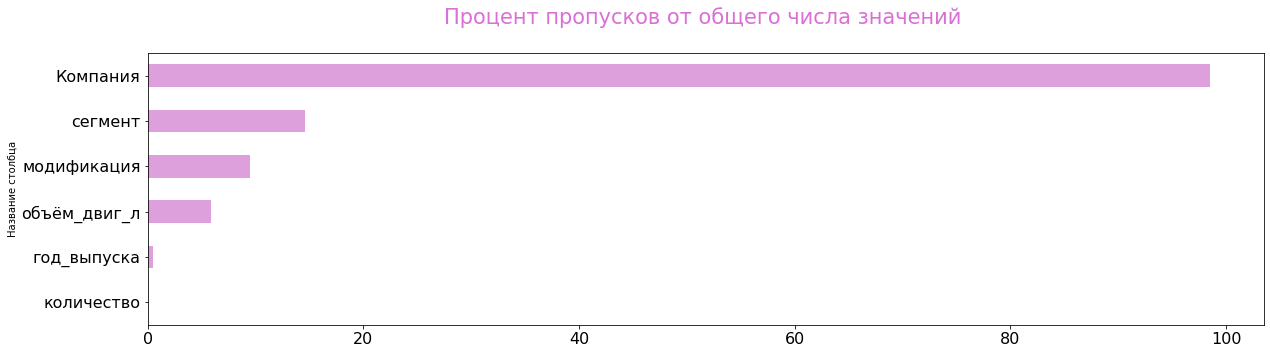

In [116]:
# выведем график пропусков
check_pass_value_percent_barh(df_auto)

- Год - хранимое значение соответсвует типу  int64  
- Месяц - хранимое значение соответсвует типу object
- Компания - хранимое значение соответсвует типу  object
- Бренд  - хранимое значение соответсвует типу  object
- Модель  - хранимое значение соответсвует типу object
- Модификация - хранимое значение соответсвует типу  object
- Год выпуска - хранимое значение НЕ соответсвует типу  object, требуется замена на int  
- Страна-производитель - хранимое значение соответсвует типу  object
- Вид топлива  - хранимое значение соответсвует типу  object
- Объём двиг л  - хранимое значение НЕ соответсвует типу  object, необходимо преобразовать в float  
- Коробка передач - хранимое значение соответсвует типу object
- Тип привода - хранимое значение соответсвует типу  object
- Сегмент - хранимое значение соответсвует типу  object
- Регион - хранимое значение соответсвует типу  object
- Наименование дилерского центра  - хранимое значение соответсвует типу  object
- Тип клиента - хранимое значение соответсвует типу  object
- Количество - хранимое значение НЕ соответсвует типу float64, необходимо заменить на int
- Цена USD  - хранимое значение соответсвует типу  float64
- Продажа USD - хранимое значение соответсвует типу float64
- Область - хранимое значение соответсвует типу object
- Сегментация 2013 - хранимое значение соответсвует типу object
- Класс 2013 - хранимое значение соответсвует типу object
- Сегментация Eng - хранимое значение соответсвует типуobject
- Локализация производства - хранимое значение соответсвует типу

In [117]:
# поскольку в столбце есть пропуски, то используем промежуточное преобразование через float
df_auto['год_выпуска'] = df_auto['год_выпуска'].astype('float').astype(pd.Int64Dtype())

In [118]:
df_auto['объём_двиг_л'] = df_auto['объём_двиг_л'].astype('float')
df_auto['объём_двиг_л'] = df_auto['объём_двиг_л'].round(1)
df_auto['объём_двиг_л'].unique()

array([ 1.4,  2. ,  3. ,  1.5,  4.4,  6.6,  nan,  1.8,  1.6,  2.4,  1.7,
        6.2,  2.5,  3.5,  2.2,  2.7,  2.8,  4.2,  5. ,  3.9,  7.5, 11. ,
       12.3,  3.7,  5.6,  7.8,  2.9,  5.2, 10.3,  8.7,  1.2,  3.8,  3.3,
        4.9,  4.6,  5.7, 10.5,  6.7,  4. ,  5.5, 12. ,  3.6,  6.5,  4.5,
        1.3, 13. , 16. ,  2.3, 15. , 14.8, 17.5])

In [119]:
# поскольку в столбце есть пропуски, то используем промежуточное преобразование через float
df_auto['количество'] = df_auto['количество'].astype('float').astype(pd.Int64Dtype())

In [120]:
# проверяем преобразование типов
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   год                             32854 non-null  int64         
 1   месяц                           32854 non-null  object        
 2   компания                        32854 non-null  object        
 3   бренд                           32854 non-null  object        
 4   модель                          32854 non-null  object        
 5   модификация                     29729 non-null  object        
 6   год_выпуска                     32700 non-null  Int64         
 7   страна-производитель            32854 non-null  object        
 8   вид_топлива                     32854 non-null  object        
 9   объём_двиг_л                    30907 non-null  float64       
 10  коробка_передач                 32854 non-null  object        
 11  ти

## EDA

### Анализ числовых значений

Посмотрим на общие стат данные

In [121]:
df_auto.describe()

год   год_выпуска  объём_двиг_л    количество       цена_usd  \
count  32854.0  32700.000000  30907.000000  32849.000000   32854.000000   
mean    2019.0   2017.707003      2.268755      1.338153   29745.856890   
std        0.0      0.485321      0.970733      2.088050   22364.077937   
min     2019.0   2011.000000      1.200000      1.000000    4571.358913   
25%     2019.0   2017.000000      1.600000      1.000000   15141.580725   
50%     2019.0   2018.000000      2.000000      1.000000   22819.022589   
75%     2019.0   2018.000000      2.700000      1.000000   34568.063195   
max     2019.0   2018.000000     17.500000     91.000000  498787.514716   

        продажа_usd  
count  3.285400e+04  
mean   3.529557e+04  
std    4.607861e+04  
min    0.000000e+00  
25%    1.635447e+04  
50%    2.553389e+04  
75%    3.741071e+04  
max    1.980922e+06

В датасете представлены данные за 2019 год. Год выпуска автомобилей с 2011 года до 2018 год. Объем двигателя от 1.2 до 17.5. Максимально кол-во, купеленное за одну сделку - 91 автомобиль. Максимальная цена в рамках одной сделки - 498 787 USD, максимальная продажа - 1 980 922 USD

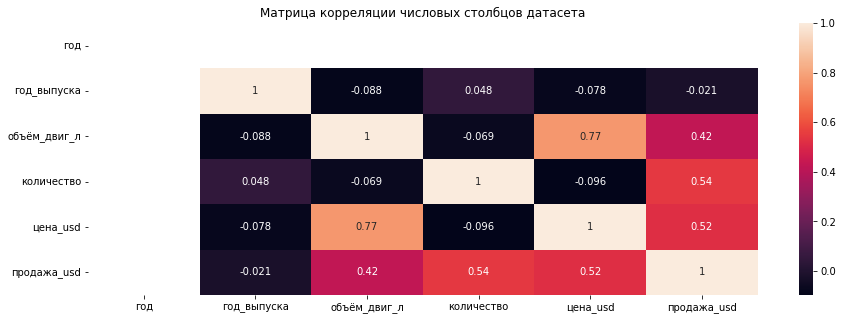

In [122]:
plt.figure(figsize = (15,5))
sns.heatmap(df_auto.corr(),
           annot = True)
plt.title('Матрица корреляции числовых столбцов датасета')
plt.show()

Видим высокую положительную корреляцию между ценой и объемом двигателя - это логичное подтверждение известного факта, что с чем больше объем двигателя, тем выше цена

Но также видим, что сумма продаж меньше зависит от объема двигателя, значит что есть дорогостоящие покупки среди автомобителей с маленьким объемом. Вероятно это были закупки машин в количестве больше одного автомобиля

Ниже изучим отдельно каждый числовой столбец

#### Анализ столбца Год выпуска

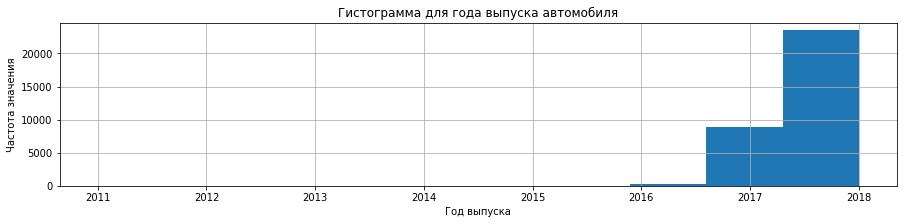

In [123]:
df_auto['год_выпуска'].hist(figsize=(15,3))
plt.title('Гистограмма для года выпуска автомобиля')
plt.xlabel('Год выпуска')
plt.ylabel('Частота значения')
plt.show()

In [124]:
df_auto['год_выпуска'].value_counts()

2018    23466
2017     8957
2016      233
2015       31
2014        6
2013        3
2011        2
2012        2
Name: год_выпуска, dtype: Int64

Основной объем датасета представлен автомобилями 2017-2018 года выпуска. Есть единичные автомобили 2011-2014 годов, 31 авто 2015 года и 233 - 2016. Т.к. датасет у нас за 2019 год, то можем сделать вывод, что по всем диллерам основные продажи идут автомобилями прошлого года выпуска и позапрошлого

#### Анализ столбца Объём двиг л

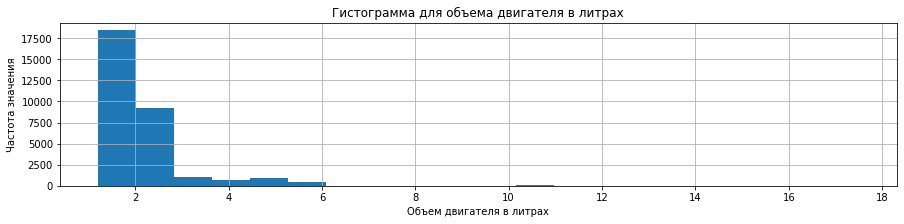

In [125]:
df_auto['объём_двиг_л'].hist(figsize=(15,3), bins=20)
plt.title('Гистограмма для объема двигателя в литрах')
plt.xlabel('Объем двигателя в литрах')
plt.ylabel('Частота значения')
plt.show()

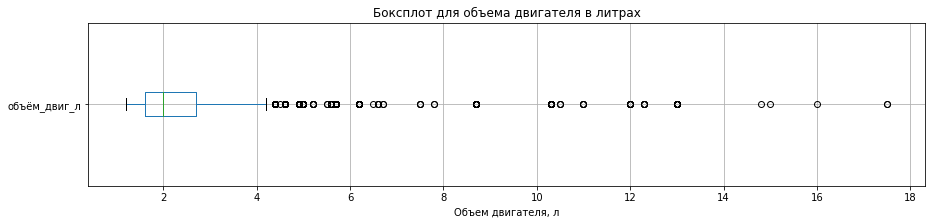

In [126]:
df_auto.boxplot('объём_двиг_л', vert=False, figsize=(15,3));
plt.title('Боксплот для объема двигателя в литрах')
plt.xlabel('Объем двигателя, л')
plt.show()

По всем диллерам наиболее часто встречающееся значение - объем двигателя от 1,6 до 2,7 литров. Среди объема больше 4 литров наблюдаются выбросы до 17,5 литра

#### Анализ столбца Количество

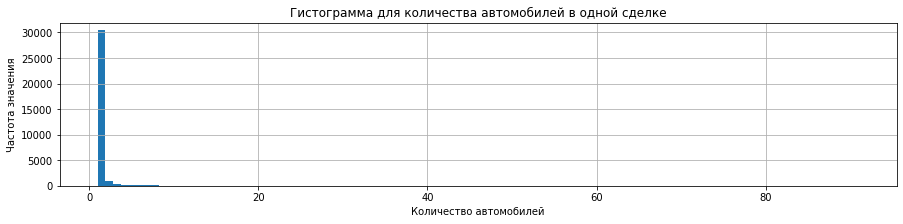

In [127]:
df_auto['количество'].hist(figsize=(15,3), bins=100)
plt.title('Гистограмма для количества автомобилей в одной сделке')
plt.xlabel('Количество автомобилей')
plt.ylabel('Частота значения')
plt.show()

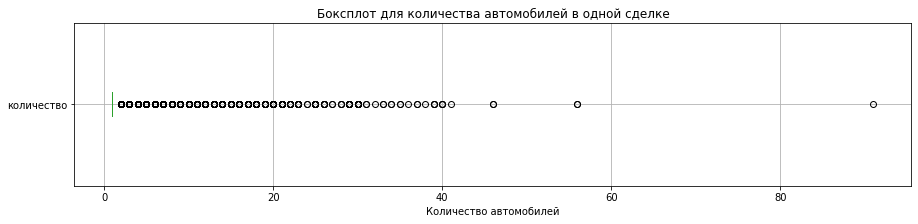

In [128]:
df_auto.boxplot('количество', vert=False, figsize=(15,3));
plt.title('Боксплот для количества автомобилей в одной сделке')
plt.xlabel('Количество автомобилей')
plt.show()

Наиболее часто продаются по 1 автомобилю, однако есть достаточное кол-во выбросов за пределами этого значения. Вероятно это потовые продажи для юридических лиц

#### Анализ столбца Цена USD

In [129]:
# введем новый столбец для хранения значений цены в тысячах
df_auto['цена_usd_тыс'] = df_auto['цена_usd'] / 1000

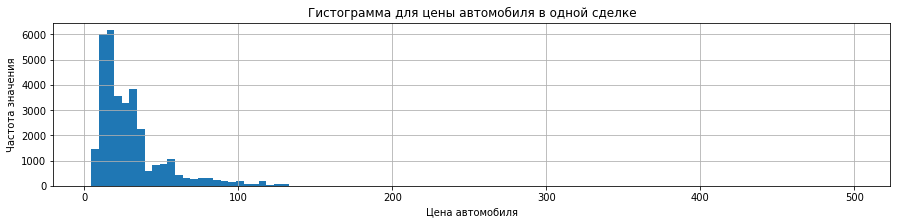

In [130]:
df_auto['цена_usd_тыс'].hist(figsize=(15,3), bins=100)
plt.title('Гистограмма для цены автомобиля в одной сделке')
plt.xlabel('Цена автомобиля')
plt.ylabel('Частота значения')
plt.show()

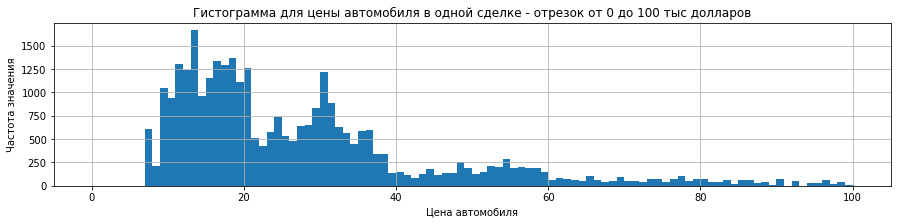

In [131]:
df_auto['цена_usd_тыс'].hist(figsize=(15,3), bins=100, range=(0,100))
plt.title('Гистограмма для цены автомобиля в одной сделке - отрезок от 0 до 100 тыс долларов')
plt.xlabel('Цена автомобиля')
plt.ylabel('Частота значения')
plt.show()

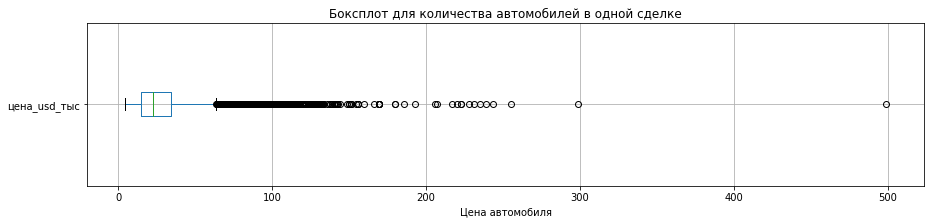

In [132]:
df_auto.boxplot('цена_usd_тыс', vert=False, figsize=(15,3));
plt.title('Боксплот для количества автомобилей в одной сделке')
plt.xlabel('Цена автомобиля')
plt.show()

Наиболее частая цена авто - от 15 до 34 тыс долларов. Также есть плотная полоса выбросов вплоть до 500 тыс долларов

#### Анализ столбца Продажа USD

In [133]:
# введем новый столбец для хранения значений продаж в тысячах
df_auto['продажа_usd_тыс'] = df_auto['продажа_usd'] / 1000

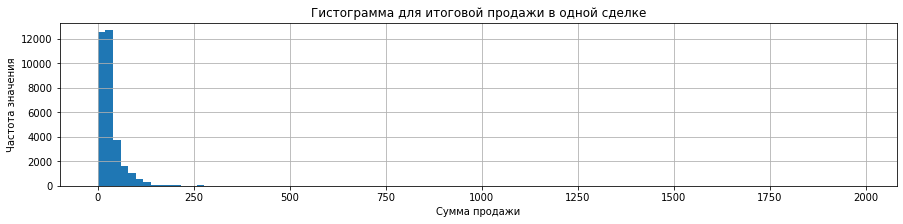

In [134]:
df_auto['продажа_usd_тыс'].hist(figsize=(15,3), bins=100)
plt.title('Гистограмма для итоговой продажи в одной сделке')
plt.xlabel('Сумма продажи')
plt.ylabel('Частота значения')
plt.show()

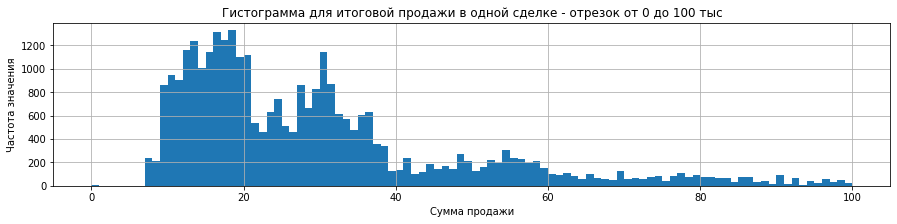

In [135]:
df_auto['продажа_usd_тыс'].hist(figsize=(15,3), bins=100, range=(0,100))
plt.title('Гистограмма для итоговой продажи в одной сделке - отрезок от 0 до 100 тыс')
plt.xlabel('Сумма продажи')
plt.ylabel('Частота значения')
plt.show()

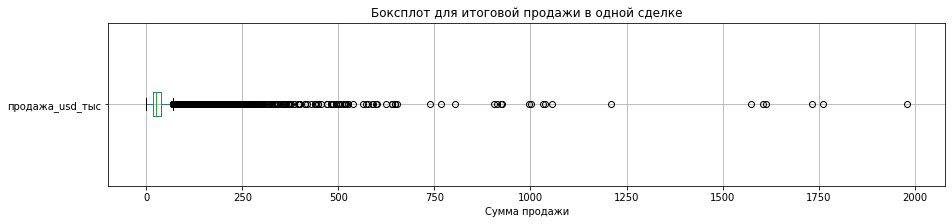

In [136]:
df_auto.boxplot('продажа_usd_тыс', vert=False, figsize=(15,3));
plt.title('Боксплот для итоговой продажи в одной сделке')
plt.xlabel('Сумма продажи')
plt.show()

Наиболее частотные значения суммы итоговой продажи находятся примерно на том же уровне, что и цена одного автомобиля - потому что самая частая сделка включает 1 автомобиль. Также есть инетересные выбросы с очень большой суммой продажи практически до 2 млн долларов, вероятно это был очень крупный заказ - посмотрим на эти записи

In [137]:
df_auto.loc[df_auto['продажа_usd_тыс'] > 1000,
            ['бренд', 'модель', 'цена_usd_тыс','количество','продажа_usd_тыс']].sort_values(by='продажа_usd_тыс',
                                                                                             ascending=False)

бренд       модель  цена_usd_тыс  количество  продажа_usd_тыс
962        Daewoo     BS 106 A     99.046110          20      1980.922195
20234      Scania     R-Series    125.796210          14      1761.146942
14078  Land Rover  Range Rover    133.381179          13      1733.955331
32215      Daewoo    ВС 211 МА    100.879561          16      1614.072971
20240      Scania     R-Series    123.426691          13      1604.546978
20245      Scania     R-Series    104.969273          15      1574.539089
32048        Урал         4320     41.674164          29      1208.550770
13420        Lada        Vesta     11.600000          91      1055.600000
32214      Daewoo    ВС 211 МА    115.373551           9      1038.361957
20465       Skoda    Superb B6     35.588250          29      1032.059250
960        Daewoo     BS 106 A    100.083762          10      1000.837624

### Анализ категориальных значений
<a id='5_2'></a>

Проведем первичный анализ категориальных значений по всему рынку - посмотрим на рейтинги по количеству совершенных сделок

In [138]:
df_auto.head(1)

год месяц     компания бренд модель   модификация  год_выпуска  \
0  2019  Март  Mercur Auto  Audi     A3  Audi A3 TFSI         2017   

  страна-производитель вид_топлива  объём_двиг_л коробка_передач тип_привода  \
0             Германия      Бензин           1.4        S-tronic   Не задано   

                       сегмент  регион наименование_дилерского_центра  \
0  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   

  тип_клиента  количество  цена_usd  продажа_usd   область  \
0   Физ. Лицо           1   31250.0      31250.0  г.Алматы   

      сегментация_2013 класс_2013 сегментация_eng локализация_производства  \
0  Легковые автомобили    C класс               C                   Импорт   

  Компания country_alpha3 тип_трансмиссии   dt_sales  цена_usd_тыс  \
0      NaN            DEU           Робот 2019-03-01         31.25   

   продажа_usd_тыс  
0            31.25

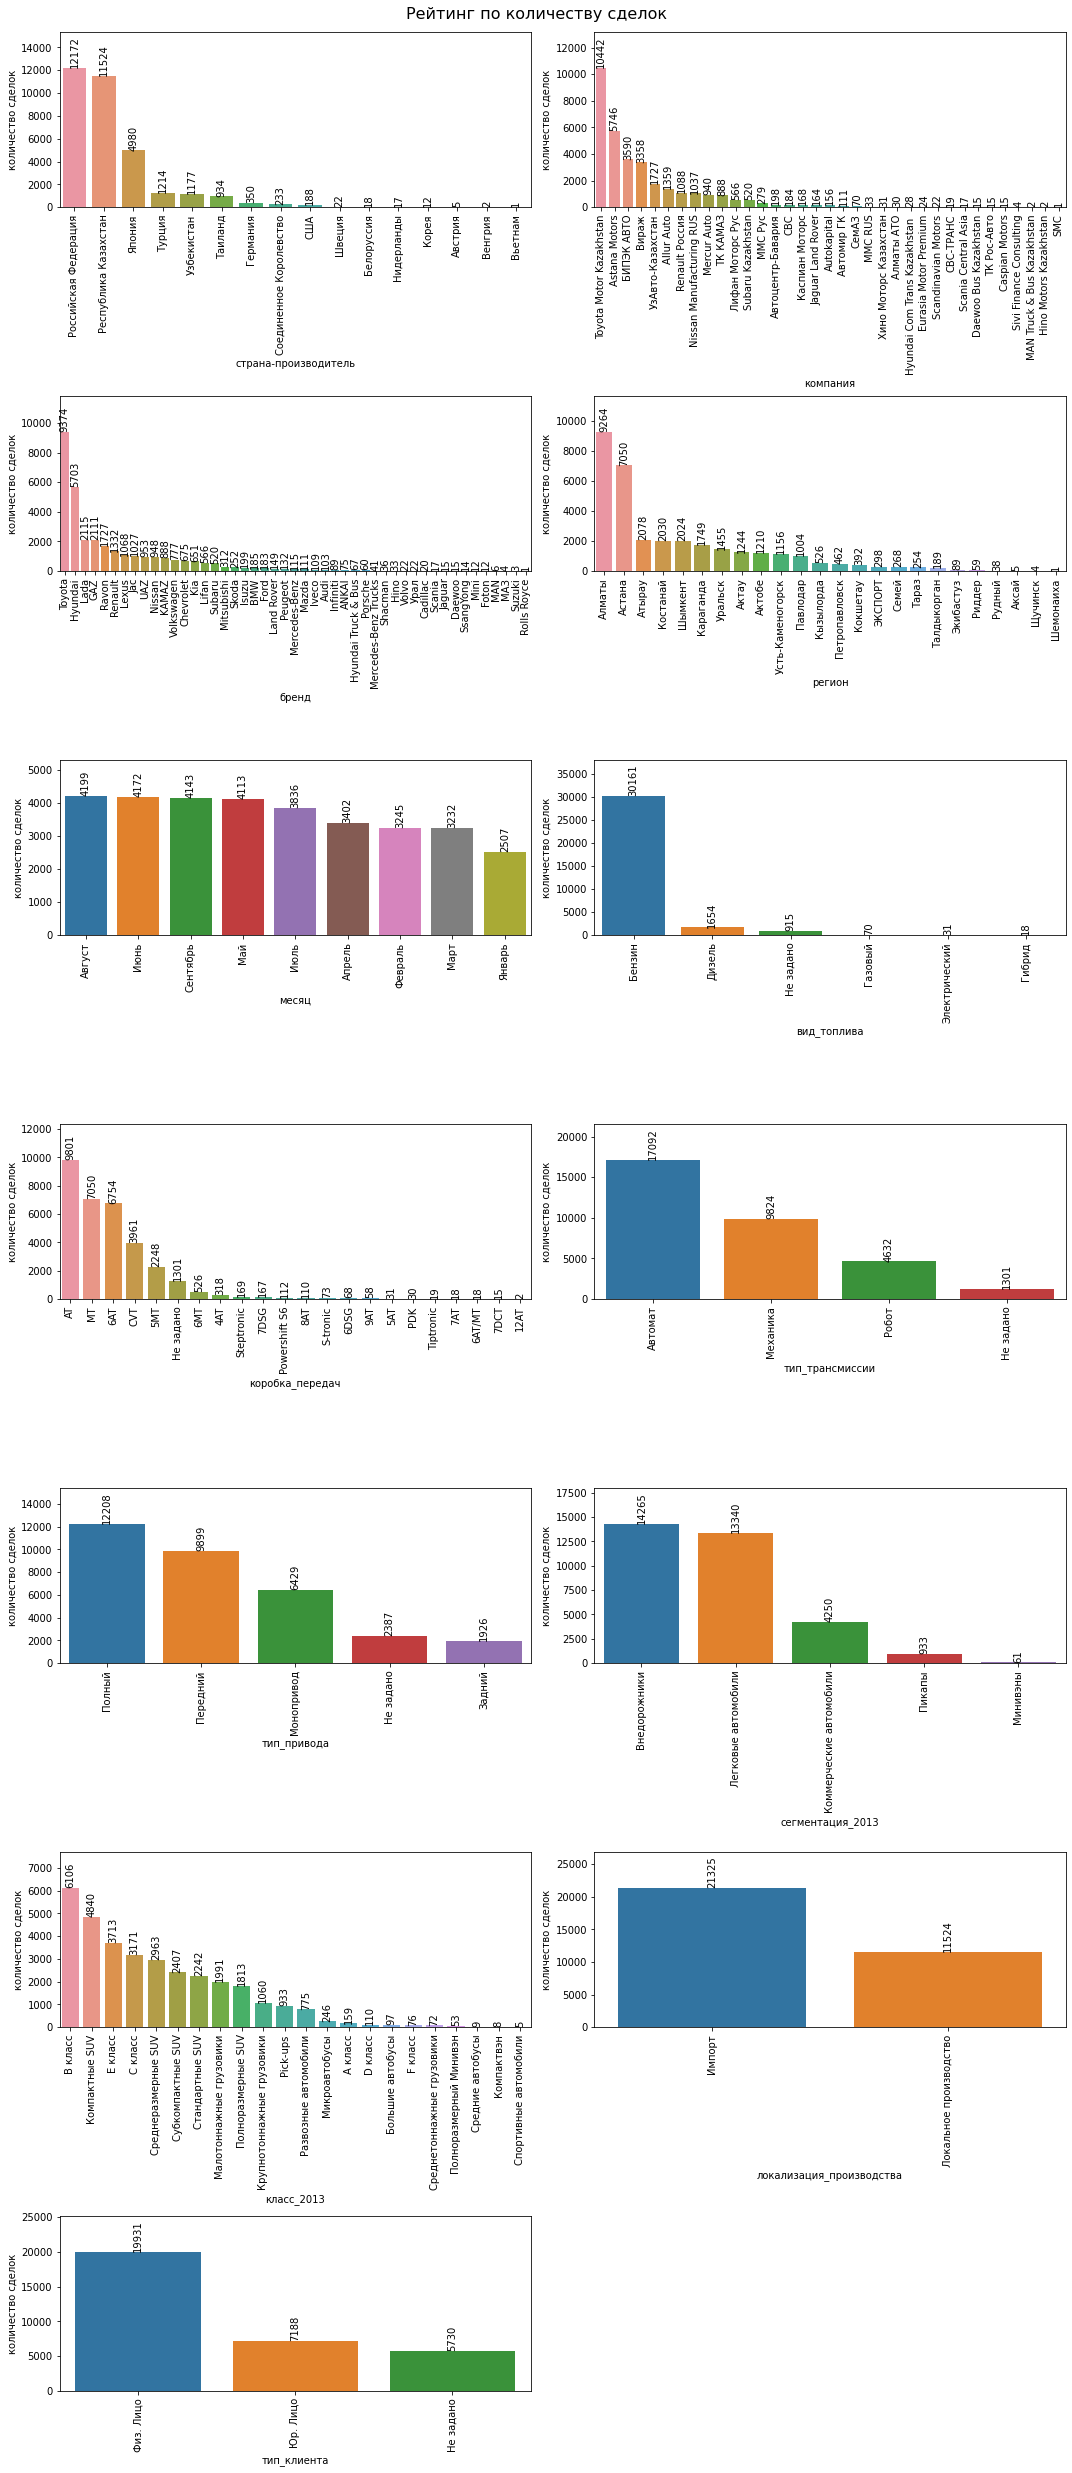

In [139]:
# сохраним в отдельный список категориальные столбцы, для которых будем строить рейтинг
list_param = ['страна-производитель', 'компания', 'бренд',
              'регион', 'месяц', 'вид_топлива',
             'коробка_передач', 'тип_трансмиссии', 'тип_привода',
             'сегментация_2013', 'класс_2013','локализация_производства', 'тип_клиента']

# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика
count_plt_row = math.ceil(len(list_param)/2)

plt.figure(figsize=(15, 5 * count_plt_row)).suptitle('Рейтинг по количеству сделок',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 2, counter+1)

    df = df_auto.groupby(i) \
                 .agg({'количество':'count'}) \
                 .sort_values(by='количество', ascending=False).reset_index()

    ax1 = sns.barplot(data=df,
                 y='количество',
                 x=i)
    # вывод подписей на бары
    ax1.bar_label(ax.containers[0], rotation=90)

    ax1.set_ylim(ax1.get_ylim()[0],ax1.get_ylim()[1]+ax1.get_ylim()[1]/5)
    plt.ylabel('количество сделок')
    plt.xticks(rotation=90)

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.97)
plt.show()

По количеству сделок по всему датасету видим следующих лидеров:
- самые популярные страны-производители - РФ и Казахстан, в на третьей позиции в количеством в три раза меньше - Япония
- кампания - Тойота Мотор Казахстан, далее в два раза меньше - Астана Моторс, БИПЭК Авто и Вираж
- бренд автомобиля - Тойота и  Хундай
- регион продаж - Алматы и Астана
- месяц продаж - с мая по сентябрь
- вид топлива - бензин с серьезным отрывом
- автомат и механика
- тип привода - полный и передний
- по сегментации - внедорожники и легковые автомобили
- по классу - В-класс,  Компактные SUV
- импорт популярней локального производства
- физические лица покупают чаще юридических лиц

### Результаты EDA

Предварительный EDA показал, что в Казахстане чаще всего производятся сделки с физическими лицами, которые покупают 1 автомобиль примущественно с бензиновым двигателем В-класса. Роботизированные коробки передач не пользуются спросом, в основном покупают автомат и механику. Больше всего продаж в центральных городах - Аламаты и Астане. Чаще всего продаются Тойота и Хундай и самые активный период продаж - с мая по сентябрь

## Исследовательский анализ

### Общий анализ авторынка Казахстана

#### Топовые марки на рынке Казахстана: в денежном и натуральном выражении (5-10 марок)

Проведем более детальный анализ по количеству проданных машин, цены сделки и цены одного автомобиля

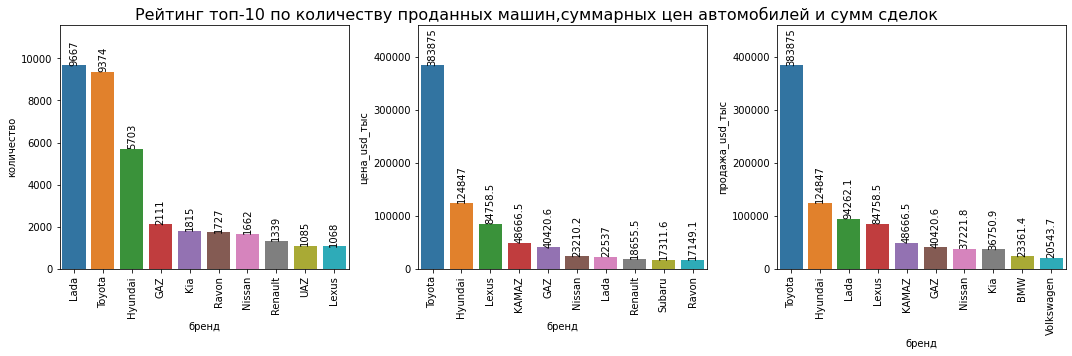

In [140]:
# сохраним в отдельный список категориальные столбцы, для которых будем строить рейтинг
list_param = ['количество', 'цена_usd_тыс', 'продажа_usd_тыс']

# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика
count_plt_row = math.ceil(len(list_param)/3)

plt.figure(figsize=(15, 5 * count_plt_row)).suptitle('Рейтинг топ-10 по количеству проданных машин,'
                                                     'суммарных цен автомобилей и сумм сделок',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 3, counter+1)

    df = df_auto.groupby('бренд') \
                 .agg({i:'sum'}) \
                 .sort_values(by=i, ascending=False).reset_index()

    ax1 = sns.barplot(data=df.head(10),
                 x='бренд',
                 y=i)
    # вывод подписей на бары
    ax1.bar_label(ax.containers[0], rotation=90)

    ax1.set_ylim(ax1.get_ylim()[0],ax1.get_ylim()[1]+ax1.get_ylim()[1]/7)

    plt.xticks(rotation=90)

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.93)
plt.show()

Лидер по количеству проданных машин - Lada и Toyota, далее идет Hyundai, остальные марки примерно на одном уровне - GAZ, Kia, Ravon, Nissan, Renault, UAZ, Lexus

С заметным отрывом лидер по суммарным ценам автомобиля - Toyota, далее Hyundai, на третьем месте Lexus

Среди суммарных сумм сделок - также с большим отрывом лидер Toyota, далее Hyundai, на третьем месте Lada и на четвертом Lexus

#### Продажи на рынке Казахстана всех марок в денежном и натуральном выражении

In [141]:
print('Всего продано автомобилей:', df_auto['количество'].sum())
print('Общая сумма цен автомобилей:', df_auto['цена_usd_тыс'].sum())
print('Общая сумма сделок:', df_auto['продажа_usd_тыс'].sum())
print('Разница между общей суммой сделок и общей суммой цен автомобилей:',
      df_auto['продажа_usd_тыс'].sum() - df_auto['цена_usd_тыс'].sum())

Всего продано автомобилей: 43957
Общая сумма цен автомобилей: 977270.3822771773
Общая сумма сделок: 1159600.568283179
Разница между общей суммой сделок и общей суммой цен автомобилей: 182330.18600600178


В стобцах с ценой автомобиля и суммой сделок не было пропусков, но при этом видим, что суммарные значения отличаются - общая сумма сделок больше примено 182 млн долларов

Это значит, что есть продажи, в которых во время сделки финальная сумма вышла больше чем стоимость автомобиля. Вероятно за счет дополнительных услуг  

#### Динамика продаж в целом по рынку: в денежном и натуральном выражении (помесячно)

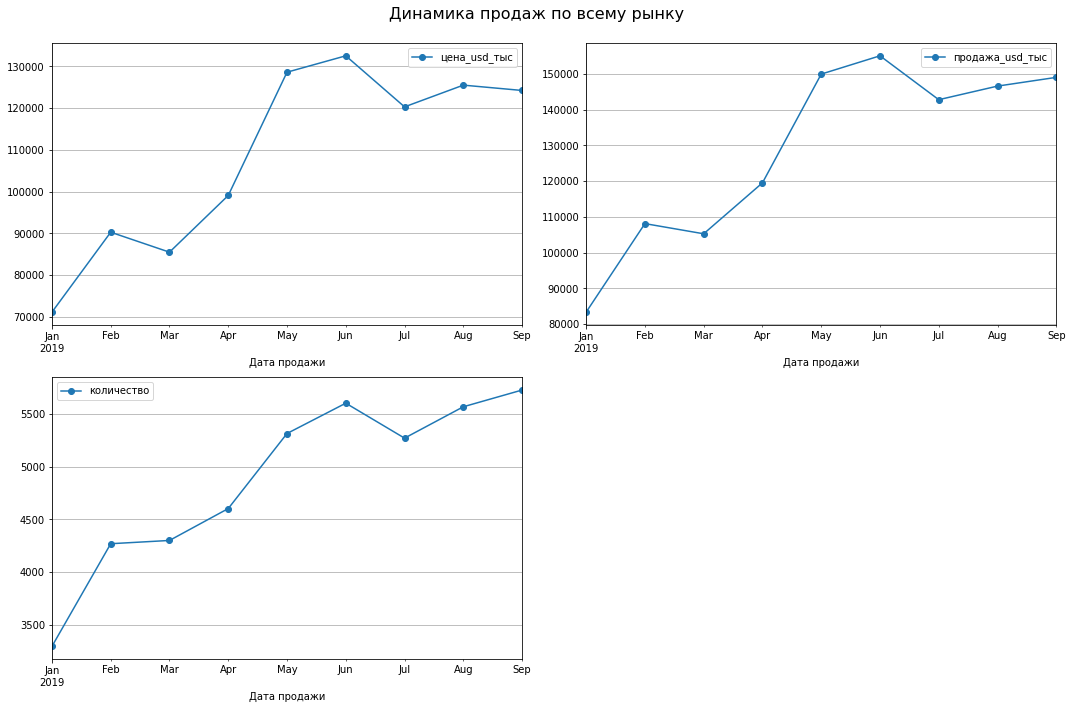

In [142]:
# сохраним в отдельный список категориальные столбцы, для которых будем строить рейтинг
list_param = ['цена_usd_тыс', 'продажа_usd_тыс', 'количество']

# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 2 графика
count_plt_row = math.ceil(len(list_param)/2)

plt.figure(figsize=(15, 5 * count_plt_row)).suptitle('Динамика продаж по всему рынку',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 2, counter+1)
    df = df_auto.groupby('dt_sales').agg({i:'sum'})
    df.plot(ax=ax,
           marker='o',
           grid=True)
    plt.xlabel('Дата продажи')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.93)
plt.show()



Динамика продаж по всему рынку по количеству машин, по суммарной цене и общей сумме сделок имеет одинаковую тенденцию - подъем с февраля с резким скачком начиная с мая и небольшим спадом в июле и с последующим нарастанием в августе

#### Динамика продаж по категориям (помесячно): тип топлива, класс, сегмент

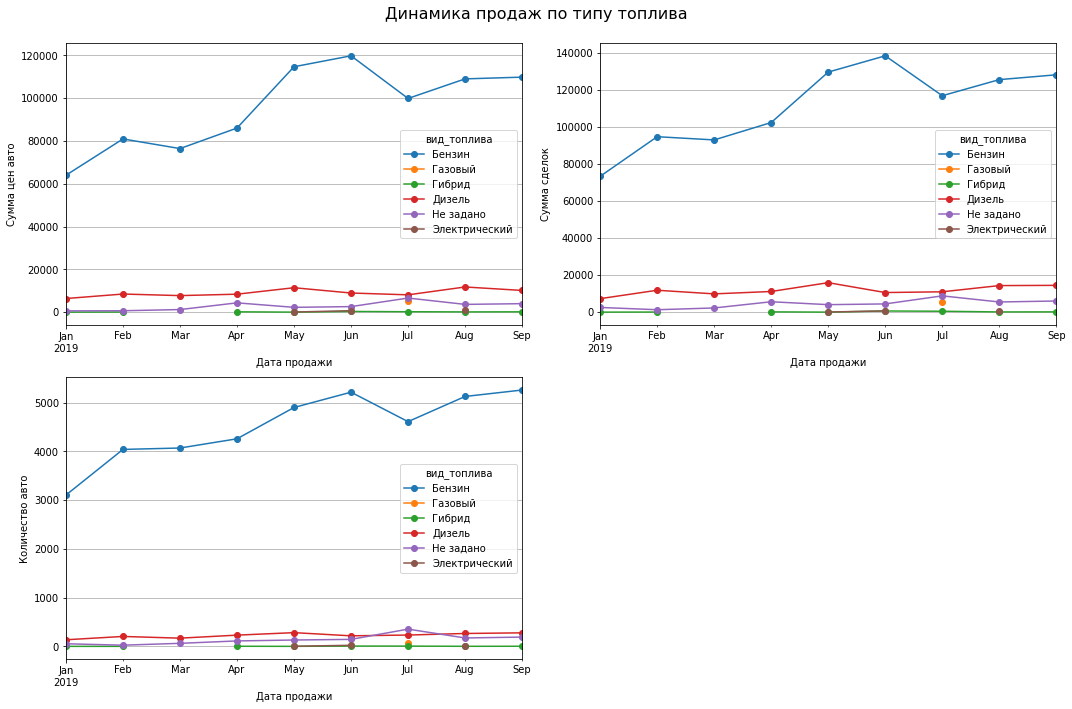

In [143]:
# сохраним в отдельный список категориальные столбцы, для которых будем строить рейтинг
list_param = ['цена_usd_тыс', 'продажа_usd_тыс', 'количество']

# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 2 графика
count_plt_row = math.ceil(len(list_param)/2)

plt.figure(figsize=(15, 5 * count_plt_row)).suptitle('Динамика продаж по типу топлива',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 2, counter+1)

    df = df_auto.pivot_table(index='dt_sales',
                            columns='вид_топлива',
                            values=i,
                            aggfunc='sum')

    df.plot(ax=ax,
           marker='o',
           grid=True)
    if (i == 'количество'): plt.ylabel('Количество авто')
    if (i == 'цена_usd_тыс'): plt.ylabel('Сумма цен авто')
    if (i == 'продажа_usd_тыс'): plt.ylabel('Сумма сделок')
    plt.xlabel('Дата продажи')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.93)
plt.show()

По типу топлива видим среди бензиновых двигателей самые большие продажи. Тренды совпадают с общей динамикой по рынку. Пик продаж приходит с мая по сентябрь

Остальные типы топлива ведут себя более спокойно, потому что вцелом по ним не слишеом большие продажи вреди всего рынка - есть небольшое увеличение на уровне мая, остальные месяцы примерно одинаковы

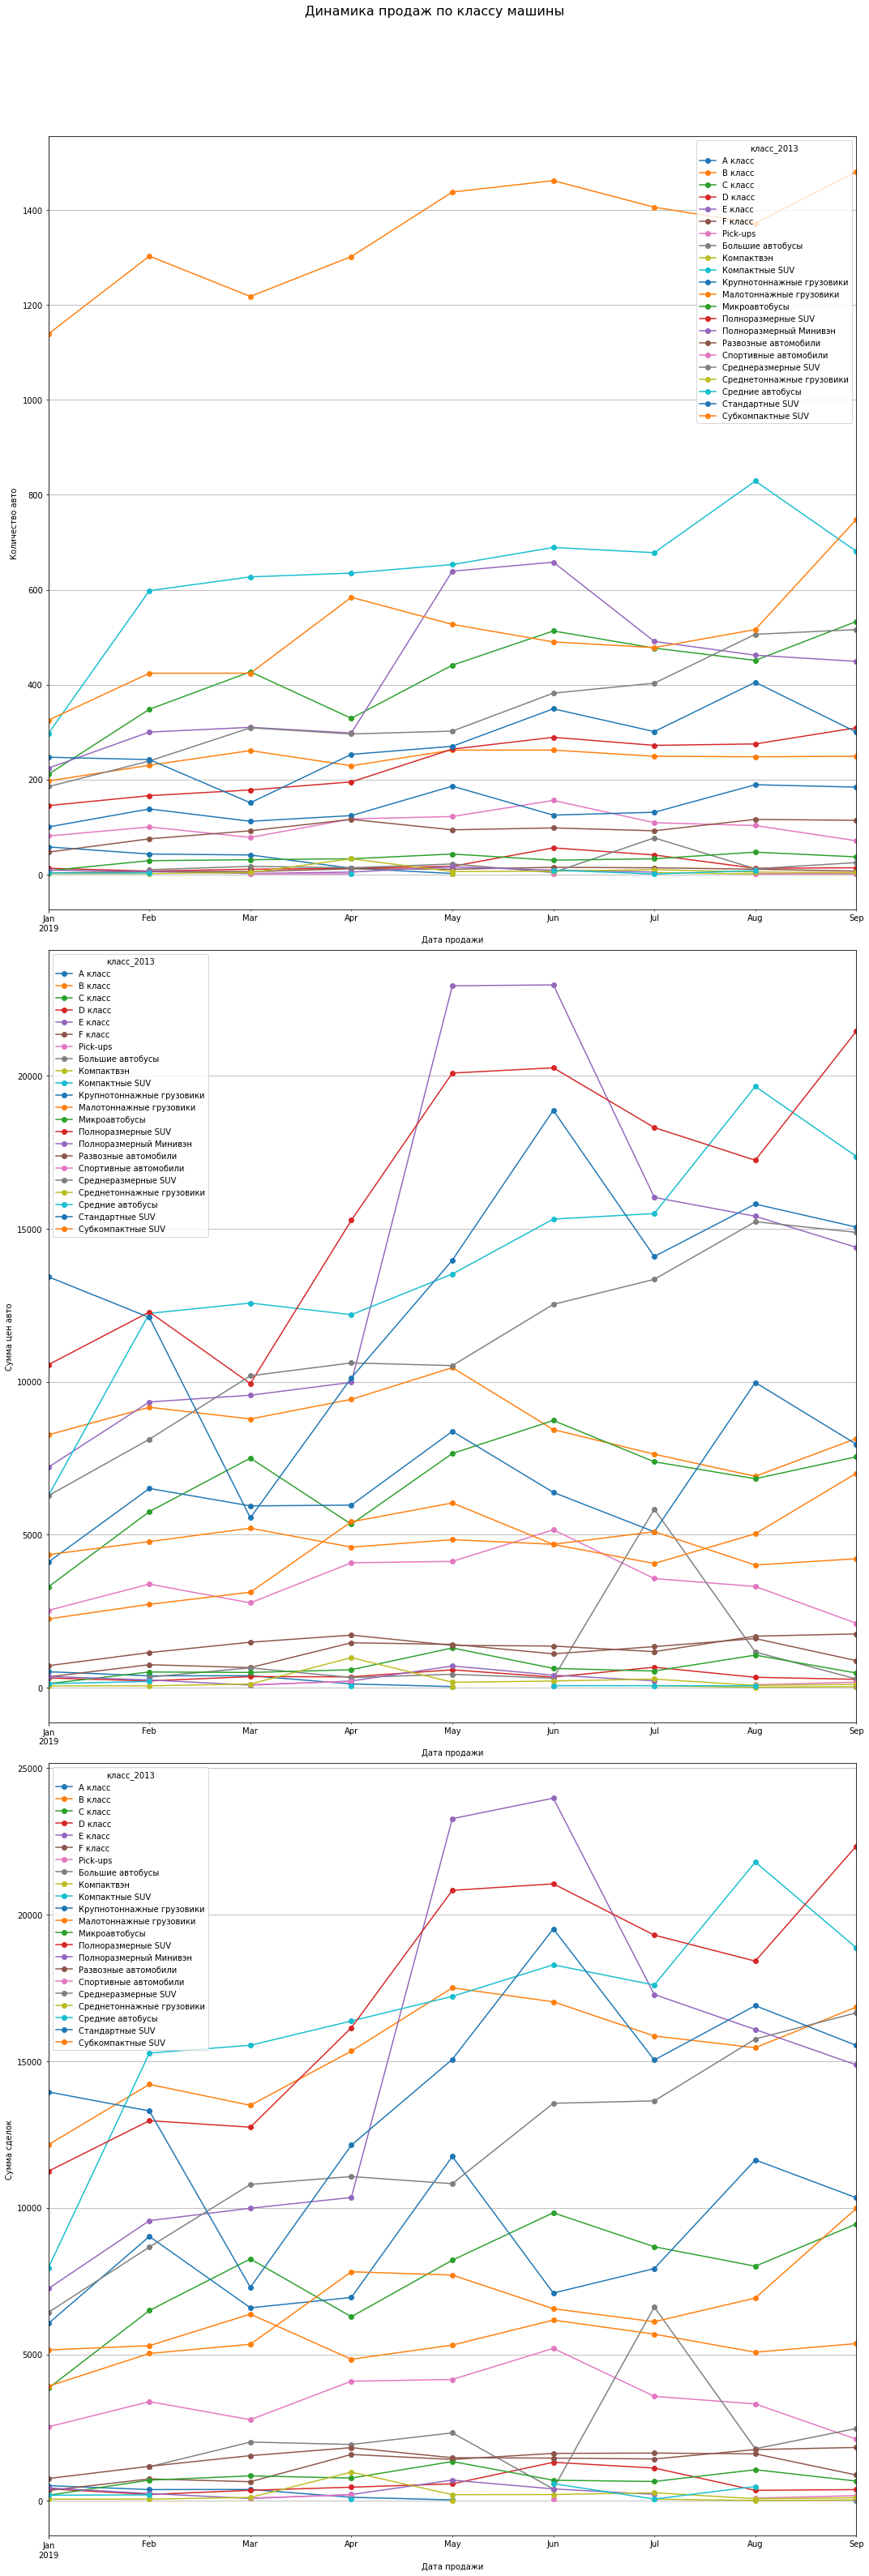

In [144]:
# сохраним в отдельный список категориальные столбцы, для которых будем строить рейтинг
list_param = ['количество', 'цена_usd_тыс', 'продажа_usd_тыс']

# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика
count_plt_row = math.ceil(len(list_param)/1)

plt.figure(figsize=(15, 15 * count_plt_row)).suptitle('Динамика продаж по классу машины',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 1, counter+1)

    df = df_auto.pivot_table(index='dt_sales',
                            columns='класс_2013',
                            values=i,
                            aggfunc='sum')

    df.plot(ax=ax,
           marker='o',
           grid=True)
    if (i == 'количество'): plt.ylabel('Количество авто')
    if (i == 'цена_usd_тыс'): plt.ylabel('Сумма цен авто')
    if (i == 'продажа_usd_тыс'): plt.ylabel('Сумма сделок')
    plt.xlabel('Дата продажи')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.93)
plt.show()

По динамике классов машин видим, что разные классы более востребованы в разное время

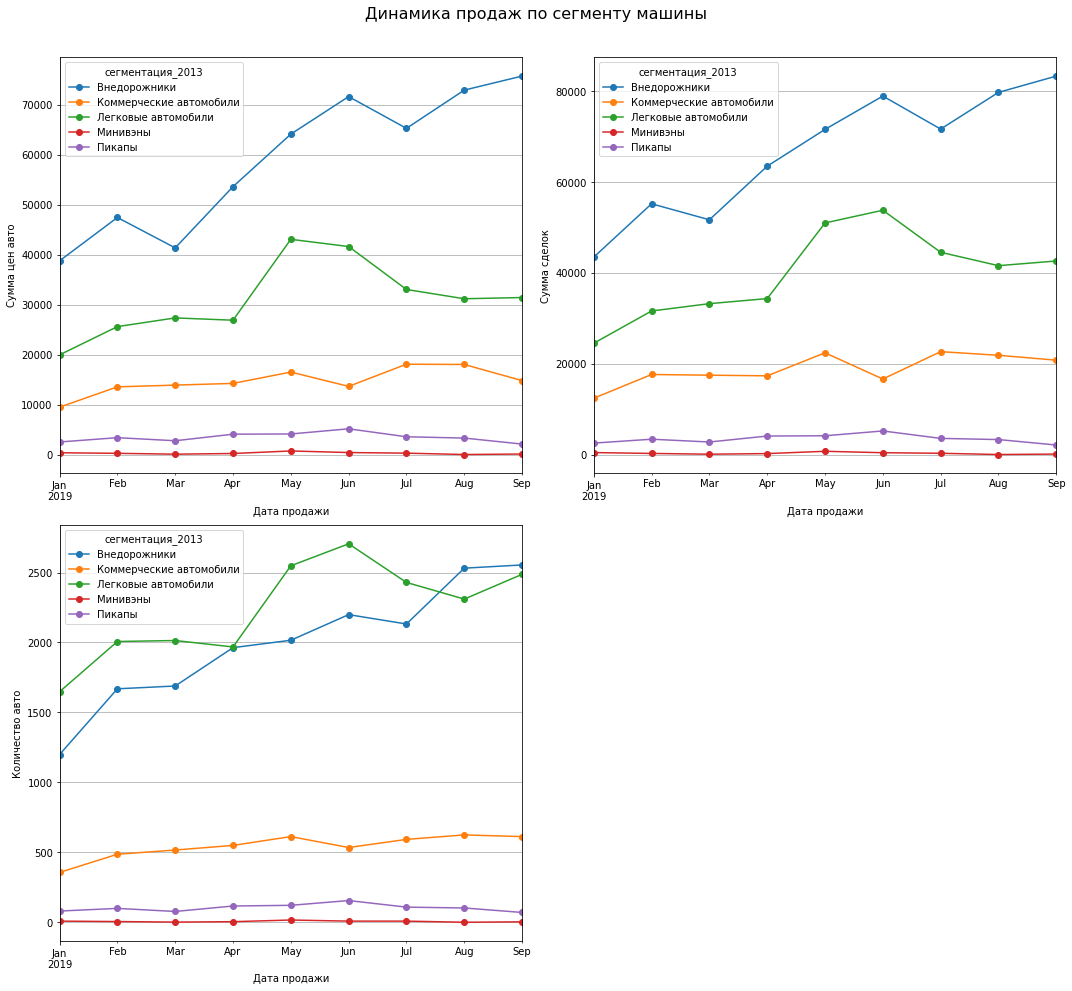

In [145]:
# сохраним в отдельный список категориальные столбцы, для которых будем строить рейтинг
list_param = ['цена_usd_тыс', 'продажа_usd_тыс', 'количество']

# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 2 графика
count_plt_row = math.ceil(len(list_param)/2)

plt.figure(figsize=(15, 7 * count_plt_row)).suptitle('Динамика продаж по сегменту машины',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 2, counter+1)

    df = df_auto.pivot_table(index='dt_sales',
                            columns='сегментация_2013',
                            values=i,
                            aggfunc='sum')

    df.plot(ax=ax,
           marker='o',
           grid=True)
    if (i == 'количество'): plt.ylabel('Количество авто')
    if (i == 'цена_usd_тыс'): plt.ylabel('Сумма цен авто')
    if (i == 'продажа_usd_тыс'): plt.ylabel('Сумма сделок')
    plt.xlabel('Дата продажи')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.93)
plt.show()

Легковые авто растут в продажах по количеству с мая по июнь, далее немного падают. Цена авто и сумма сделки имеет такую же динамику

Внедорожники за исключением небольших провалов в марте и июле имеют рост по всем показателям на протяжении всего года

По остальным категориям изменения менее динамичны и остаются примерно на одном уровне

#### Продажи по регионам

Были проанализированы в п.[5.2](#5_2)

#### Продажи по автоцентрам

Были проанализированы в п.[5.2](#5_2)

#### Общее количество авто в разбивке по бренду и классу

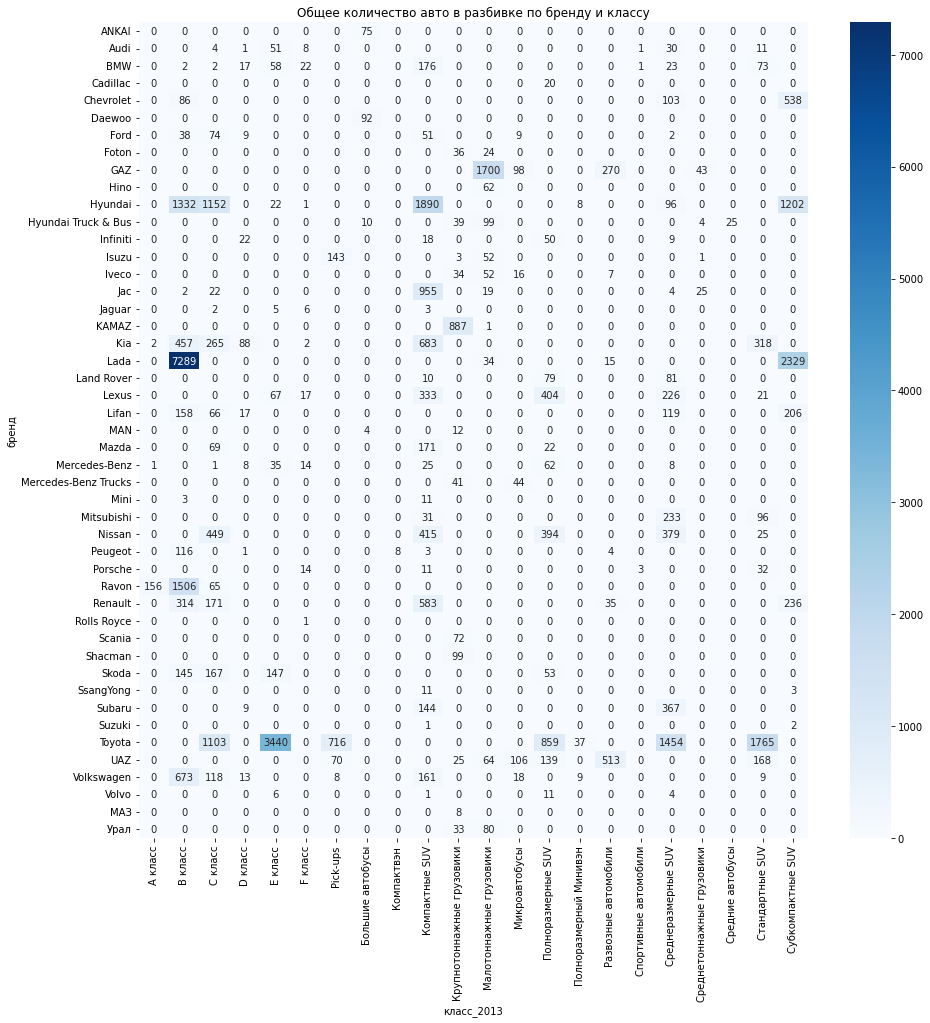

In [146]:
df = df_auto.pivot_table(index='бренд',
                   columns='класс_2013',
                   values='количество',
                   aggfunc='sum').fillna(0).astype('float')
#df

plt.figure(figsize=(15, 15))
sns.heatmap(df,
            fmt='g',
          annot = True,
           cmap='Blues')
plt.title('Общее количество авто в разбивке по бренду и классу')
plt.show()

Видим, что больше всего авто продается у Лады в В классе, далее идет Тойота Е класс и Лада Субкомпактные SUV

#### Общее количество авто в разбивке по типу трансмиссии и региону

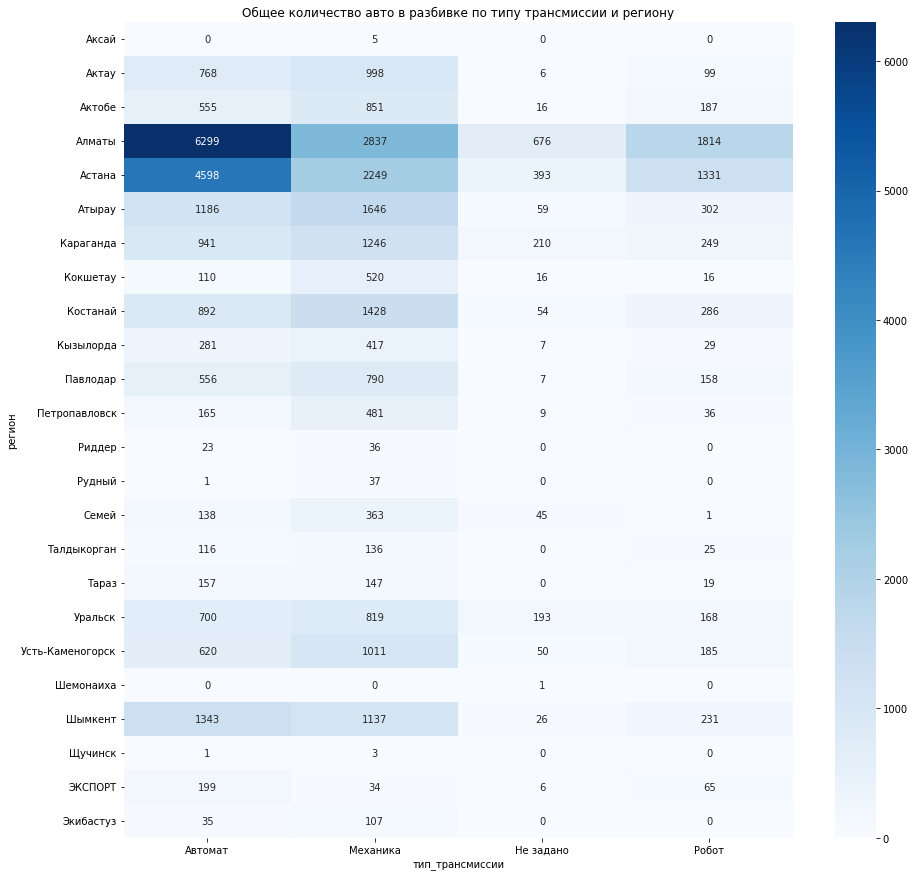

In [147]:
df = df_auto.pivot_table(index='регион',
                   columns='тип_трансмиссии',
                   values='количество',
                   aggfunc='sum').fillna(0).astype('float')
#df

plt.figure(figsize=(15, 15))
sns.heatmap(df,
            fmt='g',
          annot = True,
           cmap='Blues')
plt.title('Общее количество авто в разбивке по типу трансмиссии и региону')
plt.show()

Больше всего автомата продается в Алматы и Астане, далее идет механика в тех же регионах

#### Общее количество авто в разбивке по кампании и региону

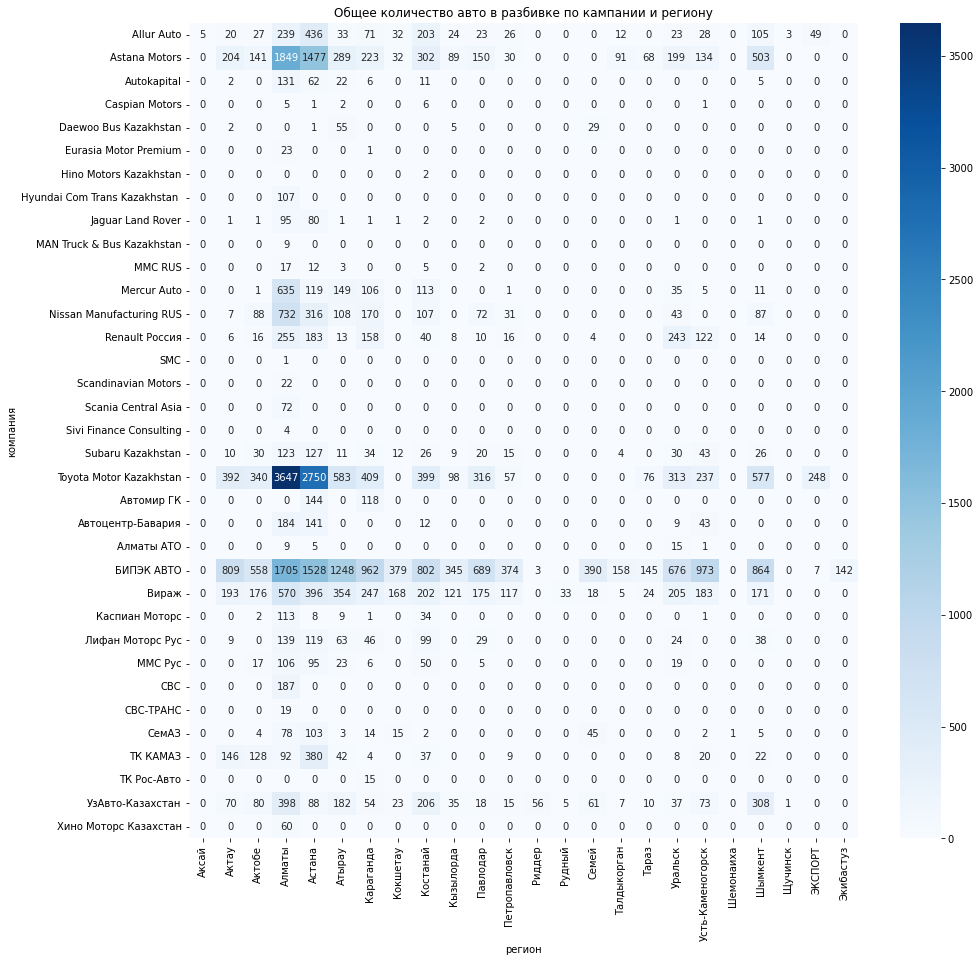

In [148]:
df = df_auto.pivot_table(index='регион',
                   columns='компания',
                   values='количество',
                   aggfunc='sum').fillna(0).astype('float')
#df

plt.figure(figsize=(15, 15))
sns.heatmap(df.T,
            fmt='g',
          annot = True,
           cmap='Blues')
plt.title('Общее количество авто в разбивке по кампании и региону')
plt.show()

Больше всего машин продается в Тойота Моторс Казахстан в Алматы. Его главный конкурент в этом же регионе - Астана Моторс и БИПЭК Авто

#### Самые продаваемый  бренд / автоцентр / регион

Самый большие продажи ожидаемо в двух самых крупных городах - Алматы и Астана. Самые продаваемые авто - у Лады в В классе, далее идет Тойота Е класс и Лада Субкомпактные SUV.

Лидеры по количеству сделок кампания - Тойота Мотор Казахстан, далее в два раза меньше - Астана Моторс, БИПЭК Авто и Вираж

### Операционные показатели Меркур

Перед анализом Меркур выведем рейтинг по продажам среди топ-10 автосалонов без привязки к регионам

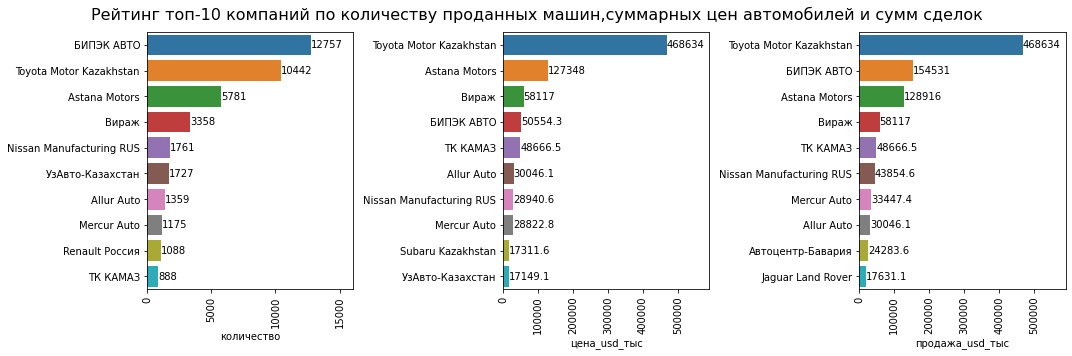

In [149]:
# сохраним в отдельный список категориальные столбцы, для которых будем строить рейтинг
list_param = ['количество', 'цена_usd_тыс', 'продажа_usd_тыс']

# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика
count_plt_row = math.ceil(len(list_param)/3)

plt.figure(figsize=(15, 5 * count_plt_row)).suptitle('Рейтинг топ-10 компаний по количеству проданных машин,'
                                                     'суммарных цен автомобилей и сумм сделок',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_param):

    ax = plt.subplot(count_plt_row, 3, counter+1)

    df = df_auto.groupby('компания') \
                 .agg({i:'sum'}) \
                 .sort_values(by=i, ascending=False).reset_index()

    ax1 = sns.barplot(data=df.head(10),
                 y='компания',
                 x=i,
                orient='h')
    # вывод подписей на бары
    ax1.bar_label(ax.containers[0])

    ax1.set_xlim(ax1.get_xlim()[0],ax1.get_xlim()[1]+ax1.get_xlim()[1]/5)

    plt.xticks(rotation=90)
    plt.ylabel(None)

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.91)
plt.show()

Меркур Авто находится на последних строчках рейтинга, поэтому помимо него будем сразу анализировать 4 лидеров - БИПЭК АВТО, Тойота Мотор Казахстан, Астана Моторс, Вираж - чтобы понять в чем их главное премущество по сравнению с менее популярным автосалоном

#### Прибыль и выручка

За период: общая прибыль, прибыль по брендам, средняя стоимость продажи за период, средняя стоимость в разбивке по маркам

Помесячно: ежемесячная, ежемемесячная прибыль по брендам, ежемесячная средняя стоимость продажи, ежемесячная стоимость продажи в разбивке по маркам

In [150]:
list_company = ['Toyota Motor Kazakhstan',
               'Astana Motors',
               'Вираж',
               'БИПЭК АВТО',
               'Mercur Auto']

Рейтинг общей прибыли:
- Toyota Motor Kazakhstan на первом месте с 468 тыс долларов за цену автомобилей и общей выручки. При этом по количеству проданных авто она только на втором месте. Опережает БИПЭК Авто, который лидер по кол-ву проданных автомобилей
- БИПЭК АВТО находится на 4ом месте по ценам авто, но 2ом по общей выручке, которая превышает цены в три раза (значит у дилера много доп услуг)
- У Astana Motors и Вираж тоже есть отличия в большую сторону межлу общей выручкой и суммой проданных авто
- у Mercur Auto аналогично

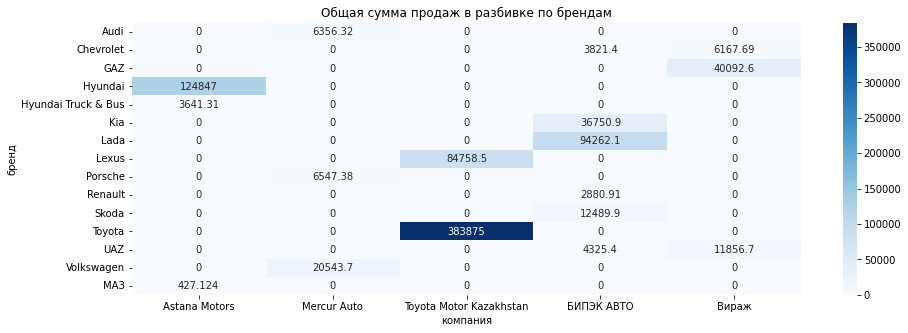

In [151]:
df = df_auto.query('компания in @list_company').pivot_table(index='бренд',
                   columns='компания',
                   values='продажа_usd_тыс',
                   aggfunc='sum').fillna(0).astype('float')
#df

plt.figure(figsize=(15, 5))
sns.heatmap(df,
            fmt='g',
          annot = True,
           cmap='Blues')
plt.title('Общая сумма продаж в разбивке по брендам')
plt.show()

Самая большая прибыль у Toyota Motor Kazakhstan при продаже автомобилей Тойтота - логично ) в других компаниях эти машины не продаются

Далее идет Хундай в Астана Моторс

В Меркур продаютс Ауди, Порш и Фолксваген - эти машины являются самыми дорогими из представленных. Поэтому объяснимо почему у данного дилера намного меньший доход

Вообще видим явную монополию среди представленных кампаний - только Шевроле и УАЗ продаются у двух их них. Остальные марки представлены только в одном из приведенных дилеров



In [152]:
print('Среднняя стоимость продажи:')
df_auto.query('компания in @list_company').groupby('компания').\
agg({'продажа_usd_тыс':'mean'}).\
sort_values(by='продажа_usd_тыс', ascending=False)

Среднняя стоимость продажи:


продажа_usd_тыс
компания                                
Toyota Motor Kazakhstan        44.879681
БИПЭК АВТО                     42.984868
Mercur Auto                    35.582351
Astana Motors                  22.435717
Вираж                          17.307025

По средней цене продажи лидер Тойтоа Моторс, а Меркур стоит на 3ьем месте

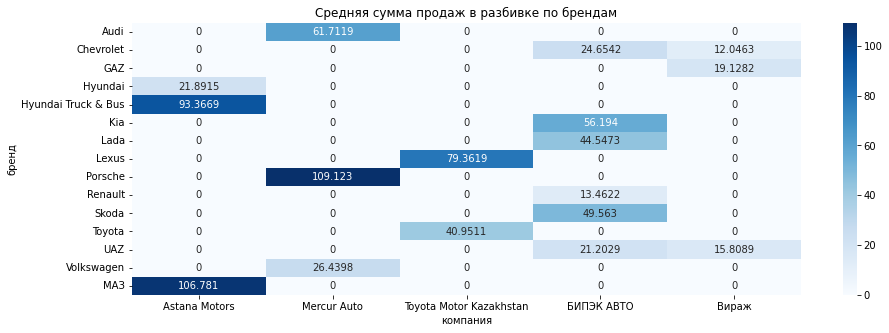

In [153]:
df = df_auto.query('компания in @list_company').pivot_table(index='бренд',
                   columns='компания',
                   values='продажа_usd_тыс',
                   aggfunc='mean').fillna(0).astype('float')
#df

plt.figure(figsize=(15, 5))
sns.heatmap(df,
            fmt='g',
          annot = True,
           cmap='Blues')
plt.title('Средняя сумма продаж в разбивке по брендам')
plt.show()

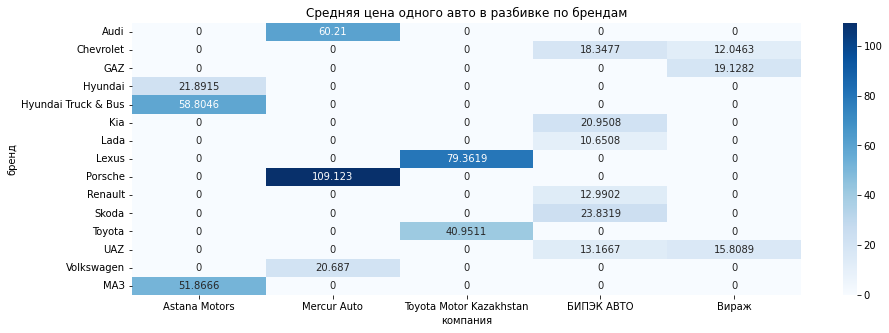

In [154]:
df = df_auto.query('компания in @list_company').pivot_table(index='бренд',
                   columns='компания',
                   values='цена_usd_тыс',
                   aggfunc='mean').fillna(0).astype('float')
#df

plt.figure(figsize=(15, 5))
sns.heatmap(df,
            fmt='g',
          annot = True,
           cmap='Blues')
plt.title('Средняя цена одного авто в разбивке по брендам')
plt.show()

По средней сумме сделки лидеры Меркур с Порш и Астана Моторс МАЗ и автобусами - потому что у Меркура есть дорогие Порше, а Астана Моторс видимо берет количеством - у нее при меньшей цене авто большая средняя сумма сделки  

In [155]:
#df_auto.query('компания == "Astana Motors"').groupby('dt_sales').agg({'продажа_usd_тыс':'mean'})

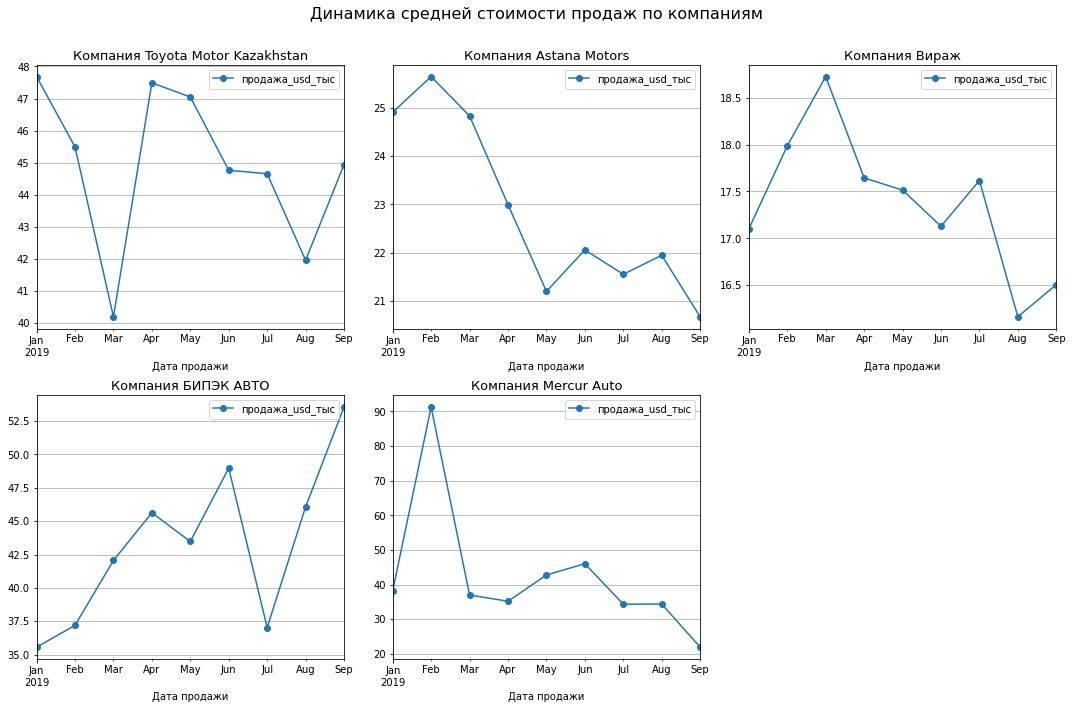

In [156]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика
count_plt_row = math.ceil(len(list_company)/3)

plt.figure(figsize=(15, 5 * count_plt_row)).suptitle('Динамика средней стоимости продаж по компаниям',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_company):

    ax = plt.subplot(count_plt_row, 3, counter+1)
    df = df_auto.query('компания == @i').groupby('dt_sales').agg({'продажа_usd_тыс':'mean'})
    
    df.plot(ax=ax,
           marker='o',
           grid=True)
    plt.xlabel('Дата продажи')
    plt.title('Компания {}'.format(i), fontsize=13, pad=5)

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9)
plt.show()

У Меркура самые высокие средние продажи были в феврале, которые резко упали в марте и немного начали подниматься с апреля по июнь и потом снова начали падать

У Тойтоты самые большие продажи были в январе и с преля по май

В Астане моторс только в феврале, далее рынок начал падать


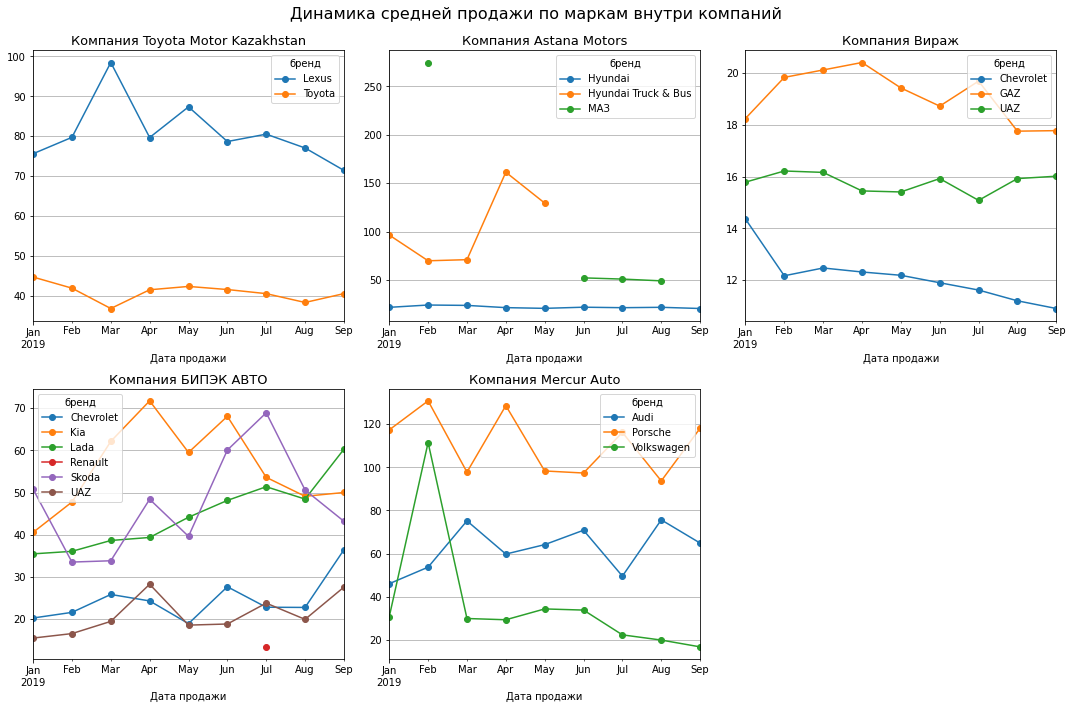

In [157]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика
count_plt_row = math.ceil(len(list_company)/3)

plt.figure(figsize=(15, 5 * count_plt_row)).suptitle('Динамика средней продажи по маркам внутри компаний',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_company):

    ax = plt.subplot(count_plt_row, 3, counter+1)

    df = df_auto.query('компания == @i').pivot_table(index='dt_sales',
                            columns='бренд',
                            values='продажа_usd_тыс',
                            aggfunc='mean')

    df.plot(ax=ax,
           marker='o',
           grid=True)
    plt.xlabel('Дата продажи')
    plt.title('Компания {}'.format(i), fontsize=13, pad=5)

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.92)
plt.show()

 У Меркур средняя цена сделок Порше снижалась и повышалась ежемесячно, но скачки примерно на 20 процентов. У Ауди чуть менее стабильные средние суммы - самая низка в январе и июле. У фольцвагена самая большая средняя цена была в феврале

 У Тойоты моторс тоже видим скачки средней сделки по лексусам и более стабильные суммы по тойоте

 Интересно посмотреть на Астану моторс - МАЗ продавался только в феврале и далее только в летние месяцы. Причем средняя сумма отличается в 5 раз - видимо в феврале была оптовая закупка



#### Рынок

Емкость рынка - приведена в начале раздела

Емкость сегментов рынка (по маркам и типам авто):

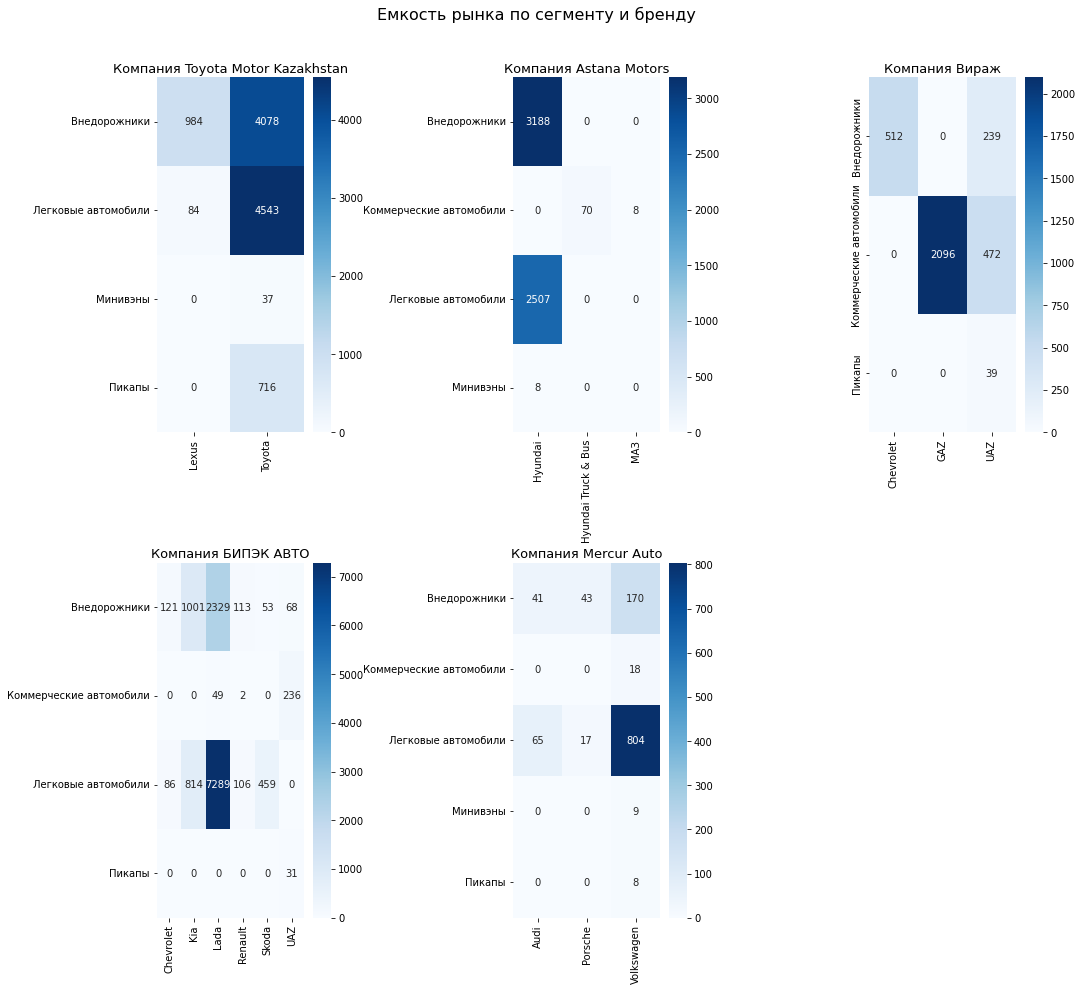

In [158]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика
count_plt_row = math.ceil(len(list_company)/3)

plt.figure(figsize=(15, 7 * count_plt_row)).suptitle('Емкость рынка по сегменту и бренду',
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот
for counter, i in enumerate(list_company):

    ax = plt.subplot(count_plt_row, 3, counter+1)

    df = df_auto.query('компания == @i').pivot_table(index='бренд',
                   columns='сегментация_2013',
                   values='количество',
                   aggfunc='sum').fillna(0).astype('float')
    #df

    ax1 = sns.heatmap(df.T,
            fmt='g',
          annot = True,
           cmap='Blues', ax=ax)
    plt.title('Компания {}'.format(i), fontsize=13, pad=5)
    plt.xticks(rotation=90)
    plt.ylabel(None)
    plt.xlabel(None)


plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.91)
plt.show()

В Меркуре среди легковых автомобилей лидеры фольксвагены, как и по всем остальных сегментам.
Порше на последнем месте среди легковых. Кол-вл внедорожников практически одинаково у Ауди и Порше

А больше всего среди представленных кампаний продается Лады среди легковых в БИПЭК АВТО, далее леговые тойтоы у Тойоты Мотрс. Также Тойтоа лидер по количеству проданных внедорожников

#### Доля рынка

Посчитать общую долю рынка дилера: в количественном и стоимостном выражении Посчитать долю рынка дилера по маркам
    
Посчитать долю рынка дилера по типам машин

In [159]:
print('Доля рынка у Mercur Auto по количеству машин:',
     df_auto.loc[df_auto['компания'] == "Mercur Auto", 'количество'].sum() / df_auto['количество'].sum() * 100, '%')

Доля рынка у Mercur Auto по количеству машин: 2.6730668607957777 %


In [160]:
print('Доля рынка у Mercur Auto по продажам:',
     df_auto.loc[df_auto['компания'] == "Mercur Auto", 'продажа_usd_тыс'].sum()
      / df_auto['продажа_usd_тыс'].sum() * 100, '%')

Доля рынка у Mercur Auto по продажам: 2.8843906395672194 %


У дилера Mercur Auto представлены только три марки - Audi, Porsche, Volkswagen


In [161]:
print('Доля рынка у Mercur Auto по продажам Audi:',
     df_auto.loc[((df_auto['компания'] == "Mercur Auto")
                 & (df_auto['бренд'] == "Audi")), 'продажа_usd_тыс'].sum()
      / df_auto.loc[(df_auto['бренд'] == "Audi"), 'продажа_usd_тыс'].sum() * 100, '%')

Доля рынка у Mercur Auto по продажам Audi: 100.0 %


In [162]:
print('Доля рынка у Mercur Auto по продажам Porsche:',
     df_auto.loc[((df_auto['компания'] == "Mercur Auto")
                 & (df_auto['бренд'] == "Porsche")), 'продажа_usd_тыс'].sum()
      / df_auto.loc[(df_auto['бренд'] == "Porsche"), 'продажа_usd_тыс'].sum() * 100, '%')

Доля рынка у Mercur Auto по продажам Porsche: 100.0 %


In [163]:
print('Доля рынка у Mercur Auto по продажам Volkswagen:',
     df_auto.loc[((df_auto['компания'] == "Mercur Auto")
                 & (df_auto['бренд'] == "Volkswagen")), 'продажа_usd_тыс'].sum()
      / df_auto.loc[(df_auto['бренд'] == "Volkswagen"), 'продажа_usd_тыс'].sum() * 100, '%')

Доля рынка у Mercur Auto по продажам Volkswagen: 100.0 %


#### Конкуренты

Лидеры рынка

Ближайшие конкуренты дилера (тот же регион, та же марка, тот же класс машин)

По марке машин у дилера нет конкурентов - он монополист. Сравнение с лидерами рынка представлено на предыдущих шагах

### Результаты анализа авторынка Казахстана

- В исслелуемом датасете были представлены данные за 2019 год. 
- Год выпуска автомобилей с 2011 года до 2018 год. Объем двигателя от 1.2 до 17.5. Максимально кол-во, купеленное за одну сделку - 91 автомобиль. Максимальная цена в рамках одной сделки - 498 787 USD, максимальная продажа - 1 980 922 USD
- Обнаружена высокая положительная корреляция между ценой и объемом двигателя, что подтверждает известный факт, что с чем больше объем двигателя, тем выше цена
- Общая сумма продаж среди всех диллеров меньше зависит от объема двигателя. Это обусловленно большими закупками автомобителей с маленьким объемом в рамках одной сделки 
- Основной объем датасета представлен автомобилями 2017-2018 года выпуска. Т.к. датасет у нас за 2019 год, то можем сделать вывод, что по всем диллерам основные продажи идут автомобилями прошлого года выпуска и позапрошлого
- По всем диллерам наиболее часто встречающееся значение - объем двигателя от 1,6 до 2,7 литров. Среди объема больше 4 литров наблюдаются выбросы до 17,5 литра
- Наиболее часто продаются по 1 автомобилю, однако есть достаточное кол-во потоковых продаж для юридических лиц
- Наиболее частая цена авто - от 15 до 34 тыс долларов. В рамках отдельных сделок цена автомобиля доходит до 500 тыс долларов
- Наиболее частотные значения суммы итоговой продажи находятся примерно на том же уровне, что и цена одного автомобиля - потому что самая частая сделка включает 1 автомобиль. Также есть некоторое количество сделок с очень большой суммой продаж - от 1 до 2 млн долларов за счет продаж нескольких автомобилей (от 9 до 29 штук в одной сделке)
- По количеству сделок по всему датасету были выявлены следующие лидеры:
    - самые популярные страны-производители - РФ и Казахстан, в на третьей позиции в количеством в три раза меньше - Япония
    - кампания - Тойота Мотор Казахстан, далее в два раза меньше - Астана Моторс, БИПЭК Авто и Вираж
    - бренд автомобиля - Тойота и  Хундай
    - регион продаж - Алматы и Астана
    - месяц продаж - с мая по сентябрь
    - вид топлива - бензин с серьезным отрывом
    - тип коробки передач - автомат и механика
    - тип привода - полный и передний
    - по сегментации - внедорожники и легковые автомобили
    - по классу - В-класс,  Компактные SUV
    - импорт популярней локального производства
    - физические лица покупают чаще юридических лиц
- Лидер по количеству проданных машин - Lada и Toyota, далее идет Hyundai, остальные марки примерно на одном уровне - GAZ, Kia, Ravon, Nissan, Renault, UAZ, Lexus
- С заметным отрывом лидер по суммарным ценам автомобиля - Toyota, далее Hyundai, на третьем месте Lexus
- Среди суммарных сумм сделок - также с большим отрывом лидер Toyota, далее Hyundai, на третьем месте Lada и на четвертом Lexus
- Динамика продаж по всему рынку по количеству машин, по суммарной цене и общей сумме сделок имеет одинаковую тенденцию - подъем с февраля с резким скачком начиная с мая и небольшим спадом в июле и с последующим нарастанием в августе
- По типу топлива видим среди бензиновых двигателей самые большие продажи. Тренды совпадают с общей динамикой по рынку. Пик продаж приходит с мая по сентябрь
- Легковые авто растут в продажах по количеству с мая по июнь, далее немного падают. Цена авто и сумма сделки имеет такую же динамику. Внедорожники за исключением небольших провалов в марте и июле имеют рост по всем показателям на протяжении всего года. По остальным категориям изменения менее динамичны и остаются примерно на одном уровне
- больше всего автомобилей продается у Лады в В классе, далее идет Тойота Е класс и Лада Субкомпактные SUV
- Больше всего автомата продается в Алматы и Астане, далее идет механика в тех же регионах
- Больше всего машин продается в Тойота Моторс Казахстан в Алматы. Его главный конкурент в этом же регионе - Астана Моторс и БИПЭК Авто

Также был проведен анализ Меркур Авто, находящимся на последних строчках рейтинга, и 4 лидеров по выручке и продажам - БИПЭК АВТО, Тойота Мотор Казахстан, Астана Моторс, Вираж: 
- Рейтинг общей прибыли:
    - Toyota Motor Kazakhstan на первом месте с 468 тыс долларов за цену автомобилей и общей выручки. При этом по количеству проданных авто она только на втором месте. Опережает БИПЭК Авто, который лидер по кол-ву проданных автомобилей
    - БИПЭК АВТО находится на 4ом месте по ценам авто, но 2ом по общей выручке, которая превышает цены в три раза (значит у дилера много доп услуг)
    - У Astana Motors и Вираж тоже есть отличия в большую сторону межлу общей выручкой и суммой проданных авто
    - у Mercur Auto аналогично
- Самая большая прибыль у Toyota Motor Kazakhstan при продаже автомобилей Тойтота - логично ) в других компаниях эти машины не продаются. Далее идет Хундай в Астана Моторс
- В Меркур продаютс Ауди, Порш и Фолксваген - эти машины являются самыми дорогими из представленных. Поэтому объяснимо почему у данного дилера намного меньший доход
- Также обнаружена явная монополия среди представленных кампаний - только Шевроле и УАЗ продаются у двух их них. Остальные марки представлены только в одном из приведенных дилеров
- По средней сумме сделки лидеры Меркур с Порш и Астана Моторс МАЗ и автобусаи - потому что у Меркура есть дорогие Порше, а Астана Моторс видимо берет количеством - у нее при меньшей цене авто большая средняя сумма сделки
- У Меркура самые высокие средние продажи были в феврале, которые резко упали в марте и немного начали подниматься с апреля по июнь и потом снова начали падать. У Тойтоты самые большие продажи были в январе и с преля по май. В Астане моторс только в феврале, далее рынок начал падать
- У Меркур средняя цена сделок Порше снижалась и повышалась ежемесячно, но скачки примерно на 20 процентов. У Ауди чуть менее стабильные средние суммы - самая низка в январе и июле. У фольцвагена самая большая средняя цена была в феврале. У Тойоты моторс тоже скачки средней сделки по лексусам и более стабильные суммы по тойоте. Интересно посмотреть на Астану моторс - МАЗ продавался только в феврале и далее только в летние месяцы. Причем средняя сумма отличается в 5 раз - видимо в феврале была оптовая закупка
- В Меркуре среди легковых автомобилей лидеры фольксвагены, как и по всем остальных сегментам. Порше на последнем месте среди легковых. Кол-вл внедорожников практически одинаково у Ауди и Порше. Больше всего среди представленных кампаний продается Лады среди легковых в БИПЭК АВТО, далее леговые тойтоы у Тойоты Мотрс. Также Тойтоа лидер по количеству проданных внедорожников